## CAR INSURANCE PREDICTION

In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from Haibo_function import print_model_report_and_feature_importance,print_model_report_and_coefficients
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from matplotlib.patches import Rectangle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, KFold, GridSearchCV


warnings.filterwarnings("ignore")

C:\Users\48869\AppData\Local\Temp\ipykernel_4760\3355942926.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("car_insurance_claim.csv")
df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0       $0    18.0          0  Highly Urban/ Urban  
1       $0     1.0          0  Highly Urban/ Urban  
2       $0    10.0          0  Highly Urban/ Urban  
3       $0    10.0          0  Highly Urban/ Urban  
4       $0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

| #       | Columns       | Description                                                 | Data type        |
|---------|---------------|-------------------------------------------------------------|------------------|
| 1       | ID            | Unique identifier for customers                             | int              |
| 2       | KIDSDRIV      | Number of children the customer needs to drive for          | int              |
| 3       | BIRTH         | Date of birth                                               | Date             |
| 4       | AGE           | Age                                                         | int              |
| 5       | HOMEKIDS      | Number of children the customer has                         | int              |
| 6       | YOJ           | Years on the job                                            | int              |
| 7       | INCOME        | Annual income                                               | int              |
| 8       | PARENT1       | Whether the customer's parents pay for their insurance      | Factor (Yes/No)  |
| 9       | HOME_VAL      | Value of the customer's home                                 | Factor           |
| 10      | MSTATUS       | Marital status                                              | Factor           |
| 11      | GENDER        | Gender                                                      | Factor           |
| 12      | EDUCATION     | Education level                                             | Factor           |
| 13      | OCCUPATION    | Occupation                                                  | Factor           |
| 14      | TRAVTIME      | Travel time (minutes)                                       | int              |
| 15      | CAR_USE       | Purpose of car usage (private/commercial)                   | Factor           |
| 16      | BLUEBOOK      | Blue Book value                                             | Factor           |
| 17      | TIF           | Time in force (years)                                       | int              |
| 18      | CAR_TYPE      | Type of car                                                 | Factor           |
| 19      | RED_CAR       | Whether the car is red                                      | Factor (Yes/No)  |
| 20      | OLDCALIM      | Cumulative claim amount                                     | Factor           |
| 21      | CLM_FREQ      | Claim frequency                                             | int              |
| 22      | REVOKED       | Whether the driver's license has been revoked               | Factor (Yes/No)  |
| 23      | MVR_PTS       | Motor vehicle record points                                 | int              |
| 24      | CLM_AMT       | Claim amount                                                | Factor           |
| 25      | CAR_AGE       | Age of the car (years)                                      | int              |
| 26      | CLAIM_FLAG    | Flag indicating whether a claim has been made               | int              |
| 27      | URBANICITY    | Urbanicity of the customer's location                       | Factor           |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [4]:
df.describe().T

count          mean           std      min          25%  \
ID          10302.0  4.956631e+08  2.864675e+08  63175.0  244286856.0   
KIDSDRIV    10302.0  1.692875e-01  5.065116e-01      0.0          0.0   
AGE         10295.0  4.483740e+01  8.606445e+00     16.0         39.0   
HOMEKIDS    10302.0  7.204426e-01  1.116323e+00      0.0          0.0   
YOJ          9754.0  1.047406e+01  4.108943e+00      0.0          9.0   
TRAVTIME    10302.0  3.341642e+01  1.586969e+01      5.0         22.0   
TIF         10302.0  5.329159e+00  4.110795e+00      1.0          1.0   
CLM_FREQ    10302.0  8.007183e-01  1.154079e+00      0.0          0.0   
MVR_PTS     10302.0  1.710153e+00  2.159015e+00      0.0          0.0   
CAR_AGE      9663.0  8.298148e+00  5.714450e+00     -3.0          1.0   
CLAIM_FLAG  10302.0  2.665502e-01  4.421766e-01      0.0          0.0   

                    50%          75%          max  
ID          497004293.0  739455069.0  999926368.0  
KIDSDRIV            0.0          0.0          4.0  
AGE                45.0         51.0         81.0  
HOMEKIDS            0.0          1.0          5.0  
YOJ                11.0         13.0         23.0  
TRAVTIME           33.0         44.0        142.0  
TIF                 4.0          7.0         25.0  
CLM_FREQ            0.0          2.0          5.0  
MVR_PTS             1.0          3.0         13.0  
CAR_AGE             8.0         12.0         28.0  
CLAIM_FLAG          0.0          1.0          1.0

# Data Cleaning

## unit of removal

In [5]:
df.drop('BIRTH', axis=1, inplace=True)

In [6]:
cleaning_operations = [
    ('INCOME', ['$', ','], float),
    ('HOME_VAL', ['$', ','], float),
    ('OLDCLAIM', ['$', ','], float),
    ('CLM_AMT', ['$', ','], float),
    ('GENDER', ['z_'], None),
    ('MSTATUS', ['z_'], None),
    ('EDUCATION', ['z_', '<'], None),
    ('OCCUPATION', ['z_'], None),
    ('BLUEBOOK', ['$', ','], int),
    ('CAR_TYPE', ['z_'], None),
    ('URBANICITY', ['Highly Urban/ ', 'z_Highly Rural/ '], None)
]

for column, replacements, dtype in cleaning_operations:
    for rep in replacements:  
        df[column] = df[column].str.replace(rep, '')
    if dtype:  
        df[column] = df[column].astype(dtype)

In [7]:
df

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL  \
0       63581743         0  60.0         0  11.0   67349.0      No       0.0   
1      132761049         0  43.0         0  11.0   91449.0      No  257252.0   
2      921317019         0  48.0         0  11.0   52881.0      No       0.0   
3      727598473         0  35.0         1  10.0   16039.0      No  124191.0   
4      450221861         0  51.0         0  14.0       NaN      No  306251.0   
...          ...       ...   ...       ...   ...       ...     ...       ...   
10297   67790126         1  45.0         2   9.0  164669.0      No  386273.0   
10298   61970712         0  46.0         0   9.0  107204.0      No  332591.0   
10299  849208064         0  48.0         0  15.0   39837.0      No  170611.0   
10300  627828331         0  50.0         0   7.0   43445.0      No  149248.0   
10301  680381960         0  52.0         0  11.0   53235.0      No  197017.0   

      MSTATUS GENDER  ...     CAR_TYPE RED_CAR  OLDCLAIM CLM_FREQ  REVOKED  \
0          No      M  ...      Minivan     yes    4461.0        2       No   
1          No      M  ...      Minivan     yes       0.0        0       No   
2          No      M  ...          Van     yes       0.0        0       No   
3         Yes      F  ...          SUV      no   38690.0        2       No   
4         Yes      M  ...      Minivan     yes       0.0        0       No   
...       ...    ...  ...          ...     ...       ...      ...      ...   
10297     Yes      M  ...      Minivan      no       0.0        0       No   
10298     Yes      M  ...  Panel Truck      no       0.0        0       No   
10299     Yes      F  ...          SUV      no       0.0        0       No   
10300     Yes      F  ...      Minivan      no       0.0        0       No   
10301     Yes      F  ...      Minivan      no       0.0        0       No   

       MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  URBANICITY  
0            3     0.0    18.0           0       Urban  
1            0     0.0     1.0           0       Urban  
2            2     0.0    10.0           0       Urban  
3            3     0.0    10.0           0       Urban  
4            0     0.0     6.0           0       Urban  
...        ...     ...     ...         ...         ...  
10297        2     0.0    17.0           0       Urban  
10298        0     0.0     1.0           0       Urban  
10299        0     0.0     1.0           0       Urban  
10300        0     0.0    11.0           0       Urban  
10301        0     0.0     9.0           0       Rural  

[10302 rows x 26 columns]

## check duplicates value

In [8]:
columns_to_check = []
for column in df.columns:
    if column != 'ID':
        columns_to_check.append(column)

print('Number of rows before drop duplicate: %s' % len(df))
df = df.drop_duplicates(subset=columns_to_check, keep=False)
print('Number of rows after drop duplicate: %s' % len(df))



Number of rows before drop duplicate: 10302
Number of rows after drop duplicate: 10300


In [9]:
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


Categorical columns: ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
Numerical columns: ['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG']


In [10]:
category_bool = []
for i in categorical_columns: 
    if len(df[i].unique()) == 2:
        category_bool.append(i)

print("Category columns with 2 unique values:", category_bool)


Category columns with 2 unique values: ['PARENT1', 'MSTATUS', 'GENDER', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']


## Check Missing Value

In [11]:
def missing_value_table(df):
    missing_value = df.isna().sum()
    percentage_missing = 100 * df.isna().sum() / len(df)
    table = pd.concat([missing_value, percentage_missing], axis=1)
    table_ren_columns = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    table_ren_columns = table_ren_columns[table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(table_ren_columns.shape[0]) + " columns that have missing values.")
    return table_ren_columns

missing_values = missing_value_table(df)
print(missing_values)

Your selected dataframe has 26 columns.
There are 6 columns that have missing values.
            Missing Values  % of Total Values
OCCUPATION             665                6.5
CAR_AGE                639                6.2
HOME_VAL               575                5.6
INCOME                 570                5.5
YOJ                    548                5.3
AGE                      7                0.1


In [12]:
le = LabelEncoder()
for col in category_bool:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=[col for col in categorical_columns if col not in category_bool])


In [13]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")

df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


In [14]:
missing_values = missing_value_table(df)
print(missing_values)


Your selected dataframe has 41 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [15]:
df

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME  PARENT1  \
0       63581743.0       0.0  60.0       0.0  11.0   67349.0        0   
1      132761049.0       0.0  43.0       0.0  11.0   91449.0        0   
2      921317019.0       0.0  48.0       0.0  11.0   52881.0        0   
3      727598473.0       0.0  35.0       1.0  10.0   16039.0        0   
4      450221861.0       0.0  51.0       0.0  14.0  100862.7        0   
...            ...       ...   ...       ...   ...       ...      ...   
10297   67790126.0       1.0  45.0       2.0   9.0  164669.0        0   
10298   61970712.0       0.0  46.0       0.0   9.0  107204.0        0   
10299  849208064.0       0.0  48.0       0.0  15.0   39837.0        0   
10300  627828331.0       0.0  50.0       0.0   7.0   43445.0        0   
10301  680381960.0       0.0  52.0       0.0  11.0   53235.0        0   

       HOME_VAL  MSTATUS  GENDER  ...  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0           0.0        0       1  ...              False               False   
1      257252.0        0       1  ...              False               False   
2           0.0        0       1  ...              False                True   
3      124191.0        1       0  ...              False               False   
4      306251.0        1       1  ...              False               False   
...         ...      ...     ...  ...                ...                 ...   
10297  386273.0        1       1  ...              False                True   
10298  332591.0        1       1  ...              False               False   
10299  170611.0        1       0  ...              False               False   
10300  149248.0        1       0  ...              False               False   
10301  197017.0        1       0  ...              False               False   

       OCCUPATION_Professional  OCCUPATION_Student  CAR_TYPE_Minivan  \
0                         True               False              True   
1                        False               False              True   
2                        False               False             False   
3                        False               False             False   
4                        False               False              True   
...                        ...                 ...               ...   
10297                    False               False              True   
10298                    False               False             False   
10299                    False               False             False   
10300                    False               False              True   
10301                    False               False              True   

       CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_SUV  \
0                     False            False         False   
1                     False            False         False   
2                     False            False         False   
3                     False            False          True   
4                     False            False         False   
...                     ...              ...           ...   
10297                 False            False         False   
10298                  True            False         False   
10299                 False            False          True   
10300                 False            False         False   
10301                 False            False         False   

       CAR_TYPE_Sports Car  CAR_TYPE_Van  
0                    False         False  
1                    False         False  
2                    False          True  
3                    False         False  
4                    False         False  
...                    ...           ...  
10297                False         False  
10298                False         False  
10299                False         False  
10300                False         False  
10301                False         False  

[10300 rows x 41 columns]

## outlier detection

Number of rows before filtering outliers: 10300
Number of rows after filtering outliers: 9666


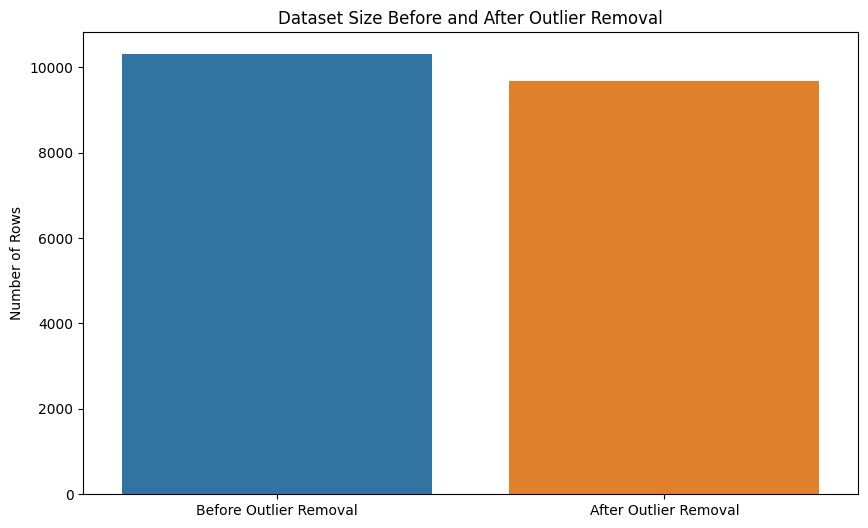

In [16]:
print("Number of rows before filtering outliers:", len(df))

columns_to_check = ['AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
filtered_entries = np.array([True] * len(df))

for col in columns_to_check:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = filtered_entries & (zscore < 3)

df_filtered = df[filtered_entries].copy()
print("Number of rows after filtering outliers:", len(df_filtered))

plt.figure(figsize=(10, 6))
sns.barplot(x=['Before Outlier Removal', 'After Outlier Removal'], y=[len(df), len(df_filtered)])
plt.ylabel('Number of Rows')
plt.title('Dataset Size Before and After Outlier Removal')
plt.show()

#   EDA

In [17]:
df1 = df_filtered
df1

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME  PARENT1  \
0       63581743.0       0.0  60.0       0.0  11.0   67349.0        0   
1      132761049.0       0.0  43.0       0.0  11.0   91449.0        0   
2      921317019.0       0.0  48.0       0.0  11.0   52881.0        0   
4      450221861.0       0.0  51.0       0.0  14.0  100862.7        0   
5      743146596.0       0.0  50.0       0.0  12.1  114986.0        0   
...            ...       ...   ...       ...   ...       ...      ...   
10297   67790126.0       1.0  45.0       2.0   9.0  164669.0        0   
10298   61970712.0       0.0  46.0       0.0   9.0  107204.0        0   
10299  849208064.0       0.0  48.0       0.0  15.0   39837.0        0   
10300  627828331.0       0.0  50.0       0.0   7.0   43445.0        0   
10301  680381960.0       0.0  52.0       0.0  11.0   53235.0        0   

       HOME_VAL  MSTATUS  GENDER  ...  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0           0.0        0       1  ...              False               False   
1      257252.0        0       1  ...              False               False   
2           0.0        0       1  ...              False                True   
4      306251.0        1       1  ...              False               False   
5      243925.0        1       0  ...              False               False   
...         ...      ...     ...  ...                ...                 ...   
10297  386273.0        1       1  ...              False                True   
10298  332591.0        1       1  ...              False               False   
10299  170611.0        1       0  ...              False               False   
10300  149248.0        1       0  ...              False               False   
10301  197017.0        1       0  ...              False               False   

       OCCUPATION_Professional  OCCUPATION_Student  CAR_TYPE_Minivan  \
0                         True               False              True   
1                        False               False              True   
2                        False               False             False   
4                        False               False              True   
5                        False               False             False   
...                        ...                 ...               ...   
10297                    False               False              True   
10298                    False               False             False   
10299                    False               False             False   
10300                    False               False              True   
10301                    False               False              True   

       CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_SUV  \
0                     False            False         False   
1                     False            False         False   
2                     False            False         False   
4                     False            False         False   
5                     False            False          True   
...                     ...              ...           ...   
10297                 False            False         False   
10298                  True            False         False   
10299                 False            False          True   
10300                 False            False         False   
10301                 False            False         False   

       CAR_TYPE_Sports Car  CAR_TYPE_Van  
0                    False         False  
1                    False         False  
2                    False          True  
4                    False         False  
5                    False         False  
...                    ...           ...  
10297                False         False  
10298                False         False  
10299                False         False  
10300                False         False  
10301                False         False  

[9666 rows x 41 columns]

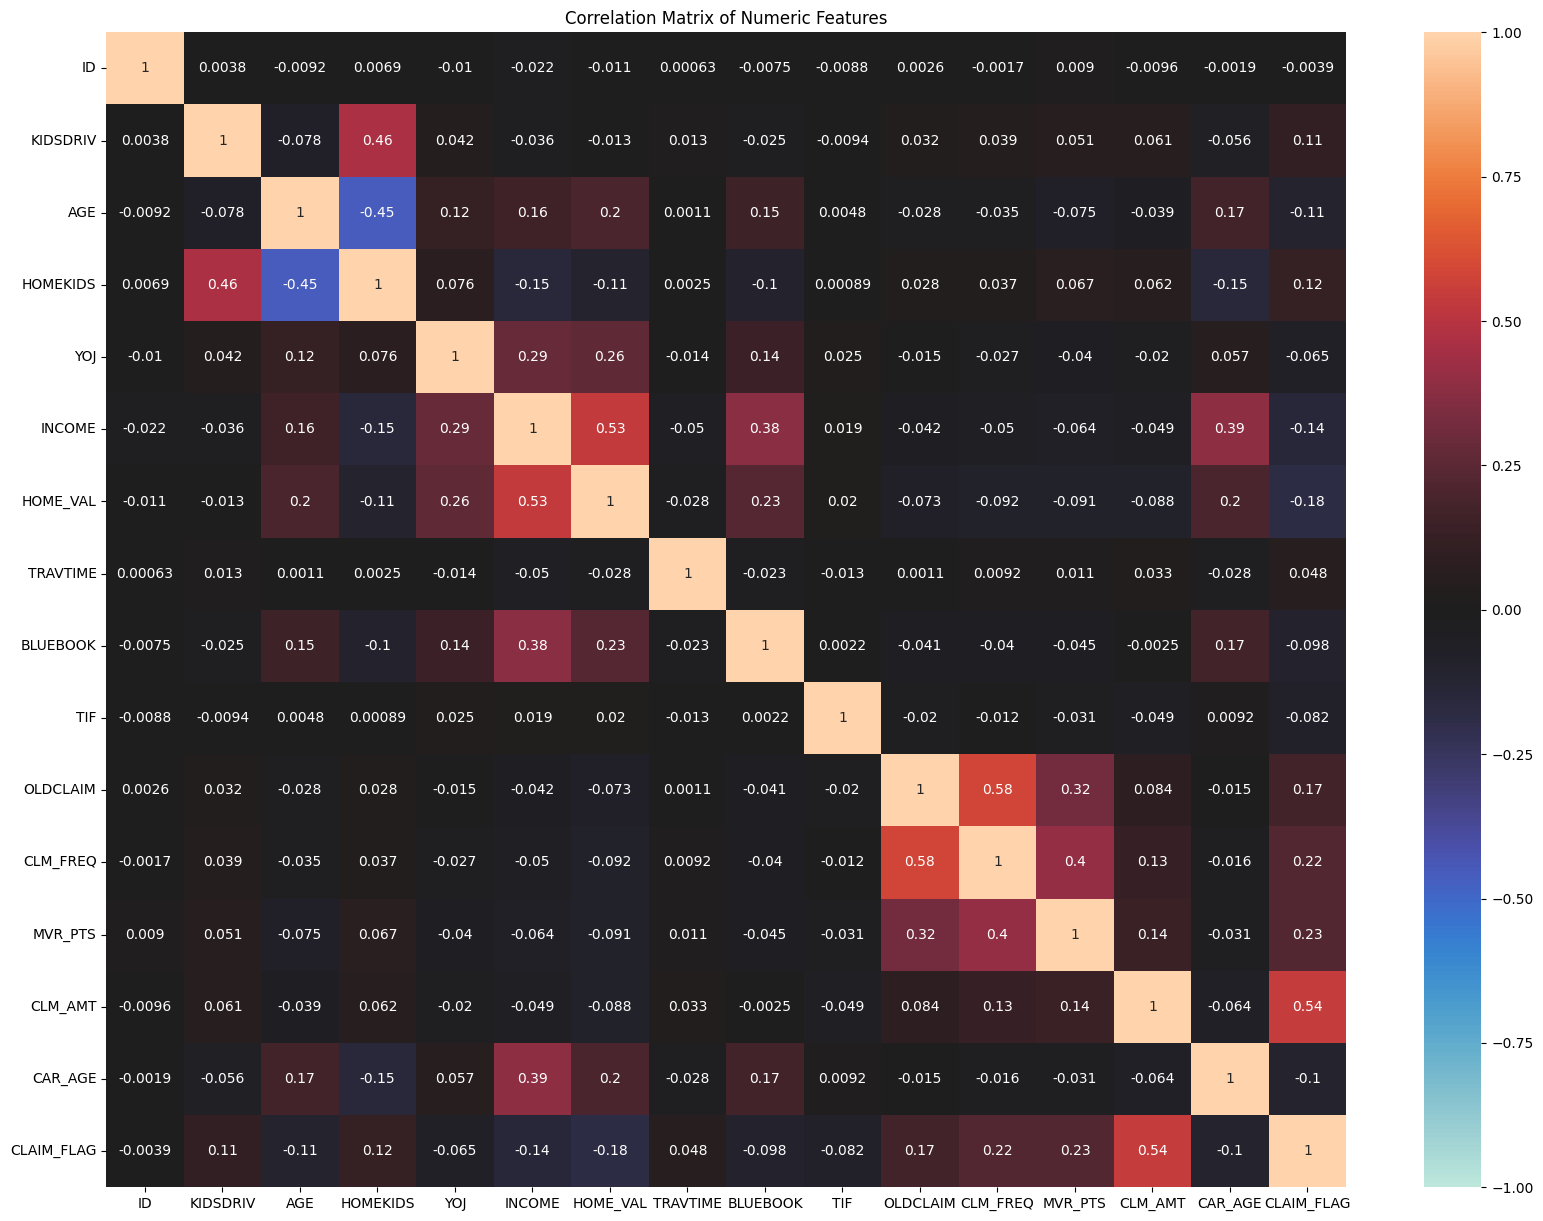

In [18]:
plt.figure(figsize=[20, 15])
sns.heatmap(df_filtered[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Density Plot

In [19]:
df1.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK',
       'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS',
       'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'EDUCATION_Bachelors',
       'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'OCCUPATION_Blue Collar', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student', 'CAR_TYPE_Minivan',
       'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van'],
      dtype='object')

Column removal: success


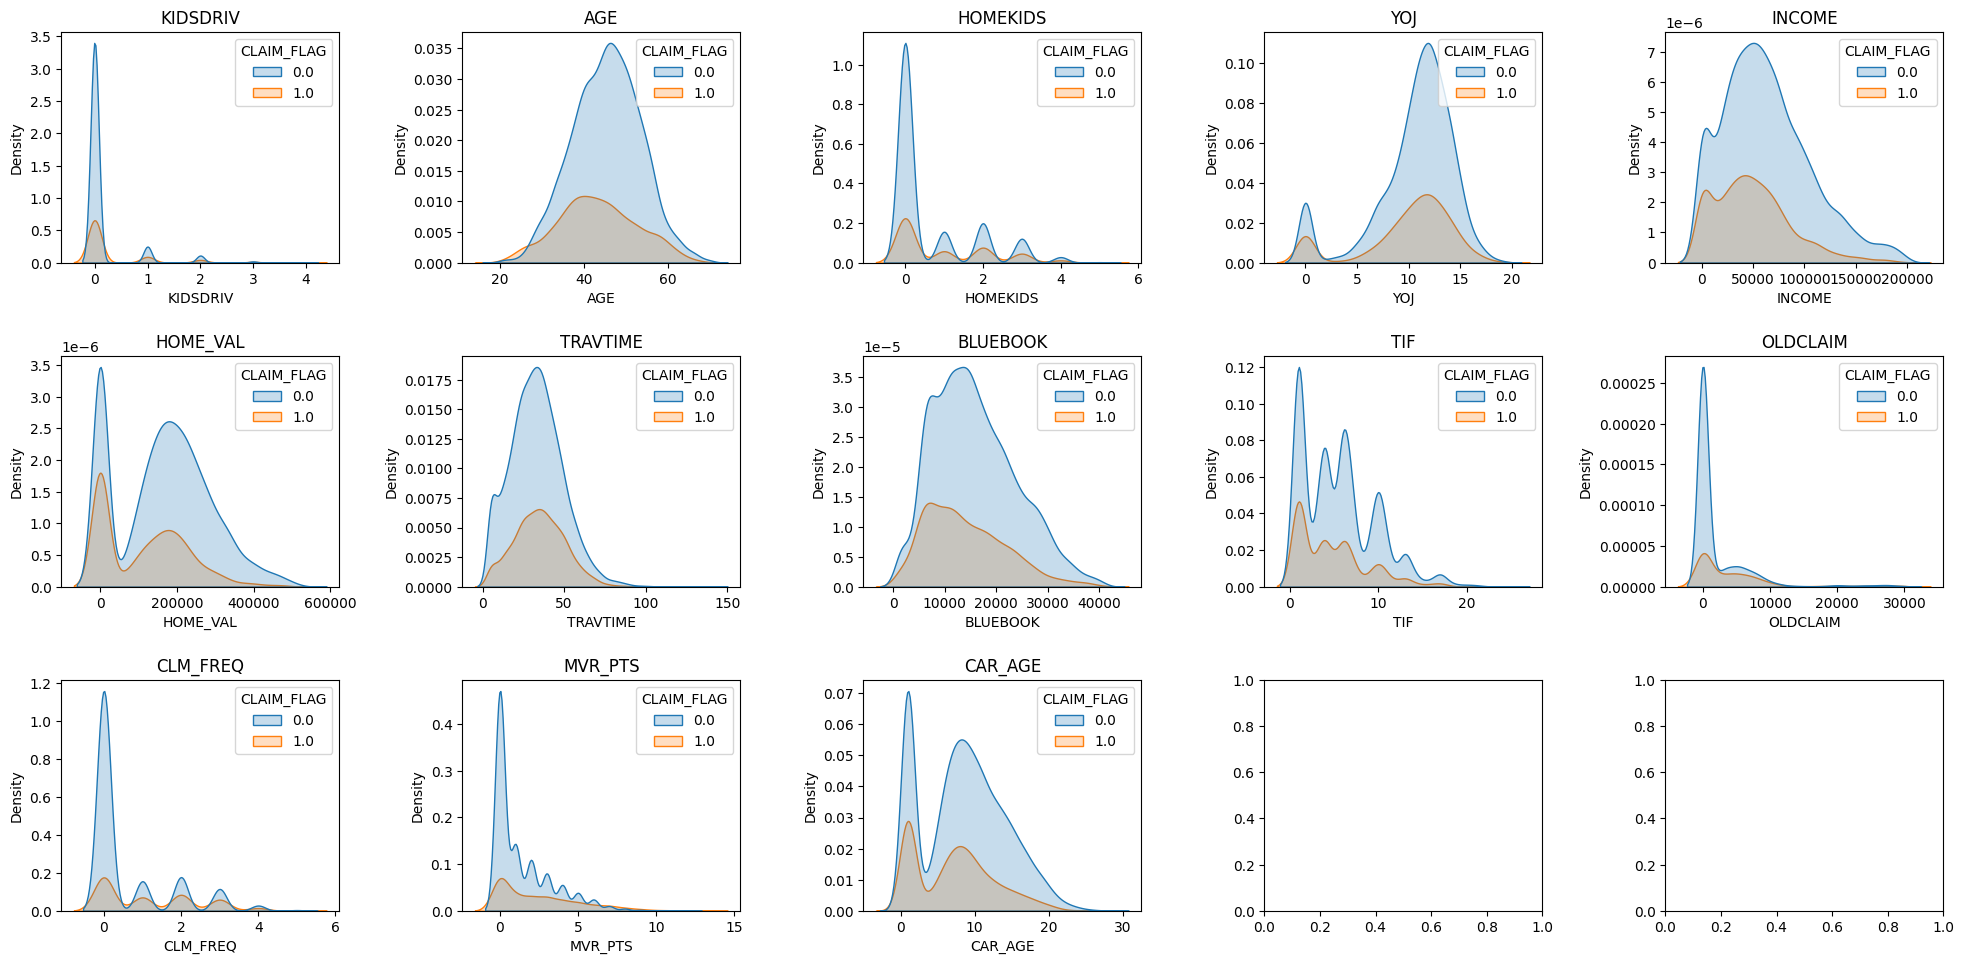

In [20]:
numerics = df_filtered.select_dtypes(["int64", "float64"]).columns.tolist()

try:
    numerics.remove("CLM_AMT")
    numerics.remove("ID")
    print("Column removal: success")
except ValueError:
    print("Requested columns are unavailable to remove")

if "CLAIM_FLAG" in numerics:
    numerics.remove("CLAIM_FLAG")

nrow = 3
ncol = 5

fig, ax = plt.subplots(nrow, ncol, figsize=[20, 10])

for i, colname in enumerate(numerics):
    row = i // ncol
    col = i % ncol
    sns.kdeplot(
        data=df_filtered, x=colname, hue="CLAIM_FLAG", fill=True, ax=ax[row, col]
    )
    ax[row, col].set_title(colname)

plt.tight_layout(pad=2)
plt.show()


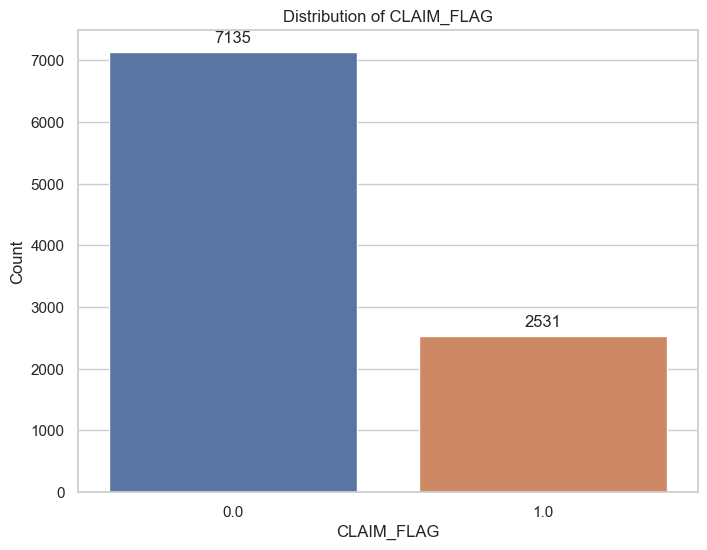

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CLAIM_FLAG', data=df_filtered)
plt.title('Distribution of CLAIM_FLAG')
plt.xlabel('CLAIM_FLAG')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()


In [22]:
df1.dtypes

ID                         float64
KIDSDRIV                   float64
AGE                        float64
HOMEKIDS                   float64
YOJ                        float64
INCOME                     float64
PARENT1                      int32
HOME_VAL                   float64
MSTATUS                      int32
GENDER                       int32
TRAVTIME                   float64
CAR_USE                      int32
BLUEBOOK                   float64
TIF                        float64
RED_CAR                      int32
OLDCLAIM                   float64
CLM_FREQ                   float64
REVOKED                      int32
MVR_PTS                    float64
CLM_AMT                    float64
CAR_AGE                    float64
CLAIM_FLAG                 float64
URBANICITY                   int32
EDUCATION_Bachelors           bool
EDUCATION_High School         bool
EDUCATION_Masters             bool
EDUCATION_PhD                 bool
OCCUPATION_Blue Collar        bool
OCCUPATION_Clerical 

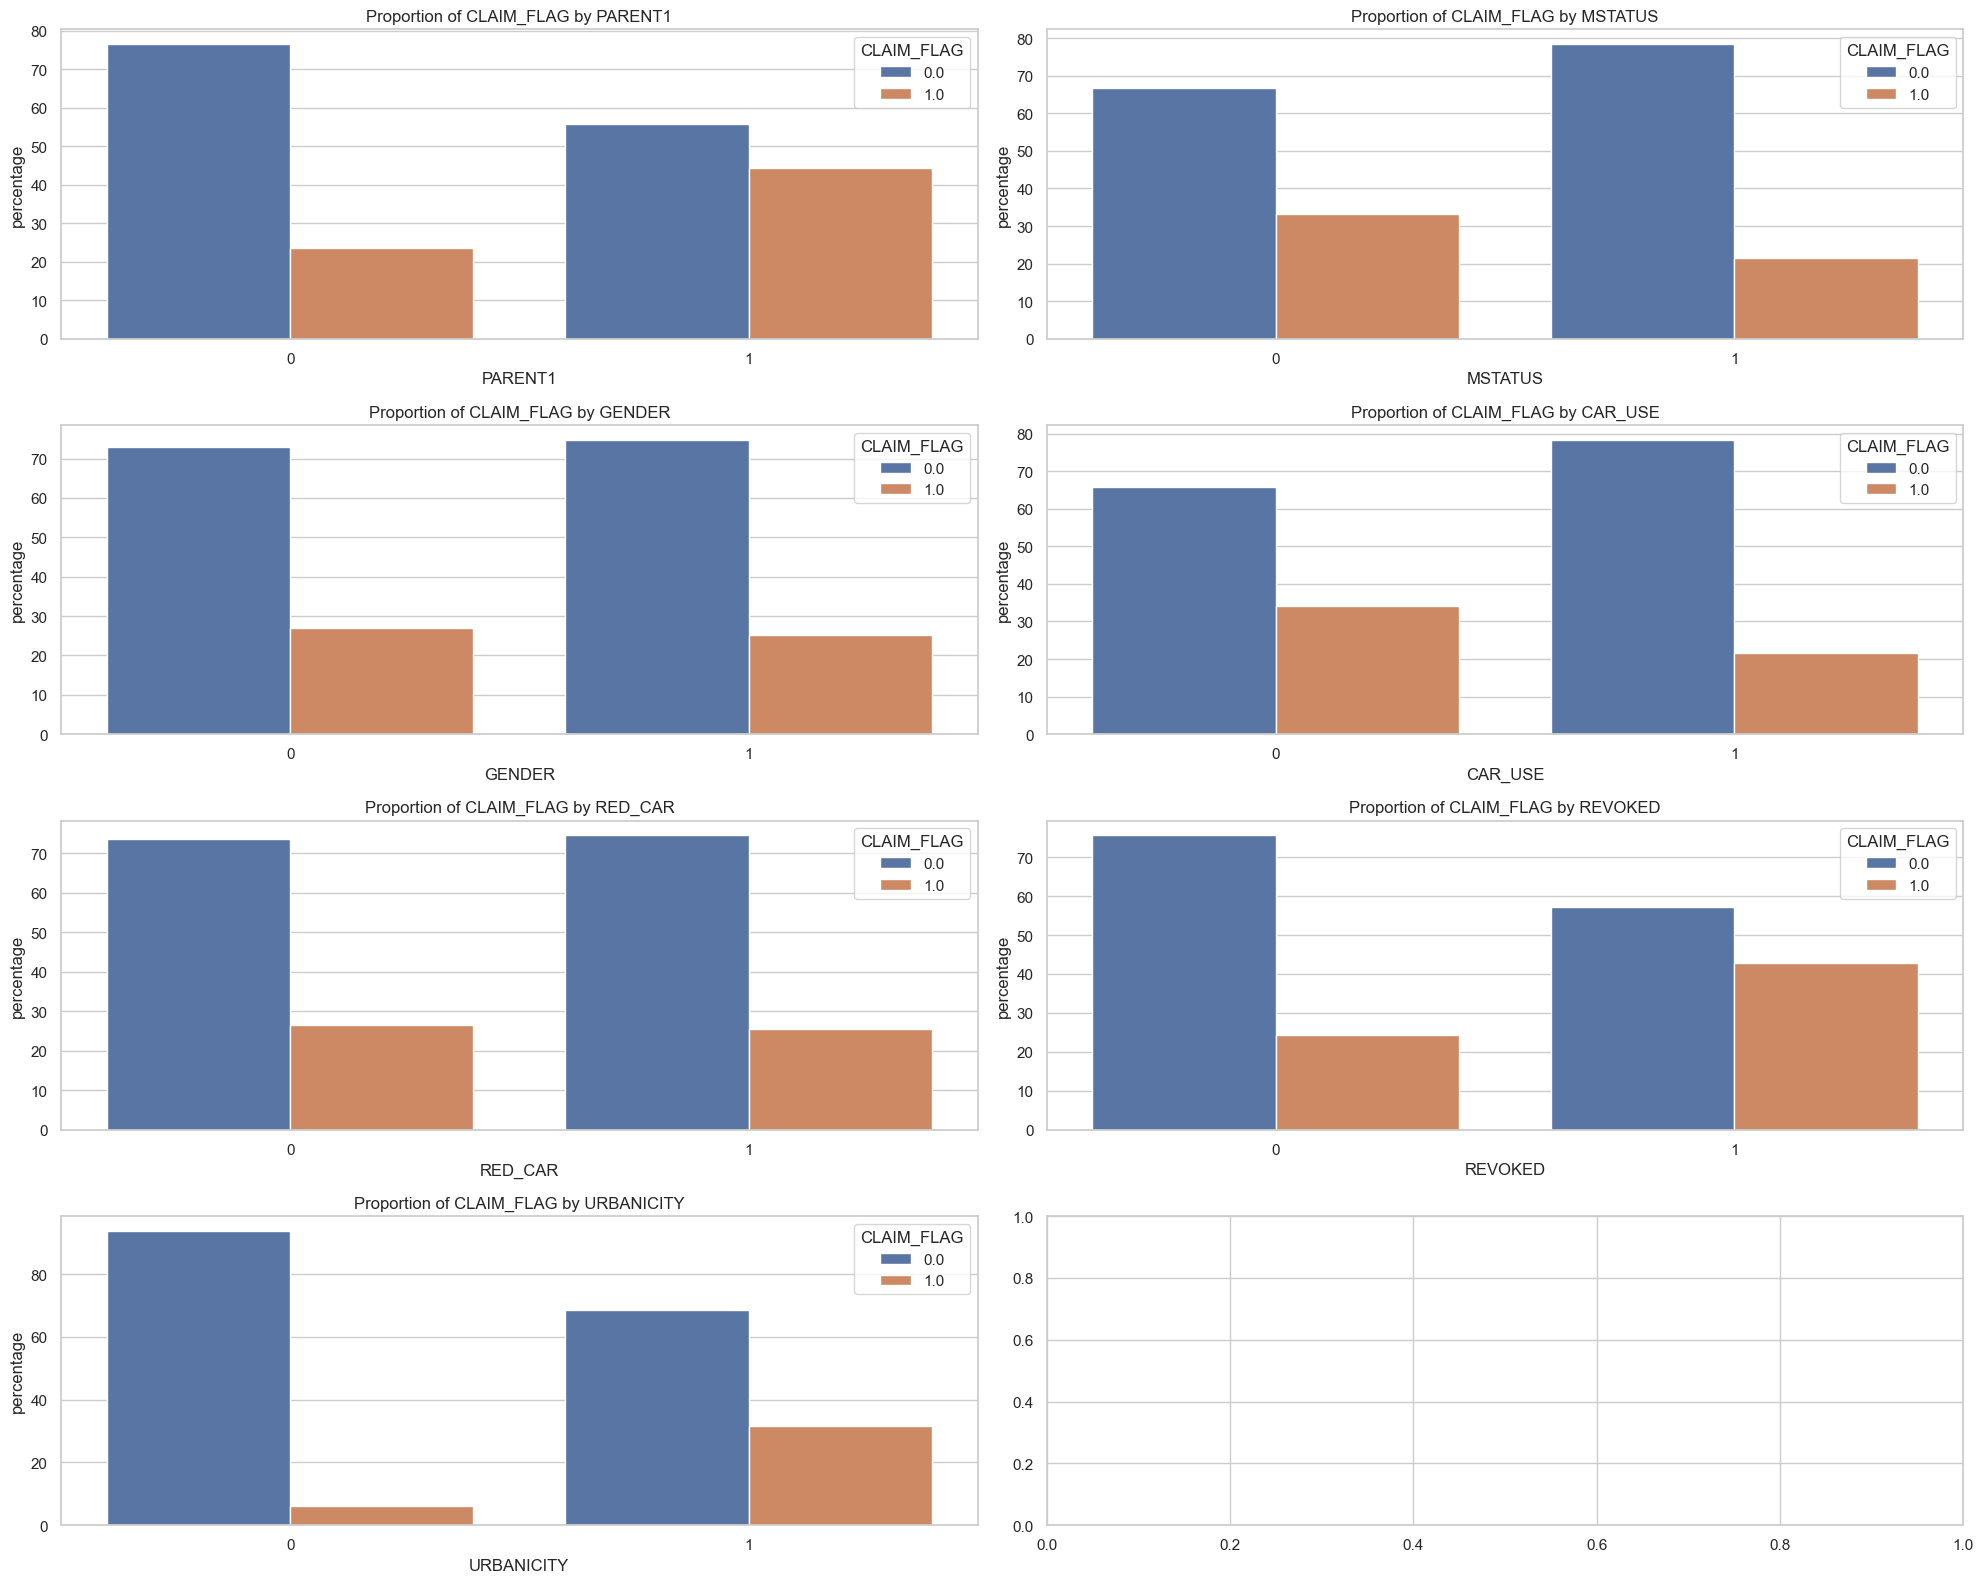

In [23]:
data = df1

categorical_cols = [col for col in data.columns if data[col].dtype in ['uint8', 'int32'] and col != 'CLAIM_FLAG']


# Plotting
nrow = (len(categorical_cols) + 1) // 2  
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(20, nrow * 4))

for i, cat in enumerate(categorical_cols):
    row, col = divmod(i, ncol)
    # Calculate proportions
    prop_df = (data.groupby(cat)['CLAIM_FLAG'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(cat))
    sns.barplot(x=cat, y='percentage', hue='CLAIM_FLAG', data=prop_df, ax=axes[row, col]).set_title(f'Proportion of CLAIM_FLAG by {cat}')

plt.tight_layout()
plt.show()

##  KIDSDRIV

<Figure size 1000x1000 with 0 Axes>

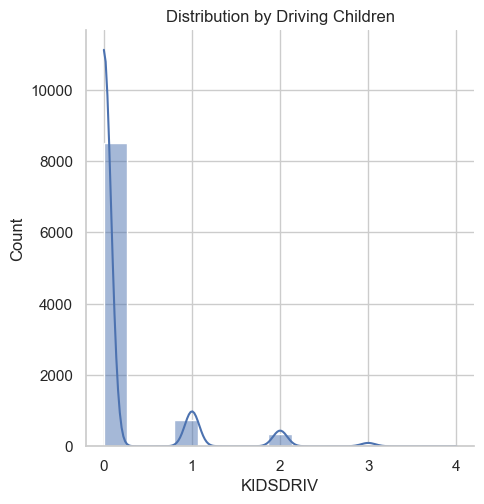

In [24]:
plt.figure(figsize=(10,10))
sns.displot(df1['KIDSDRIV'], kde=True)
plt.xticks(np.arange(0,5,step=1))
plt.title('Distribution by Driving Children')
plt.show()

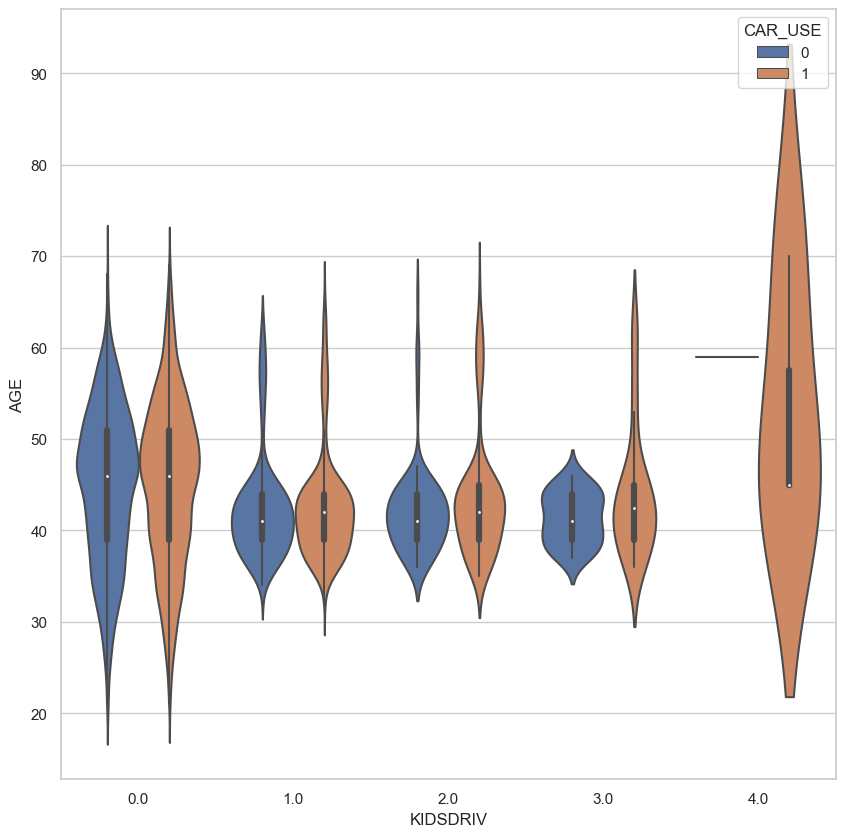

In [25]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df1, y='AGE', x='KIDSDRIV', hue='CAR_USE')
plt.show()

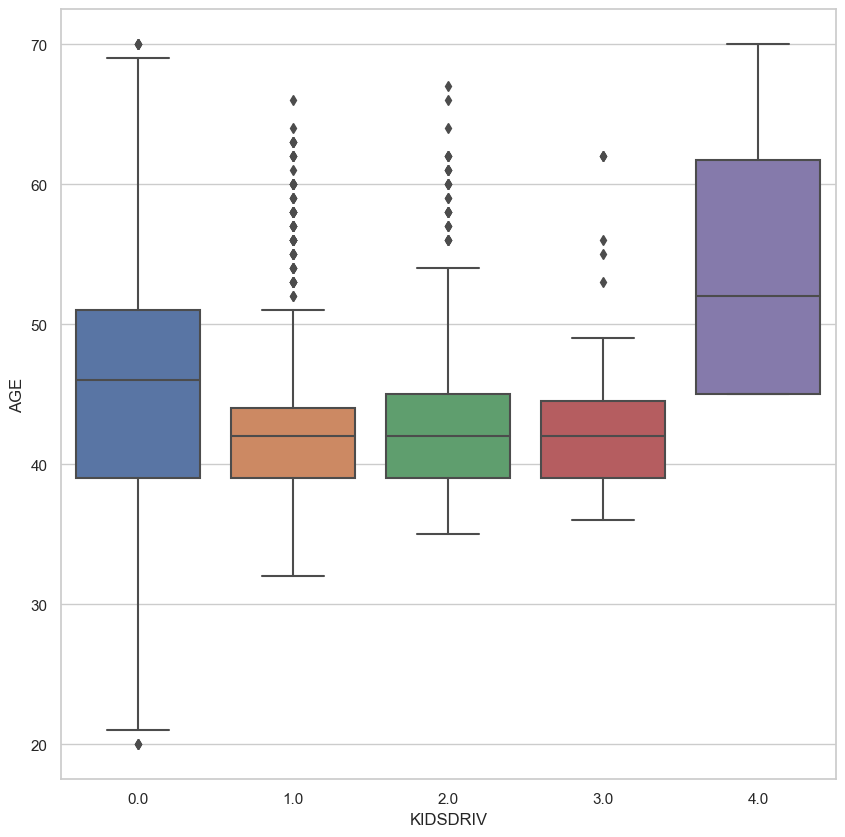

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df1, y='AGE', x='KIDSDRIV')
plt.show()

## AGE

Text(0.5, 1.0, 'Distribution by AGE')

<Figure size 1000x1000 with 0 Axes>

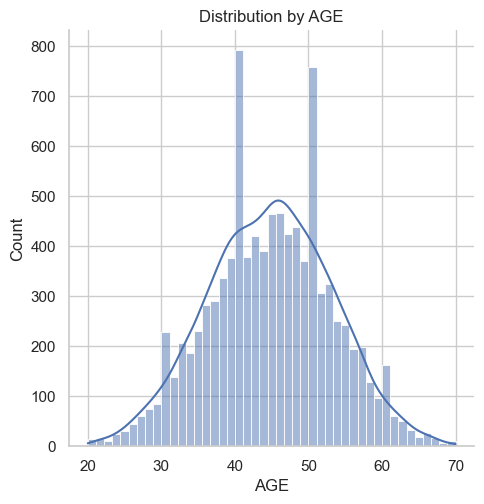

In [27]:
plt.figure(figsize=(10,10))
sns.displot(df1['AGE'], kde=True)
plt.title('Distribution by AGE')

In [28]:
bins = np.arange(15, 80, 5)
labels = [f'({bins[i]}, {bins[i+1]})' for i in range(len(bins)-1)]
df1['Age Group'] = pd.cut(df1['AGE'], bins=bins, labels=labels)

df1 = df1[(df1['AGE'] < 75) & (df1['AGE'] >= 18)]

In [29]:
age_group = df1.groupby('Age Group')['CLM_AMT'].mean().reset_index()
age_group = age_group.sort_values(by='CLM_AMT', ascending=False)


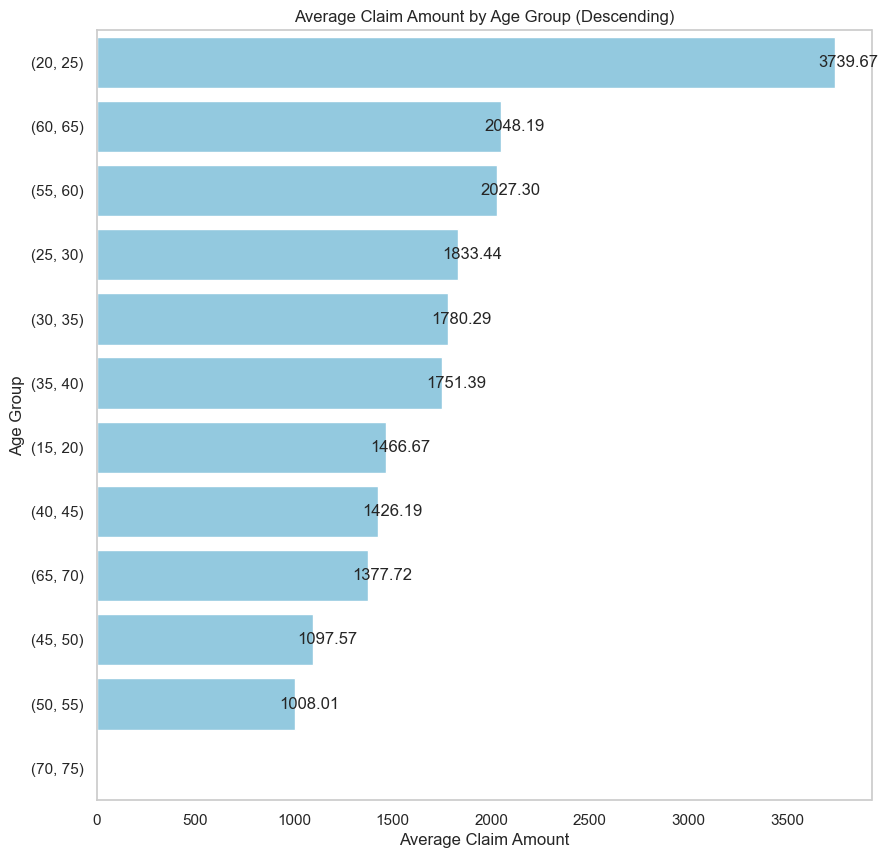

In [30]:

plt.figure(figsize=(10, 10))
bar_age = sns.barplot(y='Age Group', x='CLM_AMT', data=age_group, color='skyblue', order=age_group['Age Group'])
plt.ylabel('Age Group')
plt.xlabel('Average Claim Amount')
plt.title('Average Claim Amount by Age Group (Descending)')
plt.grid(axis='x')


for p in bar_age.patches:
    bar_age.annotate(format(p.get_width(), '.2f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha = 'center', va = 'center', 
                     xytext = (10, 0), 
                     textcoords = 'offset points')

plt.show()

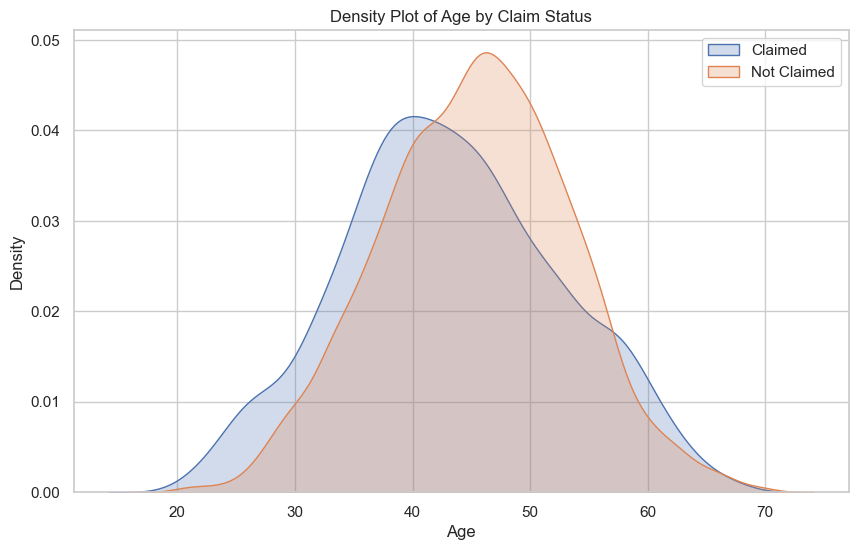

In [31]:

plt.figure(figsize=(10, 6))

sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 1, 'AGE'], label='Claimed', shade=True)
sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 0, 'AGE'], label='Not Claimed', shade=True)

plt.title('Density Plot of Age by Claim Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()


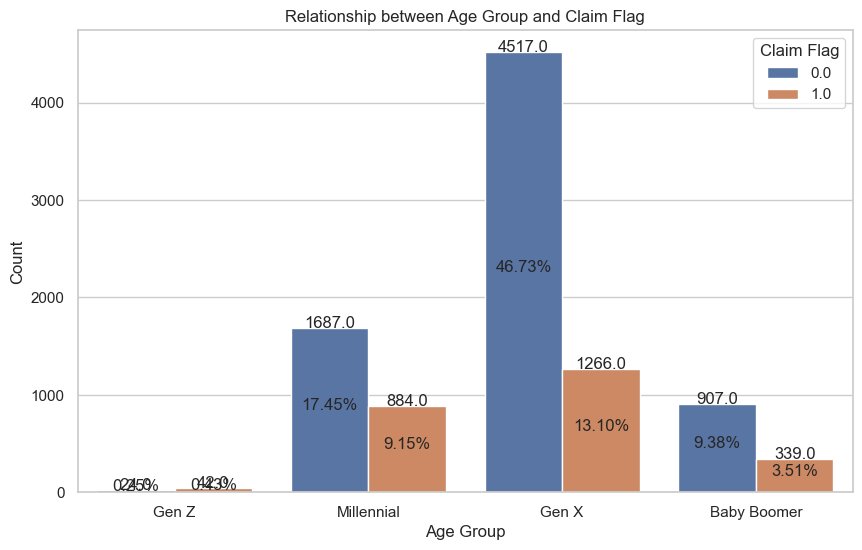

In [32]:
bins = [0, 24, 39, 54, df1['AGE'].max()]
labels = ['Gen Z', 'Millennial', 'Gen X', 'Baby Boomer']
df1['Age_Group'] = pd.cut(df1['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))


ax = sns.countplot(x='Age_Group', hue='CLAIM_FLAG', data=df1)

plt.title('Relationship between Age Group and Claim Flag')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Claim Flag')


total = len(df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}', ha='center')
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{percentage:.2f}%', ha='center')

plt.show()


In [33]:
df1.drop(['Age Group', 'Age_Group'], axis=1, inplace=True)
df1.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK',
       'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS',
       'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'EDUCATION_Bachelors',
       'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'OCCUPATION_Blue Collar', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student', 'CAR_TYPE_Minivan',
       'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van'],
      dtype='object')

## Bluebook 和 Car Type 

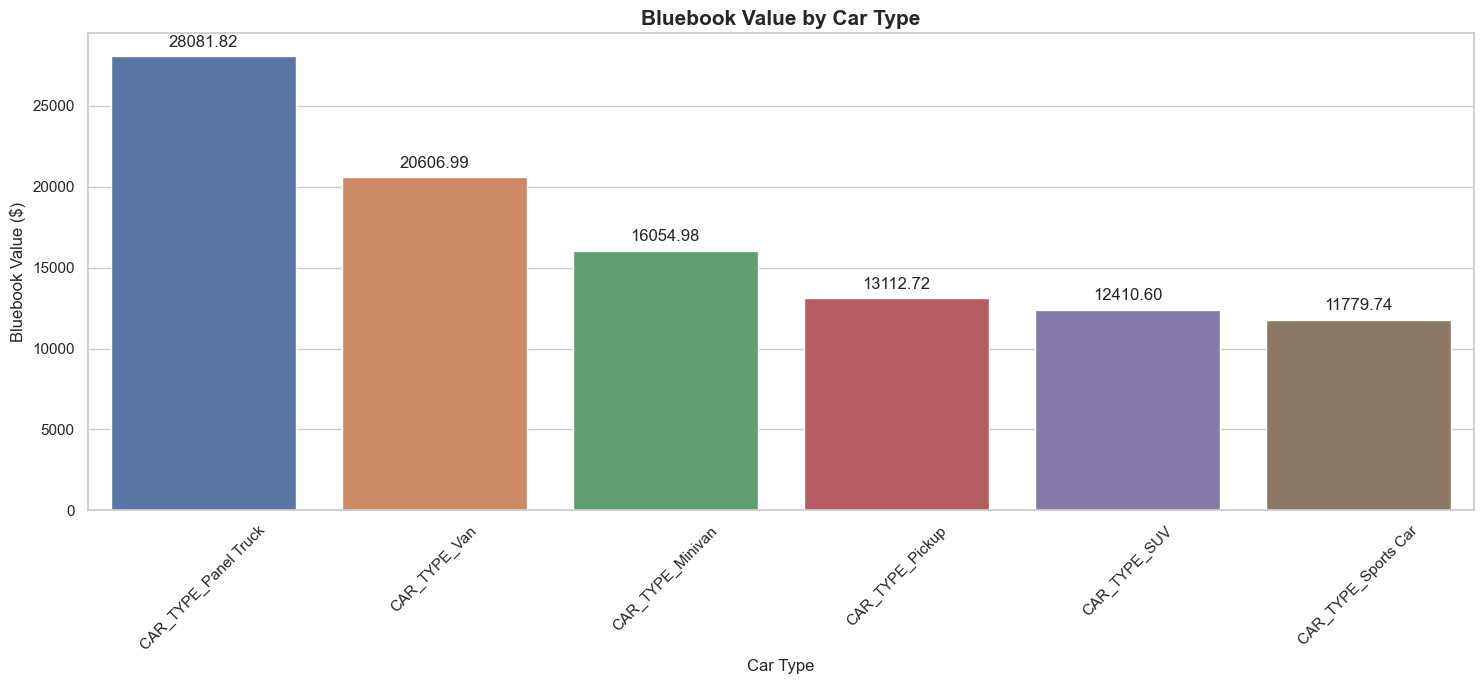

In [34]:
car_types = ['CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van']

averages = {}
for car_type in car_types:
    averages[car_type] = (df1[car_type] * df1['BLUEBOOK']).replace(0, np.nan).mean()

data_blue_custom = pd.DataFrame(list(averages.items()), columns=['Car_Type', 'BLUEBOOK']).sort_values(by='BLUEBOOK', ascending=False)


plt.figure(figsize=(15, 7))
plt.title('Bluebook Value by Car Type', fontweight='bold', fontsize=15)
barplot = sns.barplot(x='Car_Type', y='BLUEBOOK', data=data_blue_custom, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Car Type')
plt.ylabel('Bluebook Value ($)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

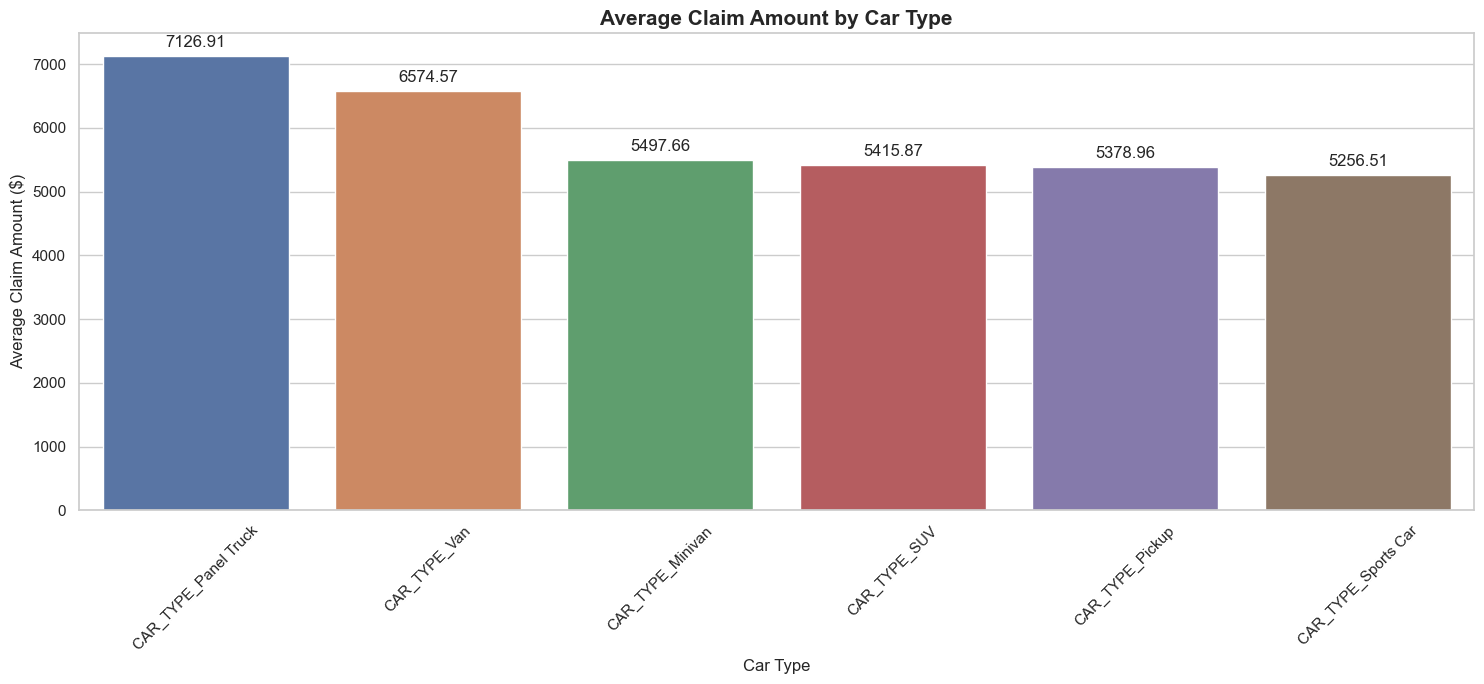

In [35]:
car_types = ['CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van']


claim_averages = {}
for car_type in car_types:
    claim_averages[car_type] = (df1[car_type] * df1['CLM_AMT']).replace(0, np.nan).mean()


data_claim_custom = pd.DataFrame(list(claim_averages.items()), columns=['Car_Type', 'Average_CLM_AMT']).sort_values(by='Average_CLM_AMT', ascending=False)


plt.figure(figsize=(15, 7))
plt.title('Average Claim Amount by Car Type', fontweight='bold', fontsize=15)
barplot = sns.barplot(x='Car_Type', y='Average_CLM_AMT', data=data_claim_custom, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Car Type')
plt.ylabel('Average Claim Amount ($)')


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


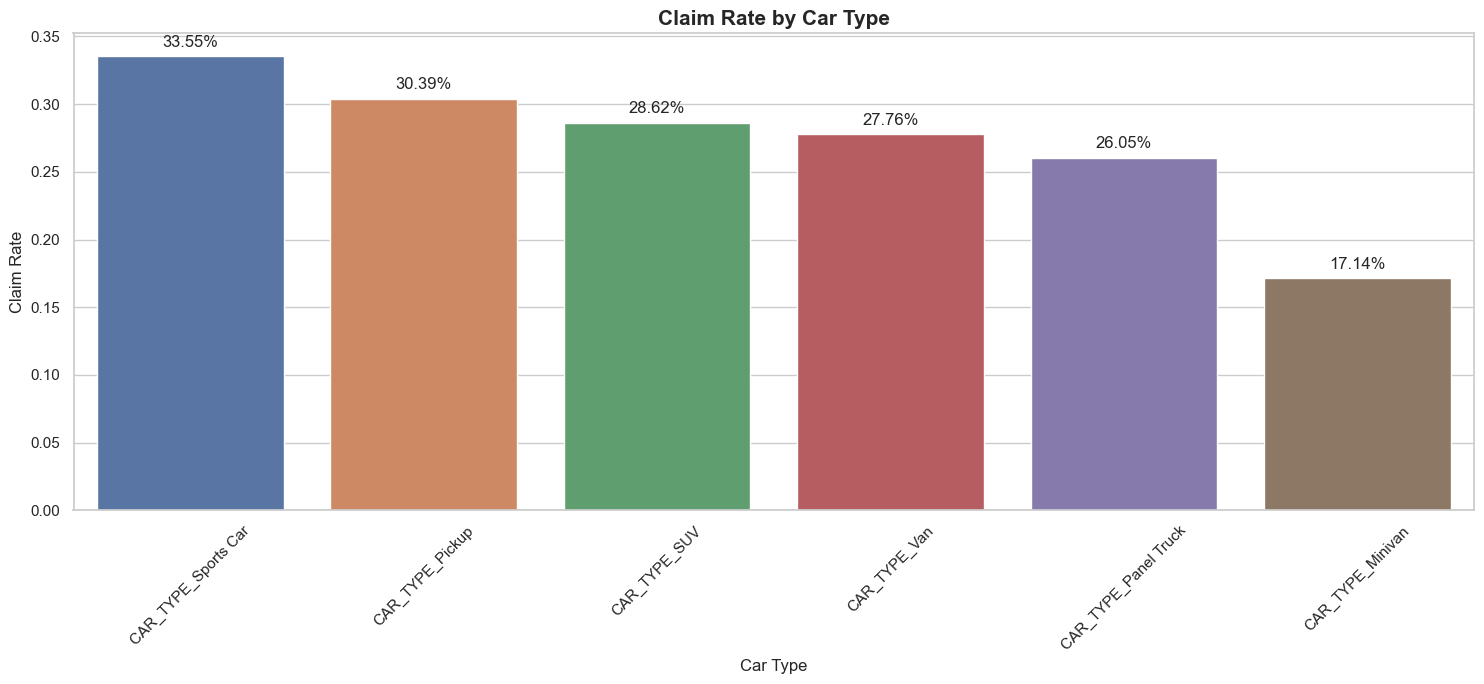

In [36]:

claim_flag_rates = {}
for car_type in car_types:
    total_count = df1[car_type].sum()  
    claim_count = (df1[car_type] * df1['CLAIM_FLAG']).sum()  
    claim_flag_rates[car_type] = claim_count / total_count  


data_claim_flag_rates = pd.DataFrame(list(claim_flag_rates.items()), columns=['Car_Type', 'Claim_Rate']).sort_values(by='Claim_Rate', ascending=False)


plt.figure(figsize=(15, 7))
plt.title('Claim Rate by Car Type', fontweight='bold', fontsize=15)
barplot = sns.barplot(x='Car_Type', y='Claim_Rate', data=data_claim_flag_rates, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Car Type')
plt.ylabel('Claim Rate')


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


In [37]:
claims_count = {car_type: 0 for car_type in car_types}
no_claims_count = {car_type: 0 for car_type in car_types}


for car_type in car_types:
    claims_count[car_type] = df1[df1[car_type] == 1]['CLAIM_FLAG'].sum()
    no_claims_count[car_type] = df1[df1[car_type] == 1].shape[0] - claims_count[car_type]


total = np.array(list(claims_count.values())) + np.array(list(no_claims_count.values()))
claims_rate = (np.array(list(claims_count.values())) / total) * 100
no_claims_rate = (np.array(list(no_claims_count.values())) / total) * 100

trace1 = go.Bar(x=car_types, y=claims_rate, name='Claimed', marker=dict(color='green'))
trace2 = go.Bar(x=car_types, y=no_claims_rate, name='Not Claimed', marker=dict(color='red'))

data = [trace1, trace2]


layout = go.Layout(
    title="Claim Rate by Car Type",
    xaxis=dict(title='Car Type'),
    yaxis=dict(title='Percentage (%)'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Income---houes_value and claim

Text(0.5, 1.0, 'Relationship between Home Value and Income')

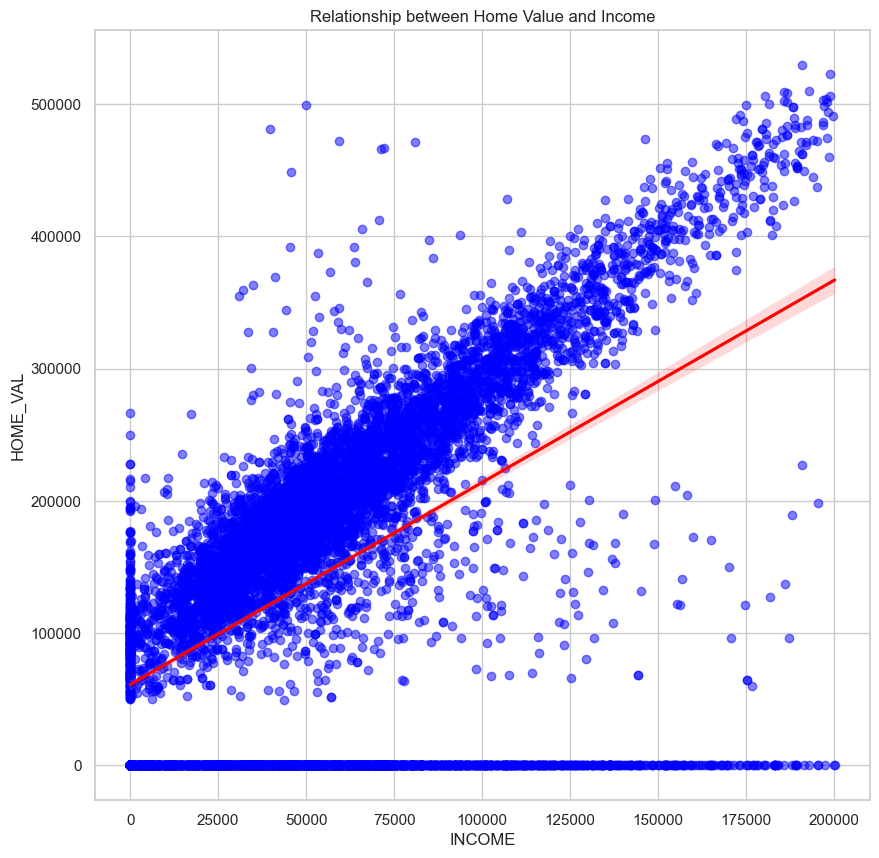

In [38]:
plt.figure(figsize=(10,10))

sns.regplot(data=df1, x="INCOME", y='HOME_VAL',
            scatter_kws={'color':'blue', 'alpha':0.5},
            line_kws={'color':'red'})

plt.title('Relationship between Home Value and Income')

In [39]:
plt.figure(figsize=(10,10))

fig = px.scatter(df1, x="INCOME", y="HOME_VAL", color="GENDER", facet_col="GENDER",
                trendline="ols", title="Relationship with Income and Home Value")

fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.show()

<Figure size 1000x1000 with 0 Axes>

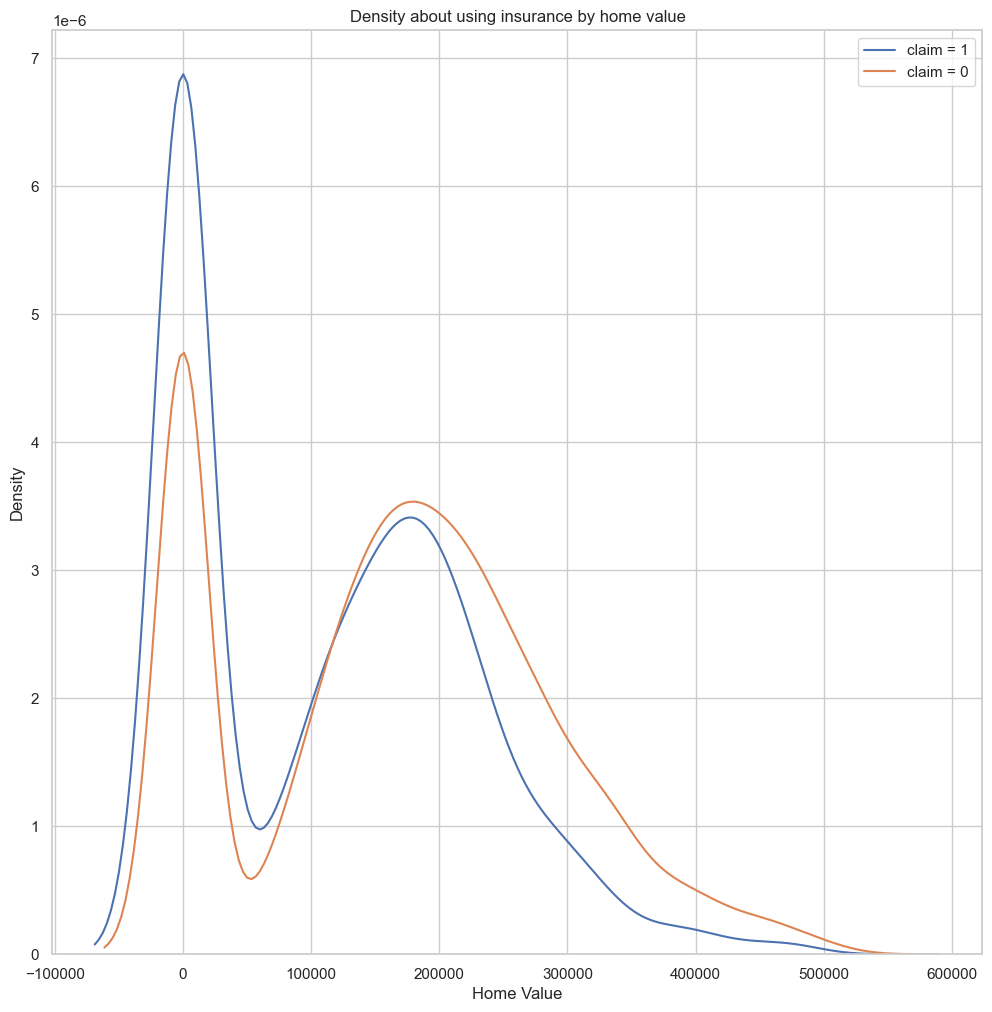

In [40]:
plt.figure(figsize=(12,12))

sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 1, 'HOME_VAL'], label='claim = 1')
sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 0, 'HOME_VAL'], label='claim = 0')

plt.title('Density about using insurance by home value')

plt.xlabel('Home Value')
plt.ylabel('Density')
plt.legend()

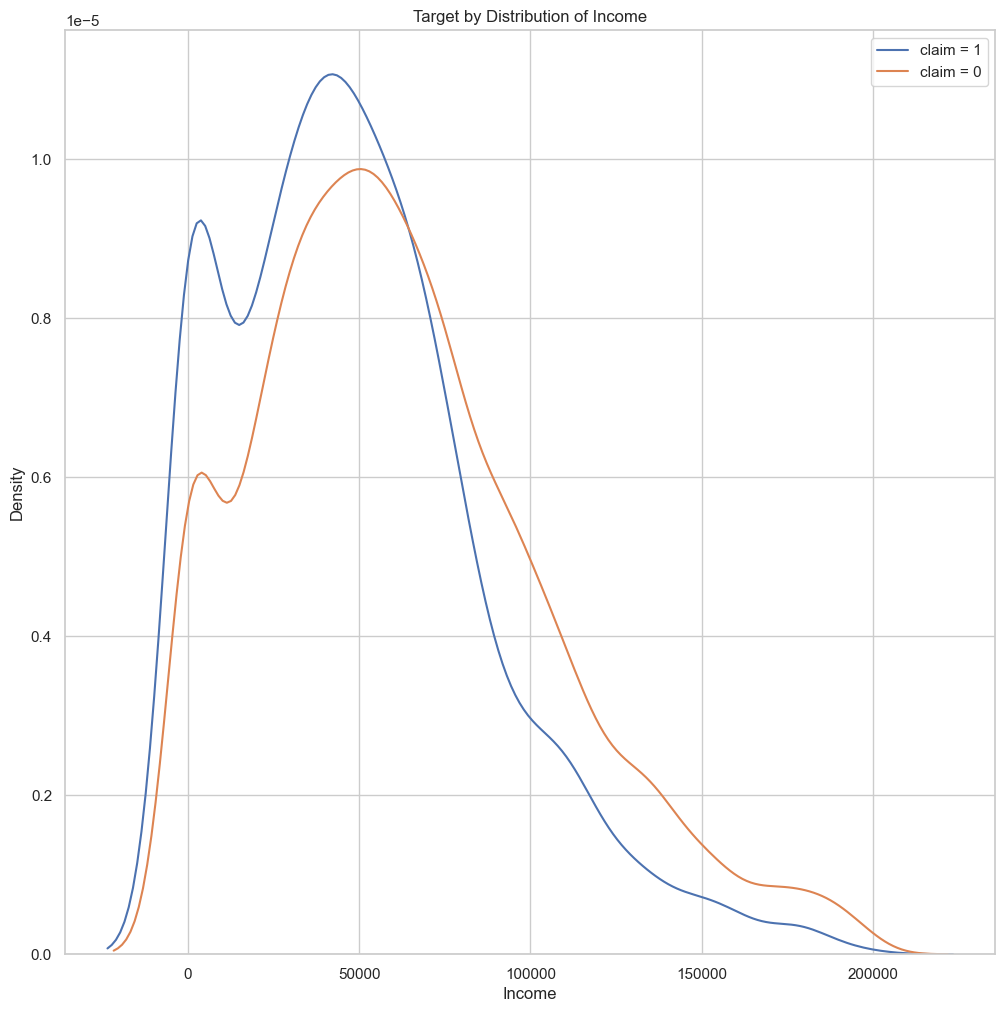

In [41]:
plt.figure(figsize=(12,12))

sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 1, 'INCOME'], label='claim = 1')

sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 0, 'INCOME'], label='claim = 0')

plt.title('Target by Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()

## Claim Frequence and Travel Time 

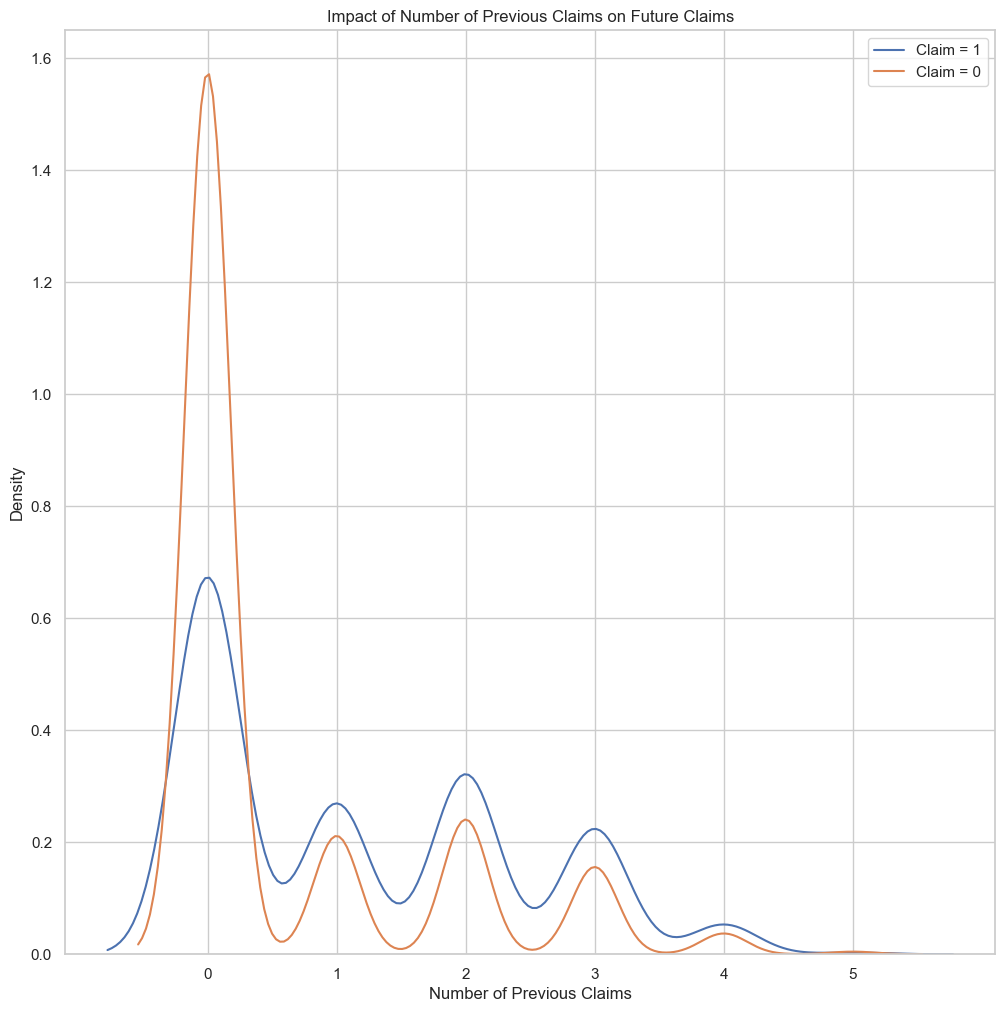

In [42]:
plt.figure(figsize=(12,12))

sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 1, 'CLM_FREQ'], label='Claim = 1')
sns.kdeplot(df1.loc[df1['CLAIM_FLAG'] == 0, 'CLM_FREQ'], label='Claim = 0')

plt.title('Impact of Number of Previous Claims on Future Claims')
plt.xticks(np.arange(0,6,step=1))
plt.xlabel('Number of Previous Claims')
plt.ylabel('Density')
plt.legend()


In [43]:
fig = px.box(df1, x='CLM_FREQ', y='TRAVTIME', color='GENDER', title='Box Plot of Time to Work with Total Past Claims by Gender')
fig.update_xaxes(title_text='Total Past Claims')
fig.update_yaxes(title_text='Travel Time to Work')
fig.show()


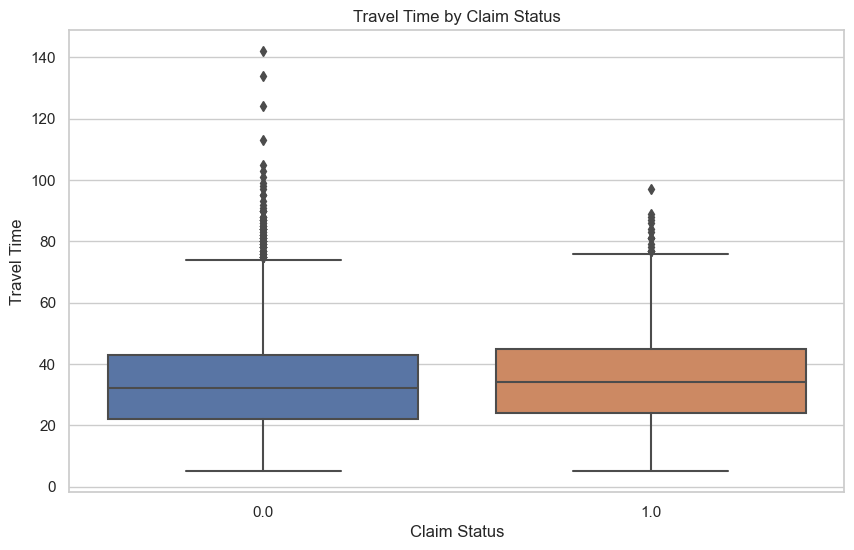

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLAIM_FLAG', y='TRAVTIME', data=df1)
plt.title('Travel Time by Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Travel Time')
plt.show()

## Car Age,Income,OCCUPATION  to Claim rate

In [45]:
plt.figure(figsize=(20,20))
fig = px.scatter(df1, x='CAR_AGE', y='INCOME', color='CLM_AMT', trendline='ols',
                height=600, width=1000)
fig.show()

<Figure size 2000x2000 with 0 Axes>

In [46]:
plt.figure(figsize=(20,20))
fig = px.scatter(df1, x='CAR_AGE', y='INCOME', color='CLAIM_FLAG', trendline='ols',
                height=600, width=1000)
fig.show()

<Figure size 2000x2000 with 0 Axes>

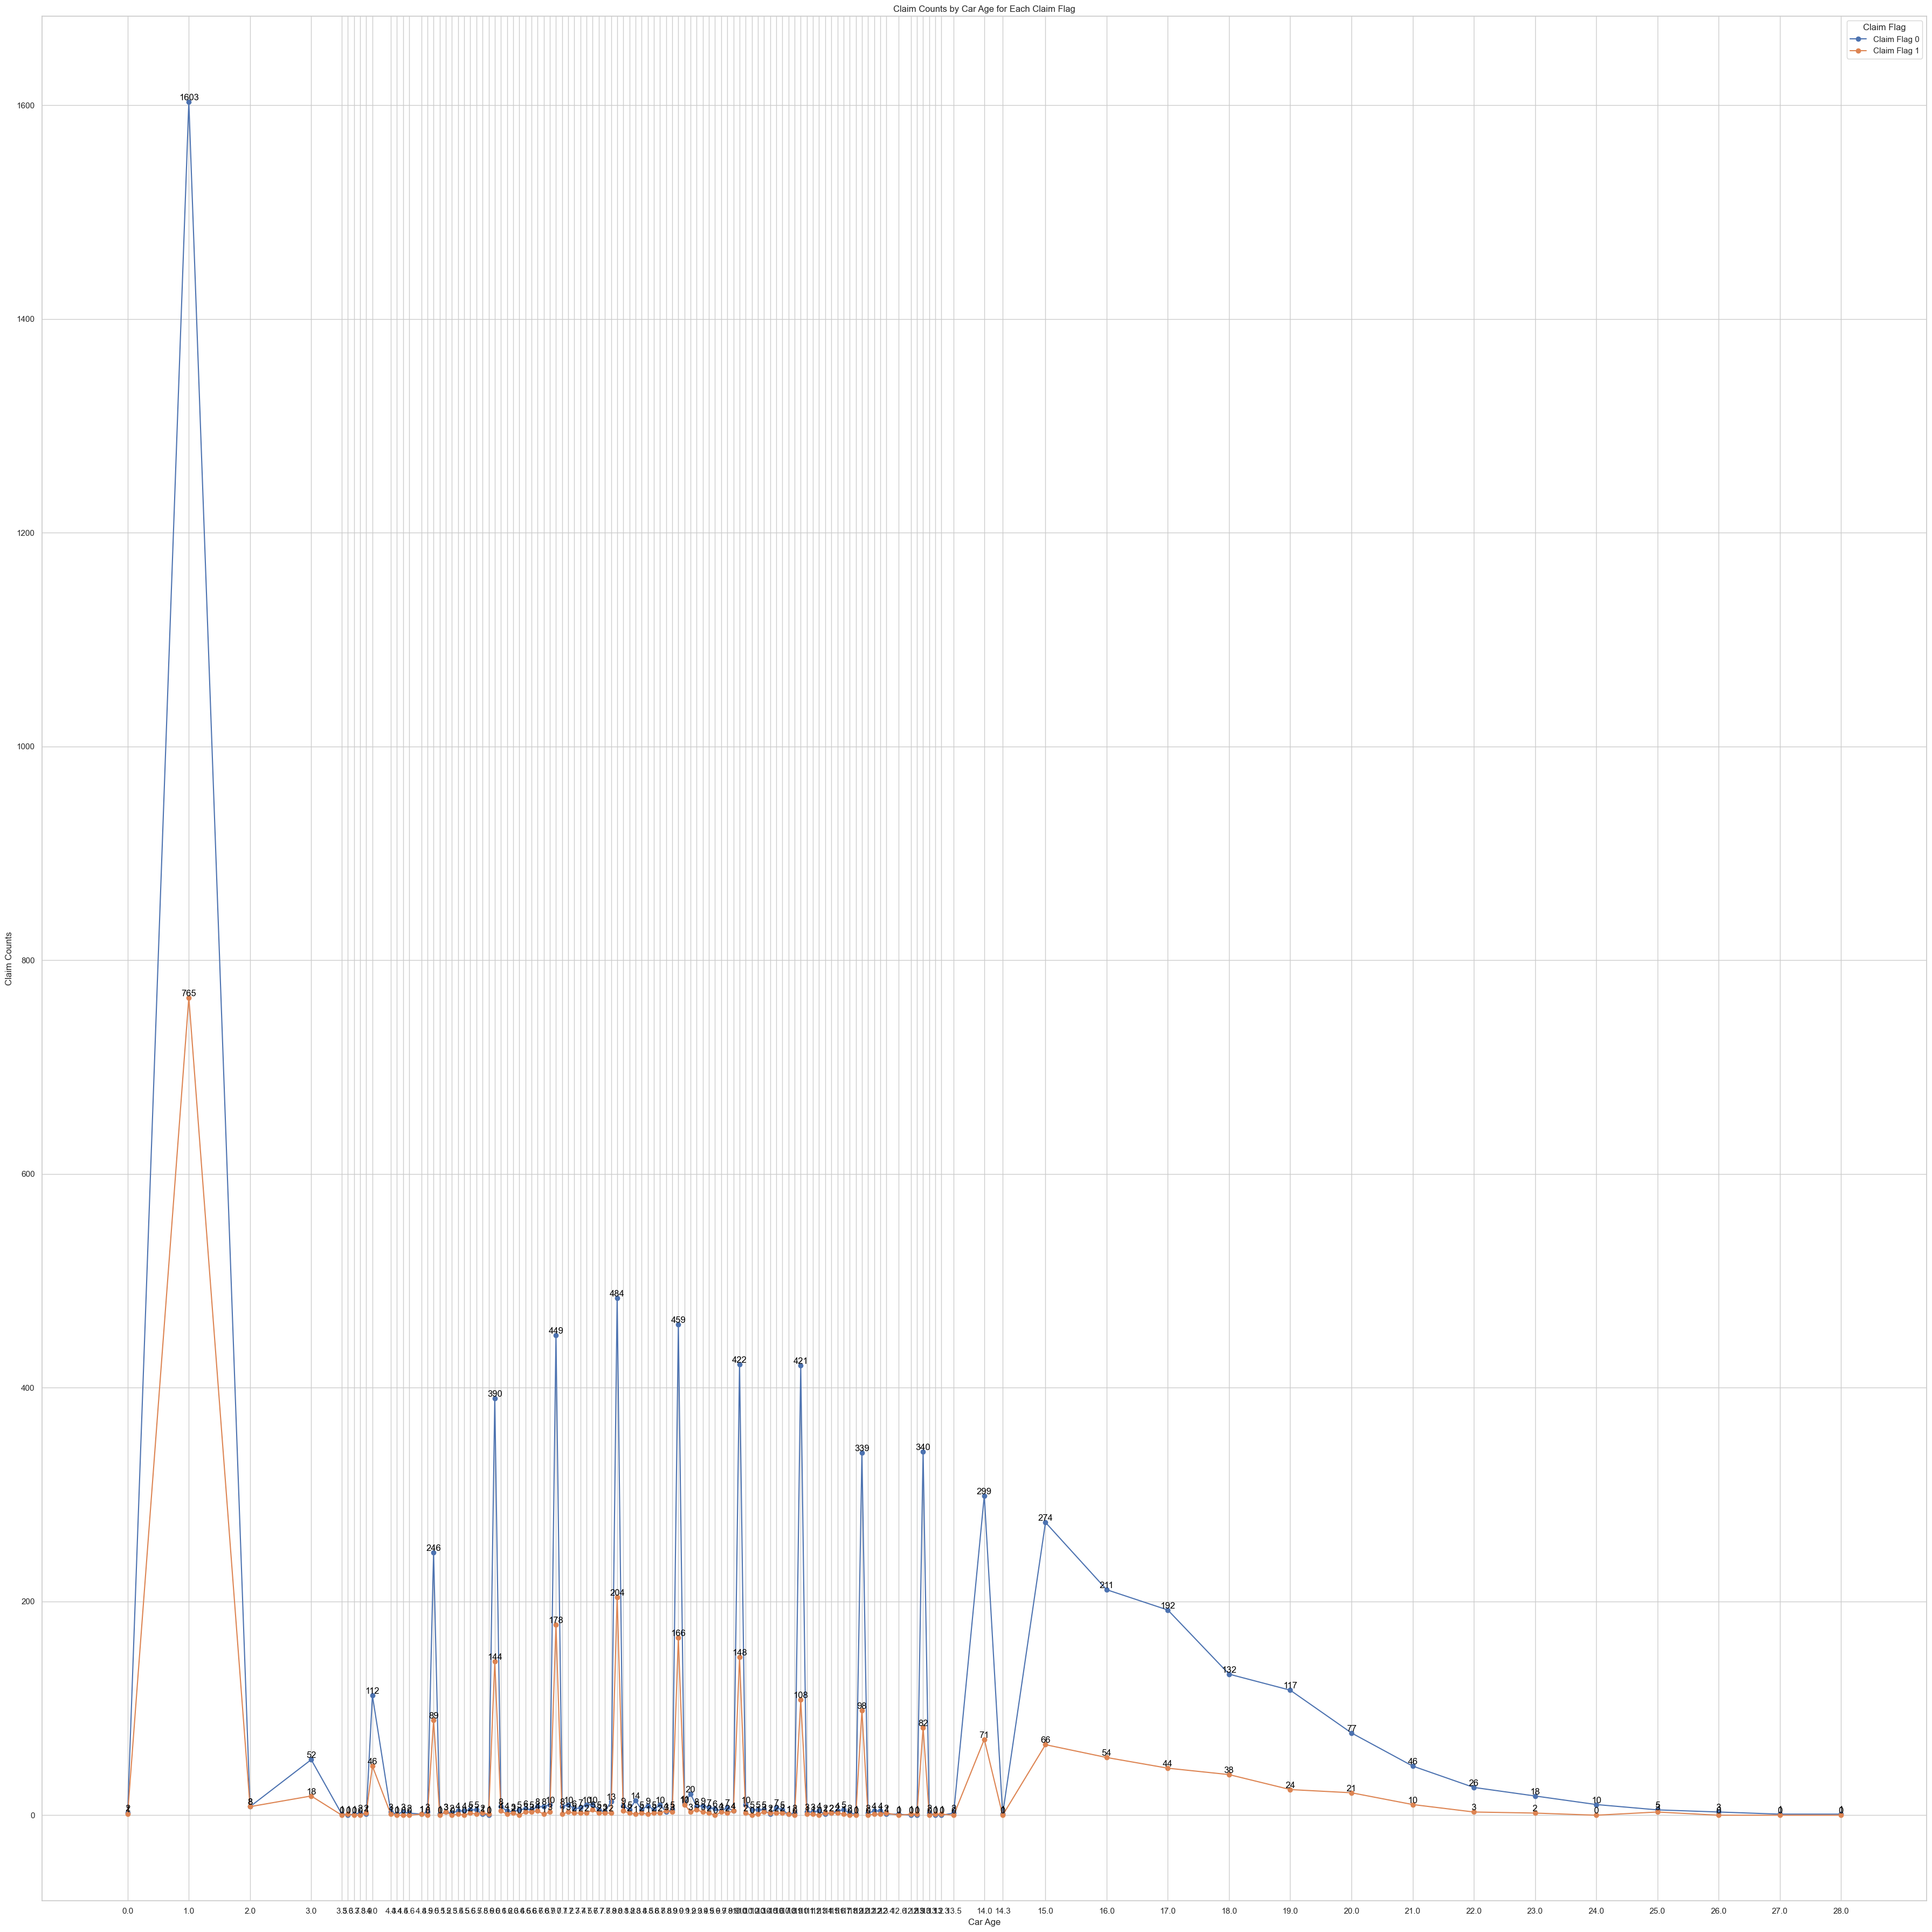

In [47]:
claim_counts_by_car_age = df1.groupby(['CAR_AGE', 'CLAIM_FLAG'])['CLAIM_FLAG'].count().unstack(fill_value=0).reset_index()

claim_counts_by_car_age.sort_values('CAR_AGE', inplace=True)

plt.figure(figsize=(36, 36))
for claim_flag in [0, 1]:
    plt.plot(claim_counts_by_car_age['CAR_AGE'], claim_counts_by_car_age[claim_flag], marker='o', linestyle='-', label=f'Claim Flag {claim_flag}')
    for x, y in zip(claim_counts_by_car_age['CAR_AGE'], claim_counts_by_car_age[claim_flag]):
        plt.text(x, y, f'{y}', color='black', ha='center', va='bottom')

plt.title('Claim Counts by Car Age for Each Claim Flag')
plt.xlabel('Car Age')
plt.ylabel('Claim Counts')
plt.legend(title='Claim Flag')

plt.grid(True)
plt.xticks(claim_counts_by_car_age['CAR_AGE'])  
plt.tight_layout()
plt.show()


In [48]:
unique_car_ages = df1['CAR_AGE'].unique()
for car_age in sorted(unique_car_ages):
    if pd.notna(car_age):
        claim_count = df1[(df1['CAR_AGE'] == car_age) & (df1['CLAIM_FLAG'] == 1)]['CLAIM_FLAG'].count()
        print(f'Car Age: {car_age}, Claim Counts: {claim_count}')
        claim_count = df1[(df1['CAR_AGE'] == car_age) & (df1['CLAIM_FLAG'] == 0)]['CLAIM_FLAG'].count()
        print(f'Car Age: {car_age}, Claim Counts: {claim_count}')

Car Age: 0.0, Claim Counts: 1
Car Age: 0.0, Claim Counts: 2
Car Age: 1.0, Claim Counts: 765
Car Age: 1.0, Claim Counts: 1603
Car Age: 2.0, Claim Counts: 8
Car Age: 2.0, Claim Counts: 8
Car Age: 3.0, Claim Counts: 18
Car Age: 3.0, Claim Counts: 52
Car Age: 3.5, Claim Counts: 0
Car Age: 3.5, Claim Counts: 1
Car Age: 3.6, Claim Counts: 1
Car Age: 3.6, Claim Counts: 0
Car Age: 3.7, Claim Counts: 0
Car Age: 3.7, Claim Counts: 1
Car Age: 3.8, Claim Counts: 0
Car Age: 3.8, Claim Counts: 2
Car Age: 3.9, Claim Counts: 2
Car Age: 3.9, Claim Counts: 1
Car Age: 4.0, Claim Counts: 46
Car Age: 4.0, Claim Counts: 112
Car Age: 4.3, Claim Counts: 1
Car Age: 4.3, Claim Counts: 3
Car Age: 4.4, Claim Counts: 0
Car Age: 4.4, Claim Counts: 1
Car Age: 4.5, Claim Counts: 0
Car Age: 4.5, Claim Counts: 3
Car Age: 4.6, Claim Counts: 0
Car Age: 4.6, Claim Counts: 2
Car Age: 4.8, Claim Counts: 1
Car Age: 4.8, Claim Counts: 1
Car Age: 4.9, Claim Counts: 0
Car Age: 4.9, Claim Counts: 3
Car Age: 5.0, Claim Counts: 89

In [49]:
occupation_columns = [
    'OCCUPATION_Blue Collar', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
    'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
    'OCCUPATION_Professional', 'OCCUPATION_Student'
]

df1['Occupation'] = pd.NA
for occupation in occupation_columns:
    df1.loc[df1[occupation] == 1, 'Occupation'] = occupation.replace('OCCUPATION_', '')

agg_df = df1.groupby('Occupation').agg(
    Average_Income=pd.NamedAgg(column='INCOME', aggfunc='mean'),
    Average_CLM_AMT=pd.NamedAgg(column='CLM_AMT', aggfunc='mean')
).reset_index()

fig = px.scatter(
    agg_df, 
    x='Average_Income', 
    y='Average_CLM_AMT', 
    color='Occupation',
    title="Average Claim Amount vs. Average Income by Occupation",
    labels={"Average_Income": "Average Income", "Average_CLM_AMT": "Average Claim Amount"},
    hover_data=['Occupation']
)

fig.show()

In [50]:
occupation_columns = [
    'OCCUPATION_Blue Collar', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
    'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
    'OCCUPATION_Professional', 'OCCUPATION_Student'
]

claims_count = {occupation: 0 for occupation in occupation_columns}
no_claims_count = {occupation: 0 for occupation in occupation_columns}

for occupation in occupation_columns:
    claims_count[occupation] = df1[df1[occupation] == 1]['CLAIM_FLAG'].sum()
    no_claims_count[occupation] = df1[(df1[occupation] == 1) & (df1['CLAIM_FLAG'] == 0)].shape[0]

total_claims = np.array(list(claims_count.values())) + np.array(list(no_claims_count.values()))
claims_rate = (np.array(list(claims_count.values())) / total_claims) * 100
no_claims_rate = (np.array(list(no_claims_count.values())) / total_claims) * 100

occupation_names = [oc.split('_')[1] for oc in occupation_columns]

trace1 = go.Bar(x=occupation_names, y=claims_rate, name='Claimed', marker=dict(color='green'))
trace2 = go.Bar(x=occupation_names, y=no_claims_rate, name='Not Claimed', marker=dict(color='red'))

layout = go.Layout(
    title="Claim Rate by Occupation",
    xaxis=dict(title='Occupation'),
    yaxis=dict(title='Percentage (%)'),
    barmode='group'  
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


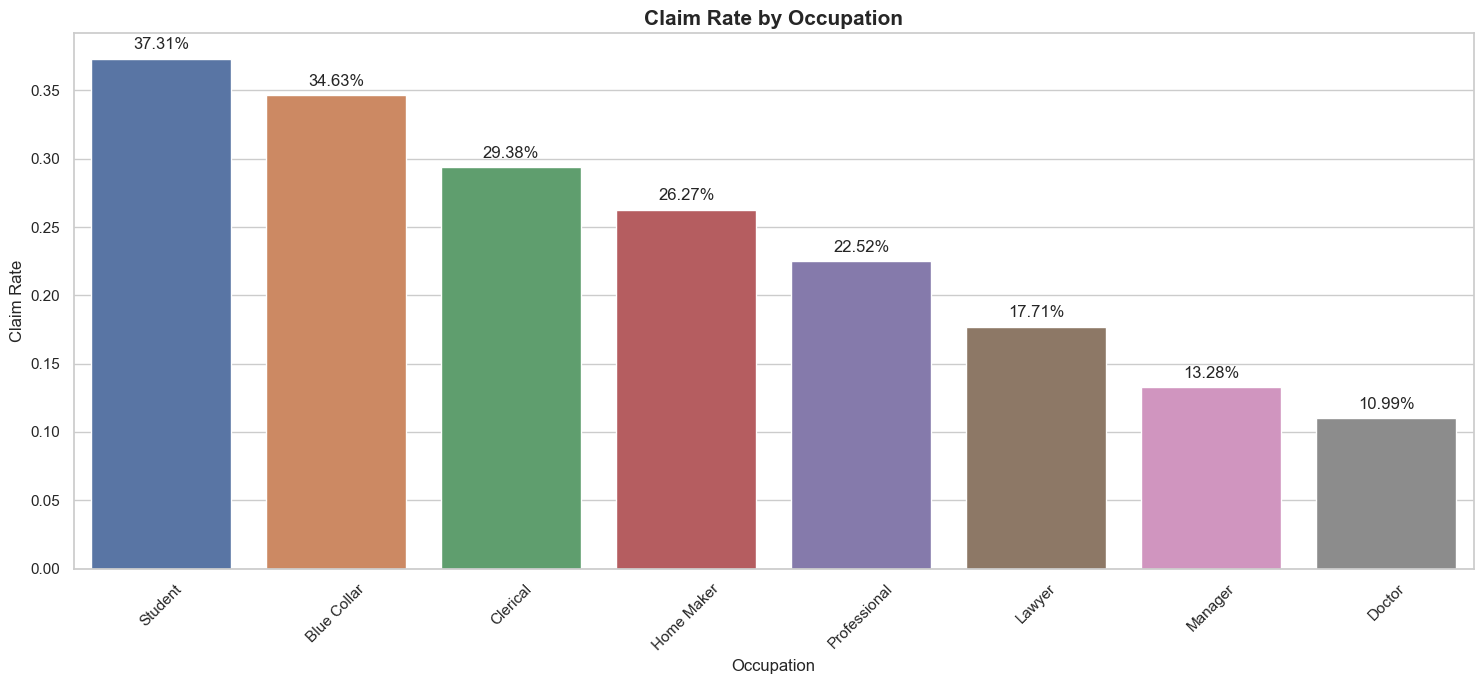

In [51]:
claim_rate_by_occupation = {}
for occupation in occupation_columns:
    total_count = df1[occupation].sum()  
    claim_count = (df1[occupation] * df1['CLAIM_FLAG']).sum()  
    claim_rate_by_occupation[occupation.replace('OCCUPATION_', '')] = claim_count / total_count  


data_claim_rate_by_occupation = pd.DataFrame(list(claim_rate_by_occupation.items()), columns=['Occupation', 'Claim_Rate']).sort_values(by='Claim_Rate', ascending=False)

plt.figure(figsize=(15, 7))
plt.title('Claim Rate by Occupation', fontweight='bold', fontsize=15)
barplot = sns.barplot(x='Occupation', y='Claim_Rate', data=data_claim_rate_by_occupation, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Claim Rate')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

## EDUCATION

In [52]:
education_columns = [
    'EDUCATION_Bachelors', 'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD'
]

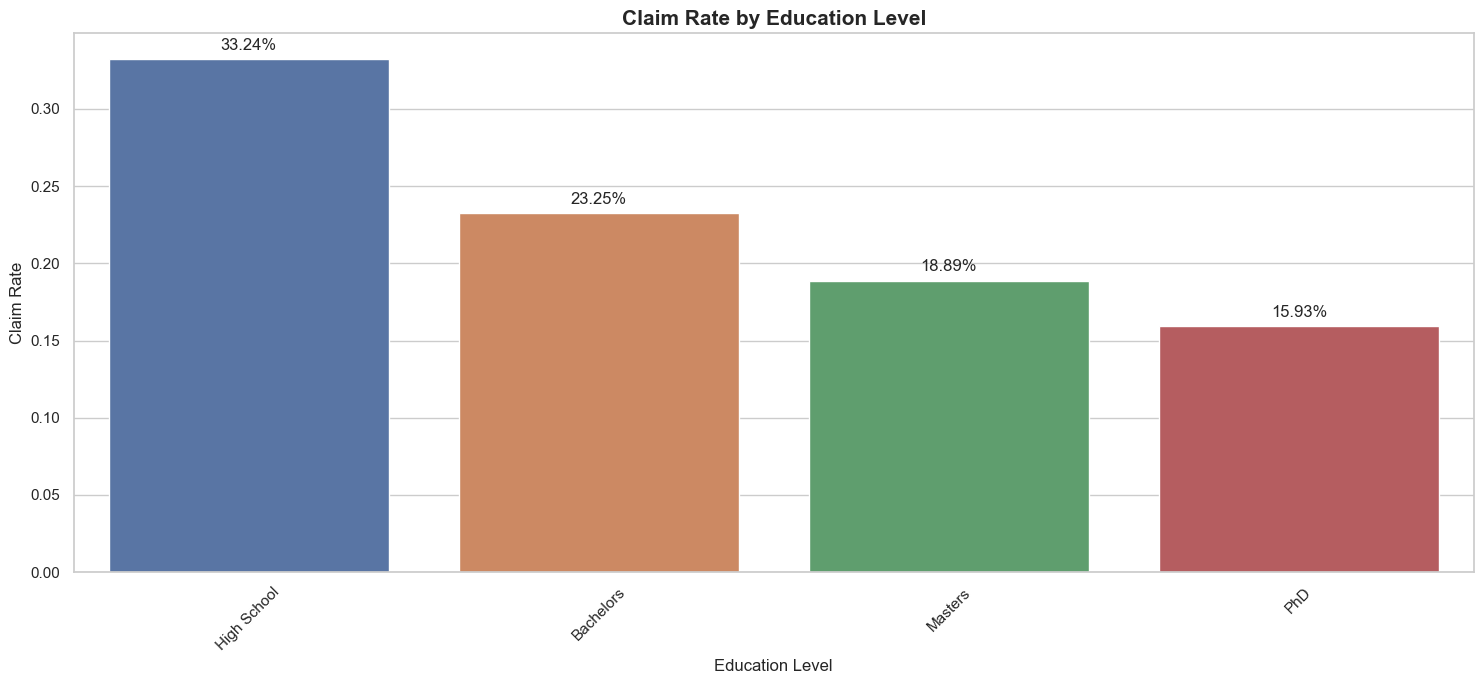

In [53]:
claim_rate_by_education = {}
for education in education_columns:
    total_count = df1[education].sum()  
    claim_count = (df1[education] * df1['CLAIM_FLAG']).sum() 
    claim_rate_by_education[education.replace('EDUCATION_', '')] = claim_count / total_count  

data_claim_rate_by_education = pd.DataFrame(list(claim_rate_by_education.items()), columns=['Education', 'Claim_Rate']).sort_values(by='Claim_Rate', ascending=False)

plt.figure(figsize=(15, 7))
plt.title('Claim Rate by Education Level', fontweight='bold', fontsize=15)
barplot = sns.barplot(x='Education', y='Claim_Rate', data=data_claim_rate_by_education, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Claim Rate')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


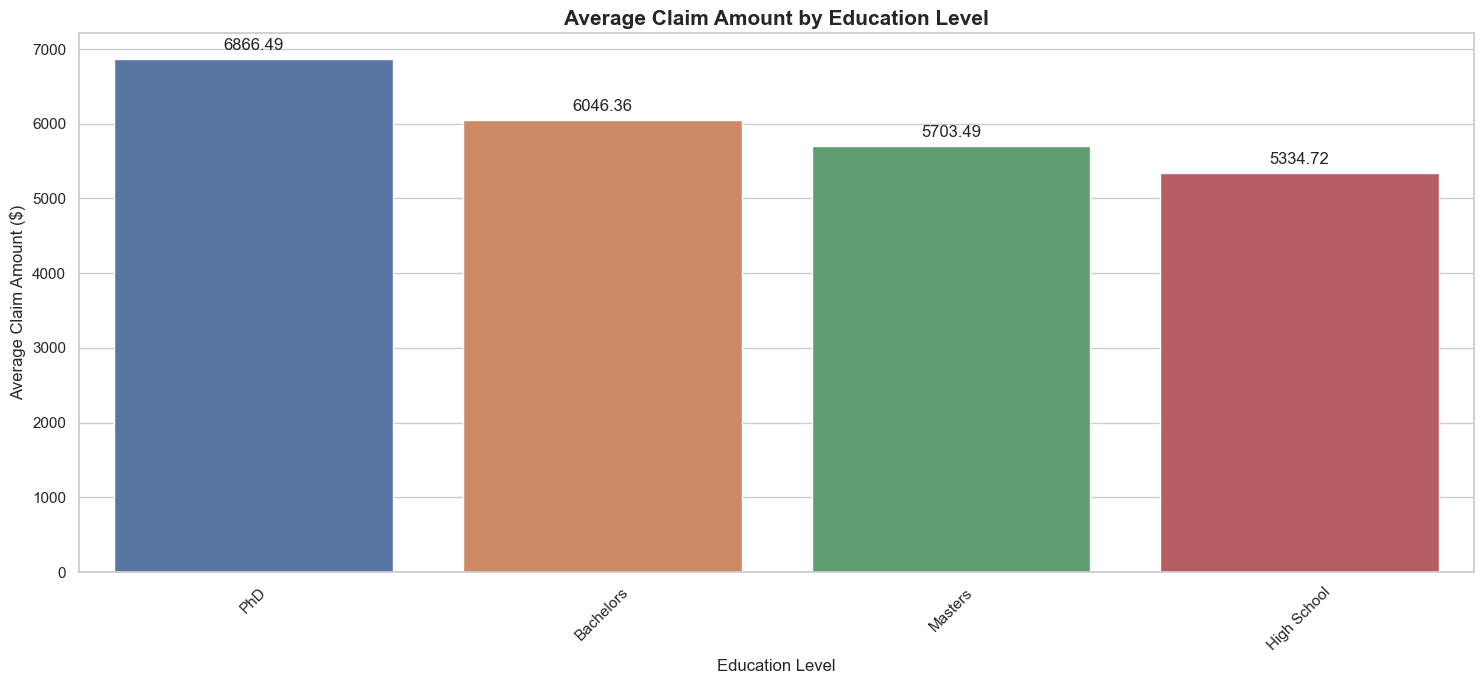

In [54]:
average_claim_by_education = {}
for education in education_columns:
    average_claim = df1[df1[education] == 1]['CLM_AMT'].replace(0, np.nan).mean()
    average_claim_by_education[education.replace('EDUCATION_', '')] = average_claim

data_average_claim_by_education = pd.DataFrame(list(average_claim_by_education.items()), columns=['Education', 'Average_CLM_AMT']).sort_values(by='Average_CLM_AMT', ascending=False)

plt.figure(figsize=(15, 7))
plt.title('Average Claim Amount by Education Level', fontweight='bold', fontsize=15)
barplot = sns.barplot(x='Education', y='Average_CLM_AMT', data=data_average_claim_by_education, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Average Claim Amount ($)')

for p in barplot.patches:
    height = p.get_height()
    display_height = format(height, '.2f') if not np.isnan(height) else 'NaN'
    barplot.annotate(display_height,
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


## Marital Status

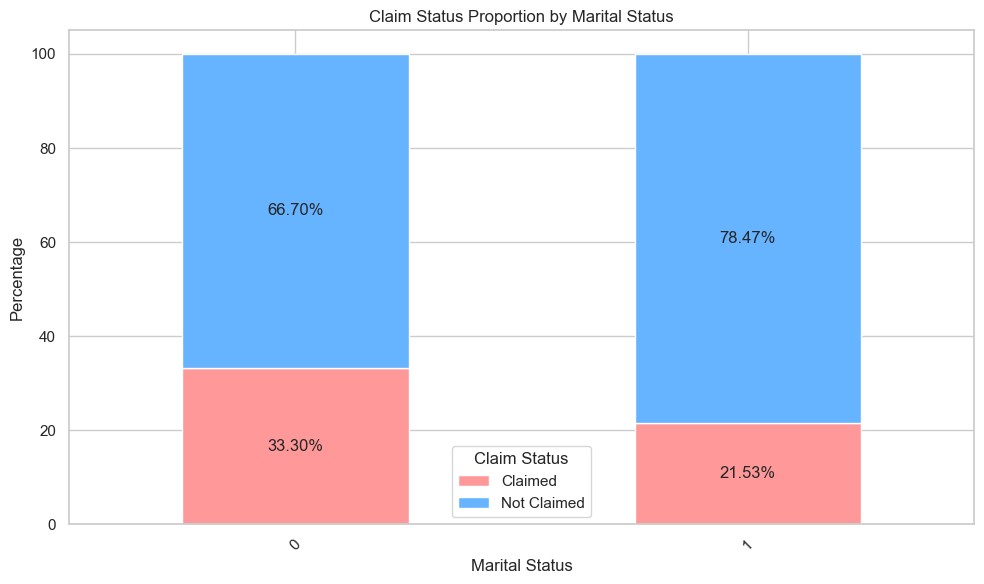

In [55]:
mstatus_claim_counts = df1.groupby('MSTATUS')['CLAIM_FLAG'].value_counts().unstack(fill_value=0)
mstatus_claim_counts['Total'] = mstatus_claim_counts.sum(axis=1)
mstatus_claim_counts['Claimed'] = (mstatus_claim_counts[1] / mstatus_claim_counts['Total']) * 100
mstatus_claim_counts['Not Claimed'] = (mstatus_claim_counts[0] / mstatus_claim_counts['Total']) * 100

plot_data = mstatus_claim_counts[['Claimed', 'Not Claimed']]

ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])

plt.title('Claim Status Proportion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')

plt.legend(title='Claim Status', labels=['Claimed', 'Not Claimed'])

plt.xticks(rotation=45)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

## Gender

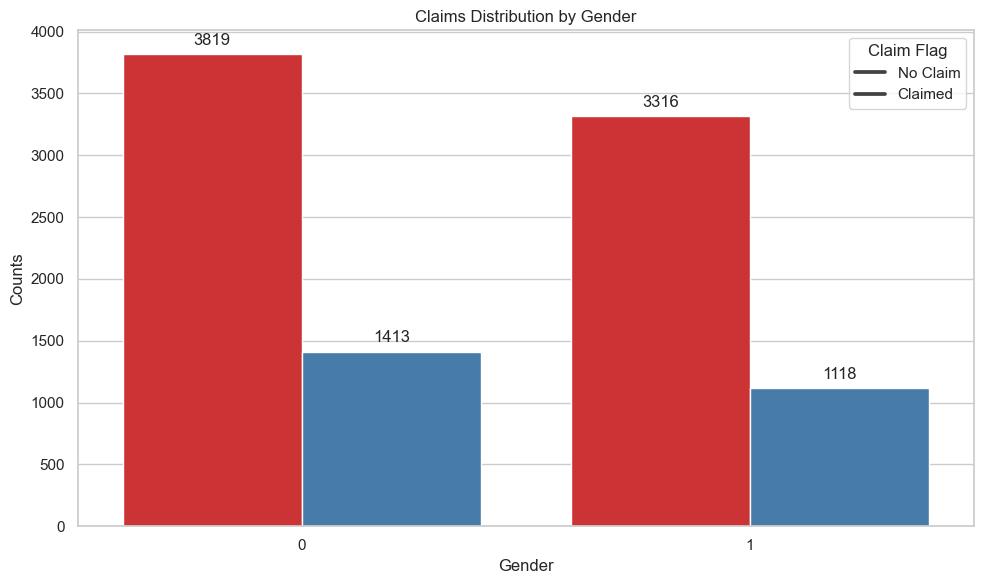

In [56]:
claims_distribution_by_gender = df1.groupby(['GENDER', 'CLAIM_FLAG']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='GENDER', y='Counts', hue='CLAIM_FLAG', data=claims_distribution_by_gender, palette='Set1')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.title('Claims Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend(title='Claim Flag', labels=['No Claim', 'Claimed'])
plt.tight_layout()
plt.show()

## MVR_PTS 

In [57]:
df1['MVR_PTS'].describe()

count    9666.000000
mean        1.655907
std         2.127677
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        13.000000
Name: MVR_PTS, dtype: float64

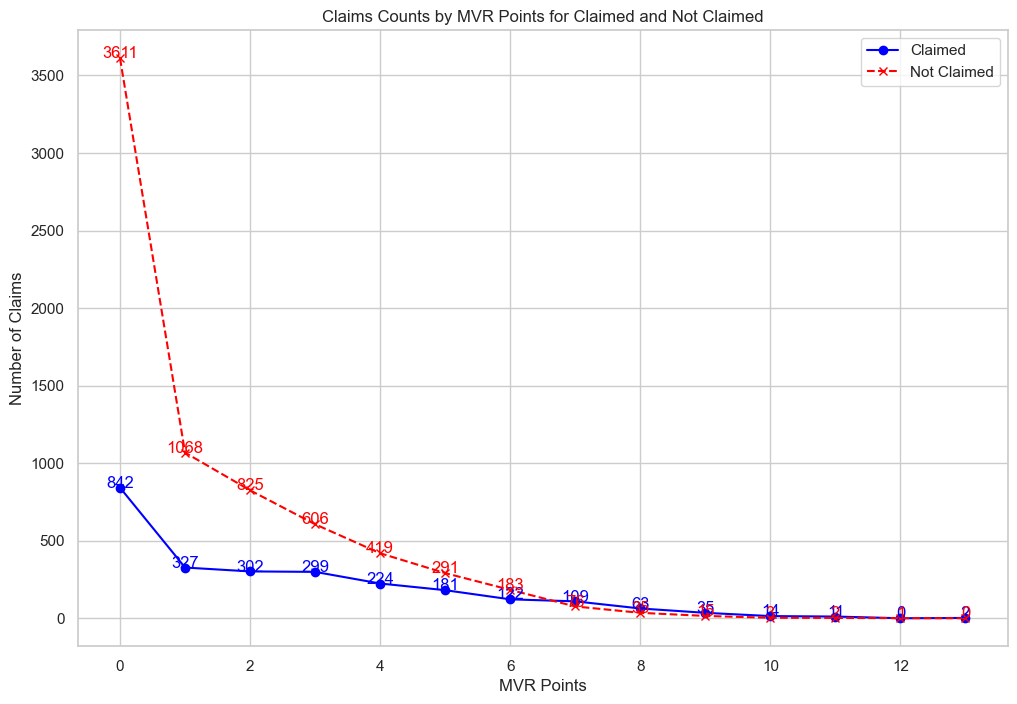

In [58]:
claims_counts_by_mvr_pts = df1.groupby(['MVR_PTS', 'CLAIM_FLAG']).size().unstack(fill_value=0)

claims_counts_by_mvr_pts.index = claims_counts_by_mvr_pts.index.astype(int)
claims_counts_by_mvr_pts.sort_index(inplace=True)

plt.figure(figsize=(12, 8))
plt.plot(claims_counts_by_mvr_pts.index, claims_counts_by_mvr_pts[1], label='Claimed', marker='o', linestyle='-', color='blue')
plt.plot(claims_counts_by_mvr_pts.index, claims_counts_by_mvr_pts[0], label='Not Claimed', marker='x', linestyle='--', color='red')

for idx in claims_counts_by_mvr_pts.index:
    plt.text(idx, claims_counts_by_mvr_pts.at[idx, 1], str(claims_counts_by_mvr_pts.at[idx, 1]), color="blue", ha="center")
    plt.text(idx, claims_counts_by_mvr_pts.at[idx, 0], str(claims_counts_by_mvr_pts.at[idx, 0]), color="red", ha="center")

plt.title('Claims Counts by MVR Points for Claimed and Not Claimed')
plt.xlabel('MVR Points')
plt.ylabel('Number of Claims')
plt.legend()
plt.grid(True)

plt.show()


##  URBANICITY

<Figure size 1000x600 with 0 Axes>

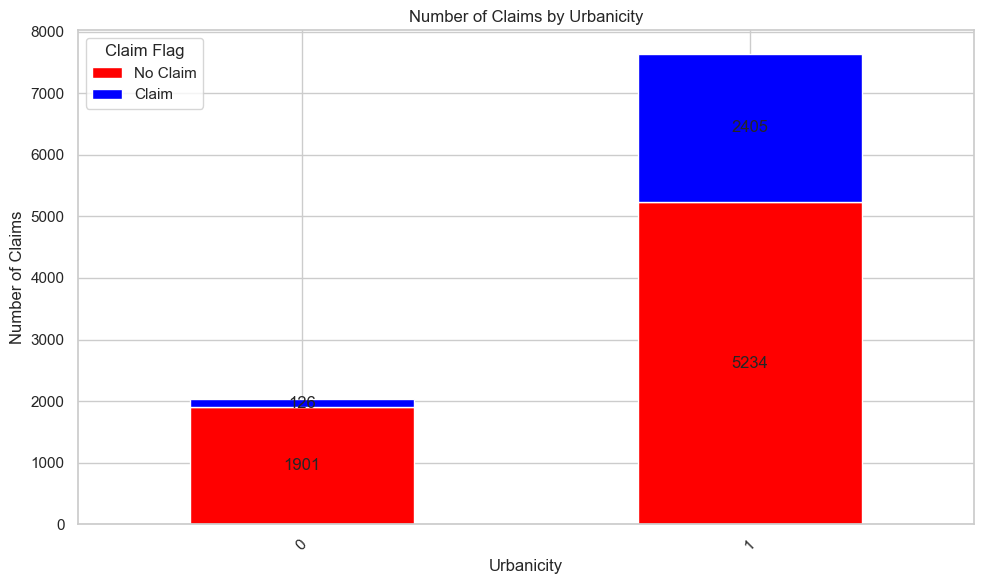

In [59]:
claims_by_urbanicity = df1.groupby('URBANICITY')['CLAIM_FLAG'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
barplot = claims_by_urbanicity.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))

plt.title('Number of Claims by Urbanicity')
plt.xlabel('Urbanicity')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Claim Flag', labels=['No Claim', 'Claim'])

for bar in barplot.containers:
    barplot.bar_label(bar, fmt='%.0f', label_type='center')

plt.tight_layout()
plt.show()

## YOJ

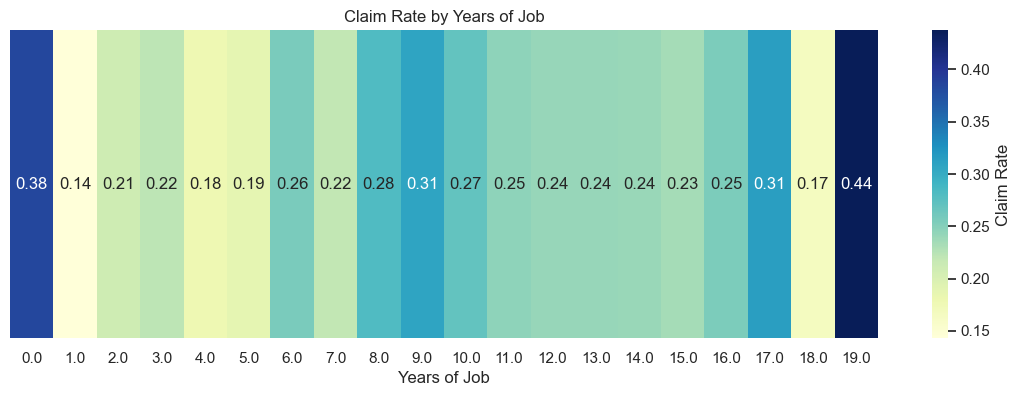

In [60]:
claims_counts_by_yoj = df1.groupby(['YOJ', 'CLAIM_FLAG']).size().unstack(fill_value=0)

all_yoj = pd.DataFrame(index=range(20))
claims_counts_by_yoj = all_yoj.join(claims_counts_by_yoj).fillna(0)

claims_counts_by_yoj['Claim_Rate'] = claims_counts_by_yoj[1] / (claims_counts_by_yoj[0] + claims_counts_by_yoj[1])

heatmap_data = claims_counts_by_yoj[['Claim_Rate']].T


plt.figure(figsize=(14, 4))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, cbar_kws={'label': 'Claim Rate'})

plt.title('Claim Rate by Years of Job')
plt.xlabel('Years of Job')
plt.yticks([])  

plt.show()

## CARUSE

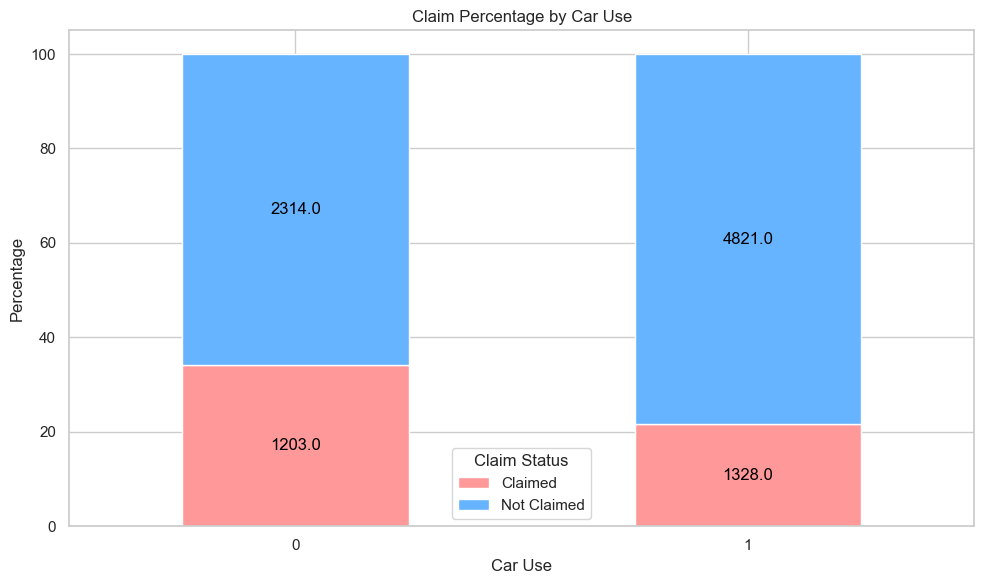

In [61]:
claims_by_car_use = df1.groupby('CAR_USE')['CLAIM_FLAG'].value_counts().unstack(fill_value=0)

claims_by_car_use['Total'] = claims_by_car_use.sum(axis=1)
claims_by_car_use['Claimed_Percentage'] = (claims_by_car_use[1] / claims_by_car_use['Total']) * 100
claims_by_car_use['Not_Claimed_Percentage'] = (claims_by_car_use[0] / claims_by_car_use['Total']) * 100

claims_by_car_use[['Claimed_Percentage', 'Not_Claimed_Percentage']].plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

plt.title('Claim Percentage by Car Use')
plt.xlabel('Car Use')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Claimed', 'Not Claimed'], title='Claim Status')

for i, row in claims_by_car_use.iterrows():
    plt.text(i, row['Claimed_Percentage']/2, f'{row[1]}', ha='center', va='center', color='black')
    plt.text(i, row['Claimed_Percentage'] + row['Not_Claimed_Percentage']/2, f'{row[0]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## OLDCLAIM

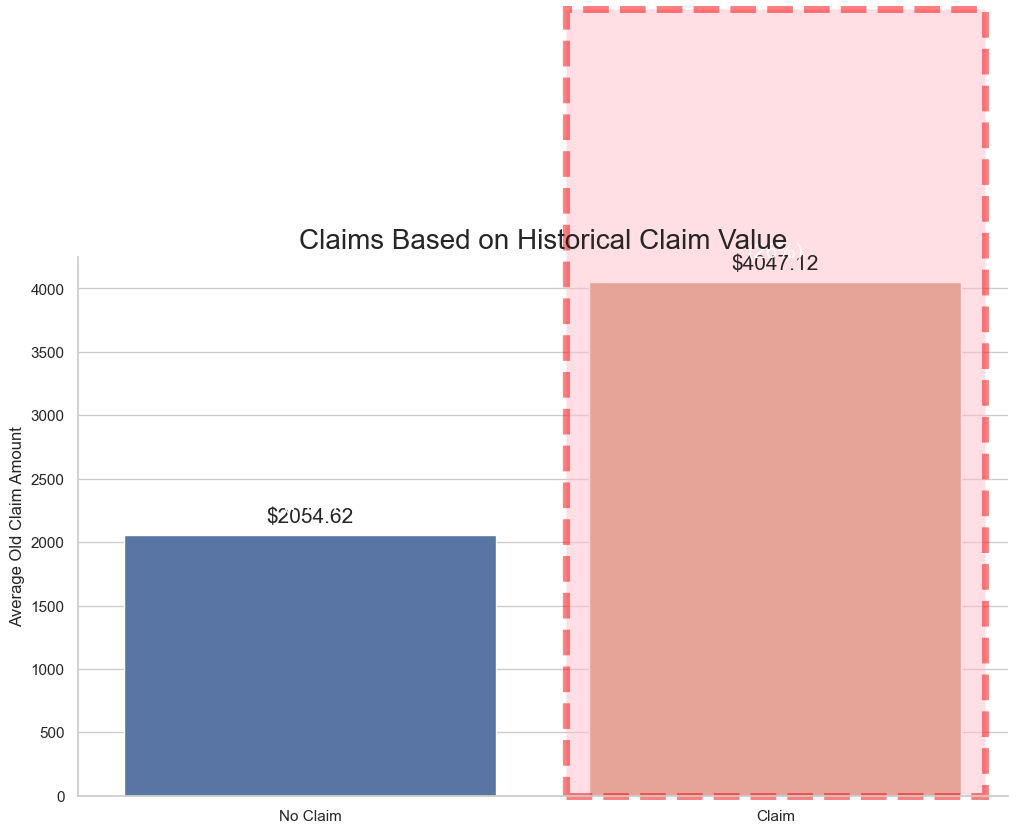

In [62]:
data_oflag = df1.groupby('CLAIM_FLAG')['OLDCLAIM'].mean().reset_index().sort_values('OLDCLAIM', ascending=False)

data_oflag['OLDCLAIM'] = data_oflag['OLDCLAIM'].round(2)

fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(x='CLAIM_FLAG', y='OLDCLAIM', data=data_oflag, ax=ax)


ax.set_ylabel('Average Old Claim Amount')
ax.set_xlabel('')


rect = Rectangle((0.55, 0), 0.9, 6200, linestyle='dashed', ec='red', facecolor='pink', alpha=0.5, lw=5, clip_on=False, fill=True)
ax.add_patch(rect)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

total = df1['OLDCLAIM'].count()  
for i, row in data_oflag.iterrows():
    count = df1[df1['CLAIM_FLAG'] == row['CLAIM_FLAG']]['OLDCLAIM'].count()
    percentage = (count / total) * 100
    plt.text(row.name, row['OLDCLAIM'] + 100, f"${row['OLDCLAIM']}", fontsize=15, ha='center')
    plt.text(row.name, row['OLDCLAIM'] + 200, f"({percentage:.0f}%)", fontsize=15, ha='center', color='white')

plt.title('Claims Based on Historical Claim Value', fontsize=20)
ax.set_xticklabels(['No Claim', 'Claim'])

plt.show()

高出97%

# Modeling

In [63]:
df1.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK',
       'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS',
       'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'EDUCATION_Bachelors',
       'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'OCCUPATION_Blue Collar', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student', 'CAR_TYPE_Minivan',
       'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'Occupation'],
      dtype='object')

In [64]:
df1.drop(['Occupation'], axis=1, inplace=True)
df1.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK',
       'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS',
       'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'EDUCATION_Bachelors',
       'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'OCCUPATION_Blue Collar', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student', 'CAR_TYPE_Minivan',
       'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van'],
      dtype='object')

## Feature 

[0.0243519  0.08506773 0.03616969 0.07268089 0.08732915 0.01834229
 0.07740562 0.01737238 0.02291035 0.08442015 0.03043306 0.08778345
 0.02164817 0.05191797 0.05589466 0.02020153 0.075447   0.07587035
 0.05475366]


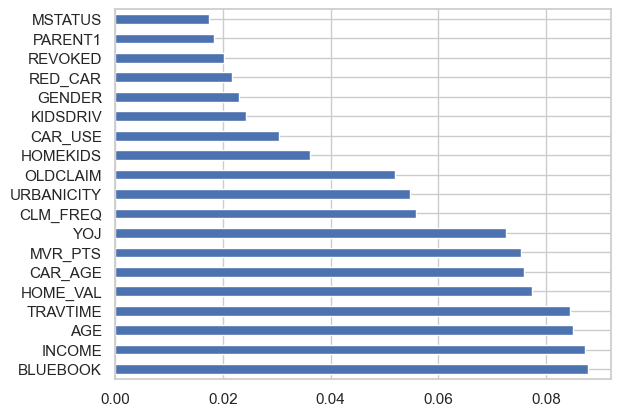

In [65]:
def decisiontree(table,col):
    x_1 = table.loc[:,['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','PARENT1','HOME_VAL','MSTATUS','GENDER',
                   'TRAVTIME','CAR_USE','BLUEBOOK','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','MVR_PTS','CAR_AGE',
                   'URBANICITY']]
    y_1 = table.loc[:,col]

    model = ExtraTreesClassifier()

    model.fit(x_1,y_1)

    print(model.feature_importances_)
    feat_importances = pd.Series(model.feature_importances_, index=x_1.columns)
    feat_importances.nlargest(30).plot(kind='barh')
    plt.show()



decisiontree(df1,"CLAIM_FLAG")

## COR

<Axes: >

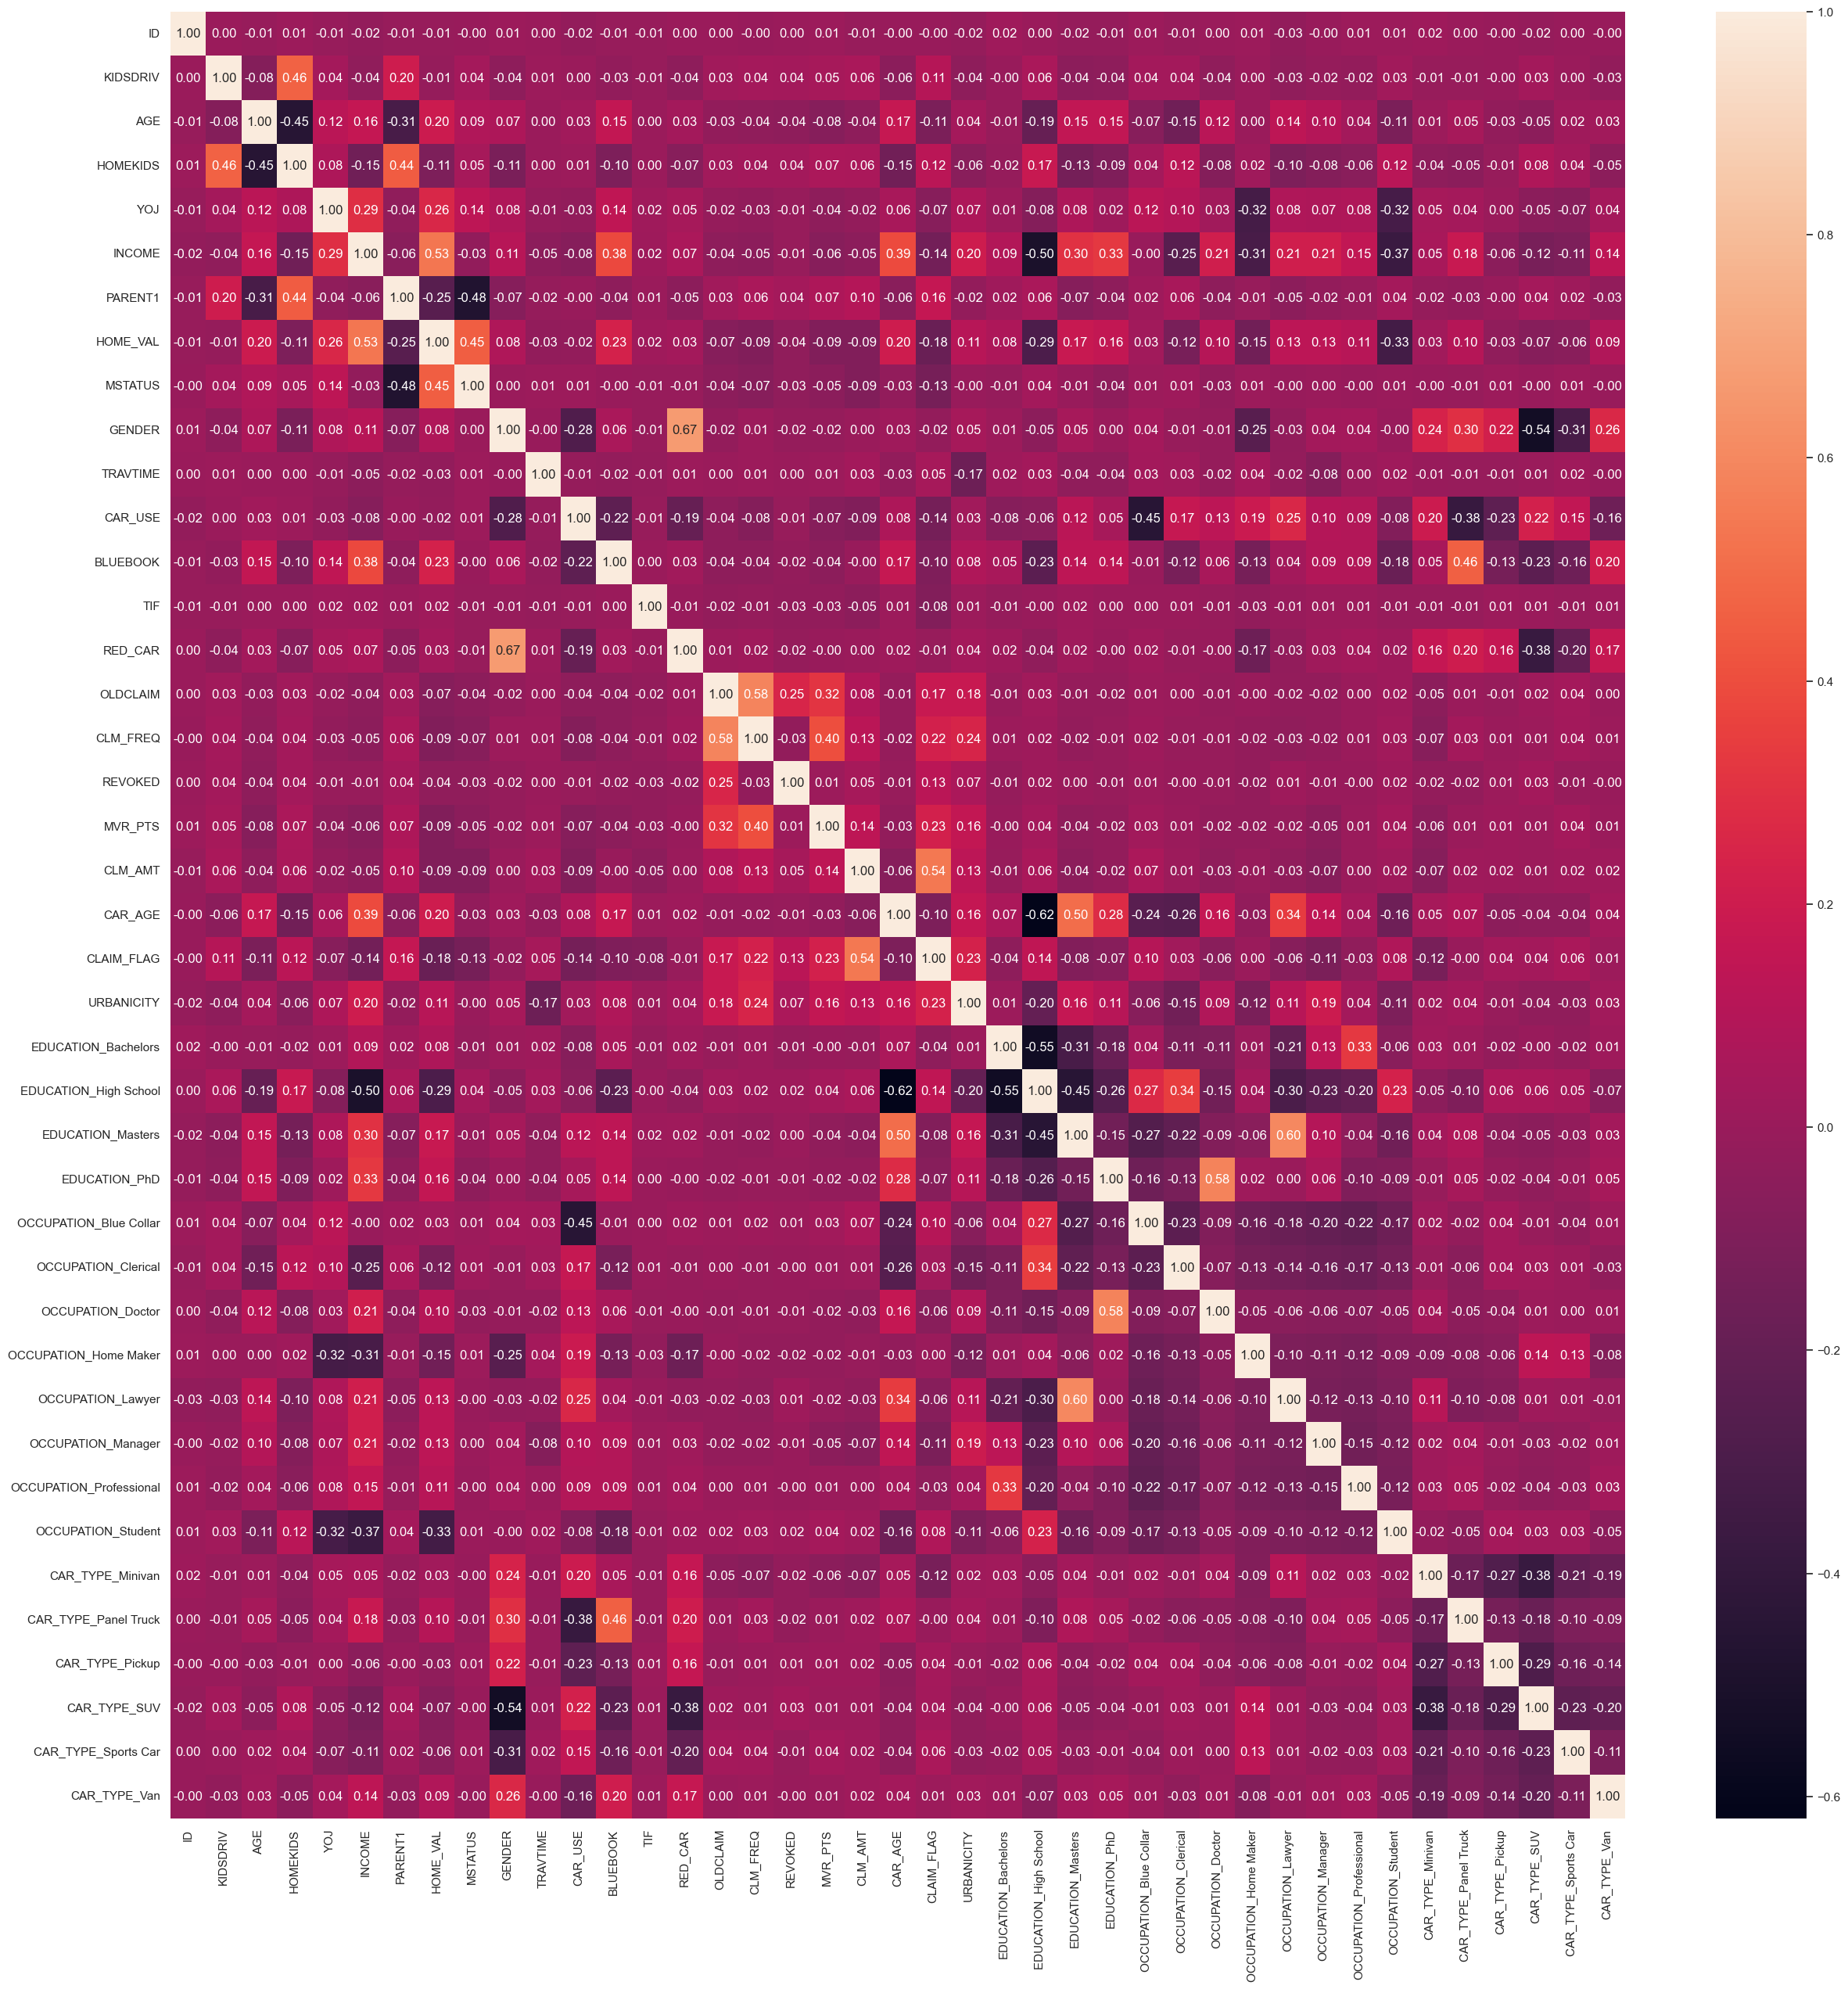

In [66]:
correlation = df1.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, fmt=".2f")

## Splitdataset


In [67]:
x = df1[[ 'CAR_AGE', 'HOMEKIDS', 'URBANICITY', 'OLDCLAIM', 'CLM_FREQ', 'CAR_USE', 'BLUEBOOK',
          'TRAVTIME', 'AGE', 'KIDSDRIV', 'INCOME', 'MVR_PTS', 'YOJ', 'HOME_VAL']]
y = df1['CLAIM_FLAG']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23330378)

In [69]:
y_test.value_counts()

CLAIM_FLAG
0.0    2172
1.0     728
Name: count, dtype: int64

## balance data

In [70]:
sm = SMOTE(random_state=23330378)

In [71]:
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)
print(y_train_balanced.value_counts())

CLAIM_FLAG
1.0    4963
0.0    4963
Name: count, dtype: int64


In [72]:
print(pd.Series(y_train).value_counts())

CLAIM_FLAG
0.0    4963
1.0    1803
Name: count, dtype: int64


## Scale data

In [73]:
scaler = StandardScaler()

In [74]:
x_train_scaled = scaler.fit_transform(x_train_balanced)
x_test_scaled = scaler.transform(x_test)

In [75]:
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

x_train_scaled shape: (9926, 14)
y_train_balanced shape: (9926,)
x_test_scaled shape: (2900, 14)
y_test shape: (2900,)


## Molde create

In [76]:
def evaluate_classification_model(classifier):
    y_pred_test = classifier.predict(x_test_scaled)
    y_pred_train = classifier.predict(x_train_scaled)
    y_pred_proba_test = classifier.predict_proba(x_test_scaled)
    y_pred_proba_train = classifier.predict_proba(x_train_scaled)
    
    print("Accuracy: ", round(accuracy_score(y_test, y_pred_test),3))
    print("Precision:", round(precision_score(y_test, y_pred_test),3))
    print("Recall: ", round(recall_score(y_test, y_pred_test),3))
    print("F1-Score: ", round(f1_score(y_test, y_pred_test),3))  
    score = cross_validate(classifier, x, y, cv=3, scoring='roc_auc', return_train_score=True)

### LR

In [77]:
model_LR = LogisticRegression(random_state=23330378, solver='newton-cg', class_weight={0:0.285,1:0.715})
model_LR.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_LR)

Accuracy:  0.55
Precision: 0.348
Recall:  0.909
F1-Score:  0.504


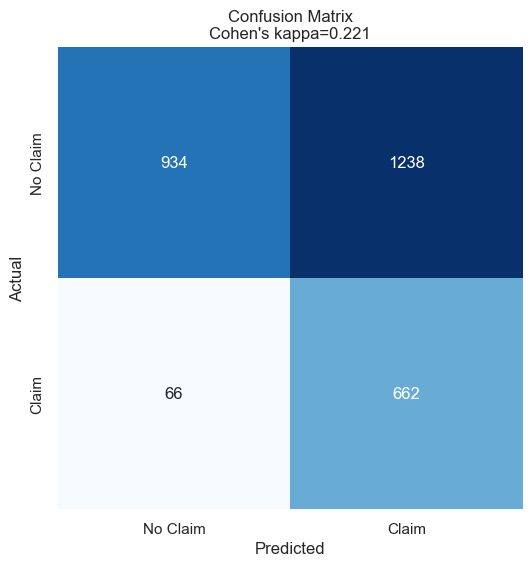

In [78]:
y_pred_LR = model_LR.predict(x_test_scaled)

cm_LR = confusion_matrix(y_test, y_pred_LR)
kappa_LR = cohen_kappa_score(y_test, y_pred_LR)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_LR))
plt.show()


### DT

In [79]:
model_DT = DecisionTreeClassifier(random_state=23330378)
model_DT.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_DT)


Accuracy:  0.693
Precision: 0.405
Recall:  0.473
F1-Score:  0.436


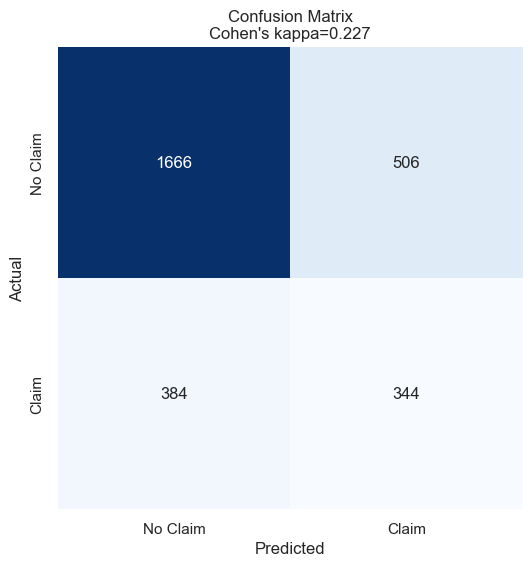

In [80]:
y_pred_DT = model_DT.predict(x_test_scaled)
cm_DT = confusion_matrix(y_test, y_pred_DT)

kappa_DT = cohen_kappa_score(y_test, y_pred_DT)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_DT))
plt.show()


### XGBOOST

In [81]:
model_XGB = xgb.XGBClassifier(random_state=23330378, n_estimators=150, nthread=-1, max_depth=6, learning_rate=0.015, subsample=0.9, min_child_weight=3, objective='binary:logistic')
model_XGB.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_XGB)


Accuracy:  0.749
Precision: 0.5
Recall:  0.536
F1-Score:  0.517


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.348")

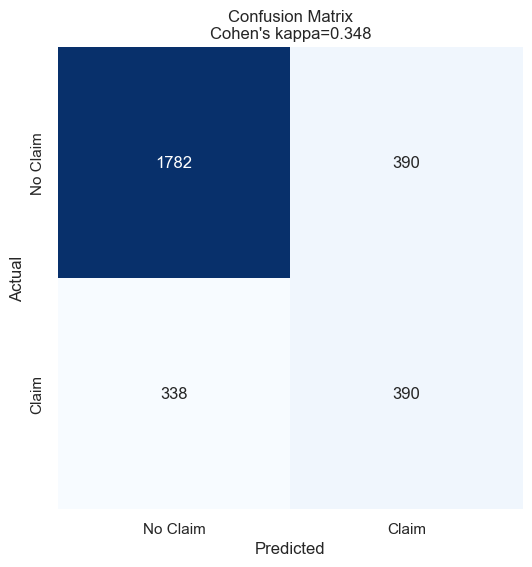

In [82]:
y_pred_XGB = model_XGB.predict(x_test_scaled)

cm_XGB = confusion_matrix(y_test, y_pred_XGB)
kappa_XGB = cohen_kappa_score(y_test, y_pred_XGB)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_XGB, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_XGB))


### RF

In [83]:
model_RF = RandomForestClassifier(random_state=2, criterion='entropy', n_estimators=100, max_depth=10)
model_RF.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_RF)


Accuracy:  0.745
Precision: 0.492
Recall:  0.538
F1-Score:  0.514


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.342")

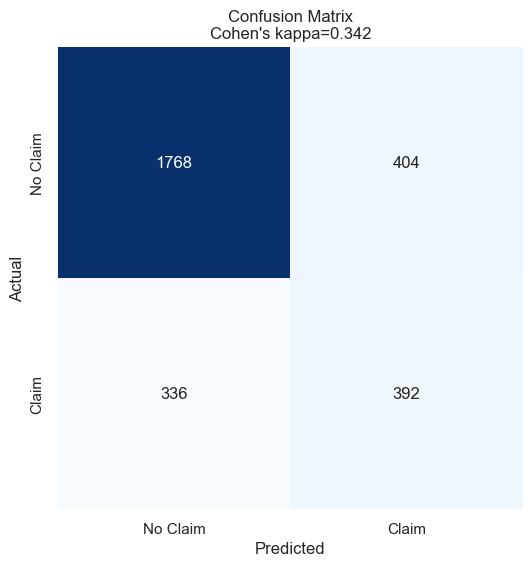

In [84]:
y_pred_RF = model_RF.predict(x_test_scaled)
cm_RF = confusion_matrix(y_test, y_pred_RF)

kappa_RF = cohen_kappa_score(y_test, y_pred_RF)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_RF))


### GB

In [85]:
model_GB = GradientBoostingClassifier()
model_GB.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_GB)

Accuracy:  0.766
Precision: 0.536
Recall:  0.501
F1-Score:  0.518


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.364")

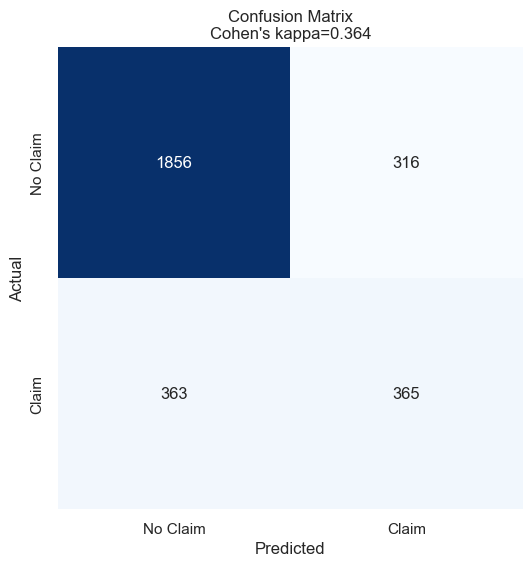

In [86]:
y_pred_GB = model_GB.predict(x_test_scaled)

cm_GB = confusion_matrix(y_test, y_pred_GB)

kappa_GB = cohen_kappa_score(y_test, y_pred_GB)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_GB))


### ADABC

In [87]:
model_AdaBoost = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=23330378)
model_AdaBoost.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_AdaBoost)

Accuracy:  0.733
Precision: 0.474
Recall:  0.574
F1-Score:  0.52


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.337")

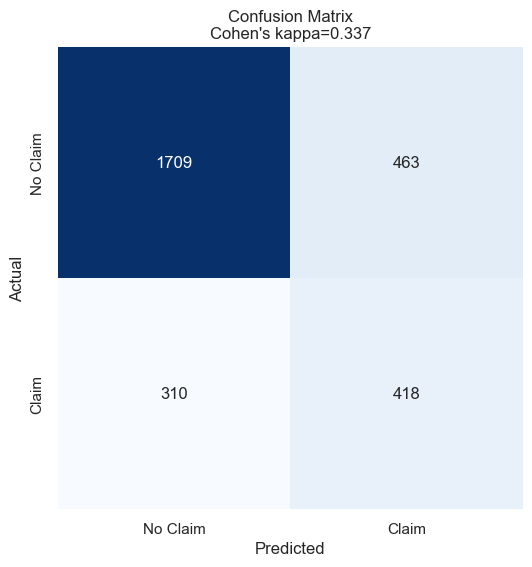

In [88]:
y_pred_AdaBoost = model_AdaBoost.predict(x_test_scaled)
cm_AdaBoost = confusion_matrix(y_test, y_pred_AdaBoost)

kappa_AdaBoost = cohen_kappa_score(y_test, y_pred_AdaBoost)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_AdaBoost, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_AdaBoost))


###  MLP

In [89]:
model_MLP = MLPClassifier(random_state=23330378)
model_MLP.fit(x_train_scaled, y_train_balanced)

evaluate_classification_model(model_MLP)

Accuracy:  0.706
Precision: 0.435
Recall:  0.577
F1-Score:  0.496


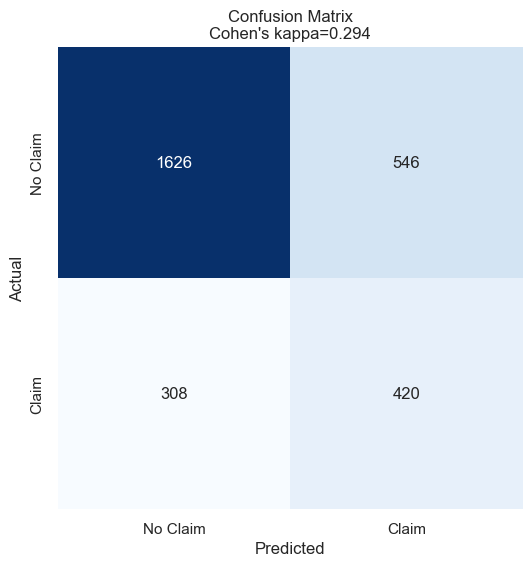

In [90]:
y_pred_MLP = model_MLP.predict(x_test_scaled)
cm_MLP = confusion_matrix(y_test, y_pred_MLP)

kappa_MLP = cohen_kappa_score(y_test, y_pred_MLP)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_MLP, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_MLP))
plt.show()


### CBC

In [91]:
model_CatBoost = CatBoostClassifier(random_state=23330378)
model_CatBoost.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_CatBoost)

Learning rate set to 0.027451
0:	learn: 0.6804669	total: 136ms	remaining: 2m 16s
1:	learn: 0.6660732	total: 140ms	remaining: 1m 9s
2:	learn: 0.6557099	total: 144ms	remaining: 47.8s
3:	learn: 0.6447329	total: 148ms	remaining: 36.8s
4:	learn: 0.6343884	total: 152ms	remaining: 30.3s
5:	learn: 0.6231515	total: 156ms	remaining: 25.8s
6:	learn: 0.6131619	total: 160ms	remaining: 22.7s
7:	learn: 0.6052671	total: 164ms	remaining: 20.3s
8:	learn: 0.5981030	total: 168ms	remaining: 18.5s
9:	learn: 0.5903035	total: 172ms	remaining: 17.1s
10:	learn: 0.5828882	total: 176ms	remaining: 15.8s
11:	learn: 0.5754573	total: 180ms	remaining: 14.8s
12:	learn: 0.5665498	total: 184ms	remaining: 14s
13:	learn: 0.5603206	total: 188ms	remaining: 13.2s
14:	learn: 0.5542788	total: 192ms	remaining: 12.6s
15:	learn: 0.5493781	total: 196ms	remaining: 12.1s
16:	learn: 0.5435276	total: 200ms	remaining: 11.6s
17:	learn: 0.5387109	total: 204ms	remaining: 11.1s
18:	learn: 0.5342658	total: 208ms	remaining: 10.7s
19:	learn: 0

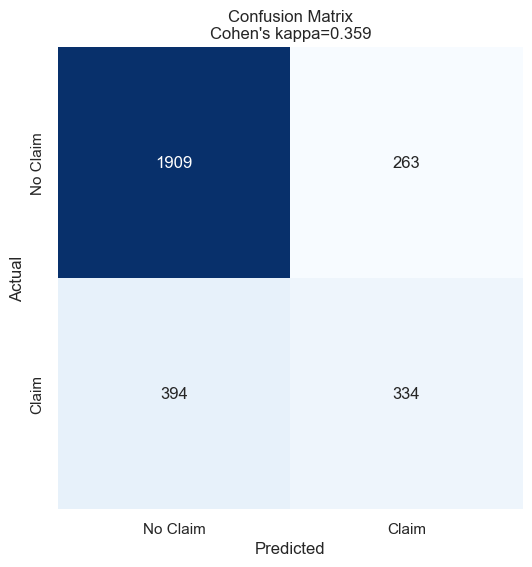

In [92]:
y_pred_CatBoost = model_CatBoost.predict(x_test_scaled)
cm_CatBoost = confusion_matrix(y_test, y_pred_CatBoost)

kappa_CatBoost = cohen_kappa_score(y_test, y_pred_CatBoost)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_CatBoost, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_CatBoost))
plt.show()

### LGBM

In [93]:
model_LGBM = LGBMClassifier(random_state=23330378)
model_LGBM.fit(x_train_scaled, y_train_balanced)
evaluate_classification_model(model_LGBM)

[LightGBM] [Info] Number of positive: 4963, number of negative: 4963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 9926, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy:  0.772
Precision: 0.562
Recall:  0.418
F1-Score:  0.479
[LightGBM] [Info] Number of positive: 1688, number of negative: 4756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1350
[LightGBM] [Info] Number of data points in the train set: 6444, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261949 -> initscore=-1.035863
[LightGBM] [Info] Start training from score -1.035863
[LightG

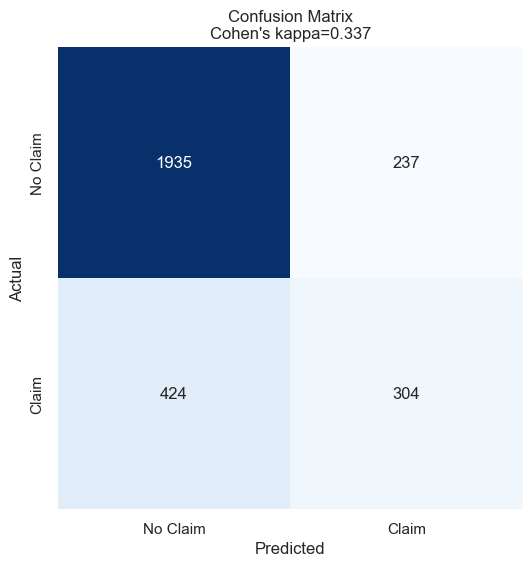

In [94]:
y_pred_LGBM = model_LGBM.predict(x_test_scaled)

cm_LGBM = confusion_matrix(y_test, y_pred_LGBM)
kappa_LGBM = cohen_kappa_score(y_test, y_pred_LGBM)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_LGBM, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_LGBM))
plt.show()


### GaussianNB

In [95]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train_scaled, y_train_balanced)

evaluate_classification_model(model_GaussianNB)

Accuracy:  0.705
Precision: 0.444
Recall:  0.694
F1-Score:  0.541


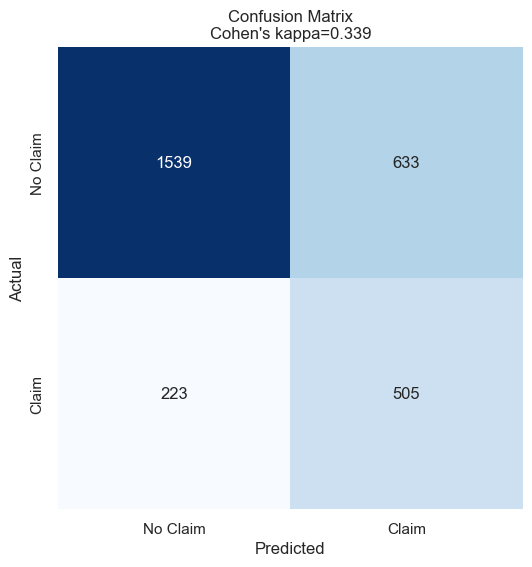

In [96]:
y_pred_GaussianNB = model_GaussianNB.predict(x_test_scaled)

cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)

kappa_GaussianNB = cohen_kappa_score(y_test, y_pred_GaussianNB)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_GaussianNB, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_GaussianNB))
plt.show()


### Cohen's Kappa

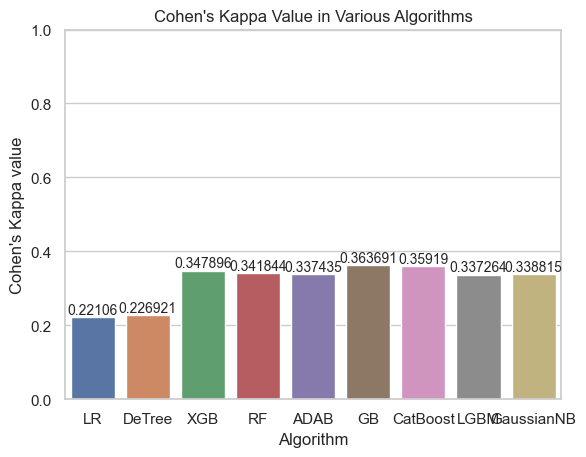

In [97]:
kappa_values = [kappa_LR, kappa_DT, kappa_XGB, kappa_RF, kappa_AdaBoost, kappa_GB, kappa_CatBoost, kappa_LGBM, kappa_GaussianNB]
algorithm_names = ['LR', 'DeTree', 'XGB', 'RF', 'ADAB', 'GB', 'CatBoost', 'LGBM', 'GaussianNB']

fig, ax = plt.subplots()
ax = sns.barplot(x=algorithm_names, y=kappa_values, ax=ax)

plt.xlabel('Algorithm')
plt.ylabel("Cohen's Kappa value" )
plt.title("Cohen's Kappa Value in Various Algorithms")

plt.ylim(0, 1)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()


### ROC PLOT

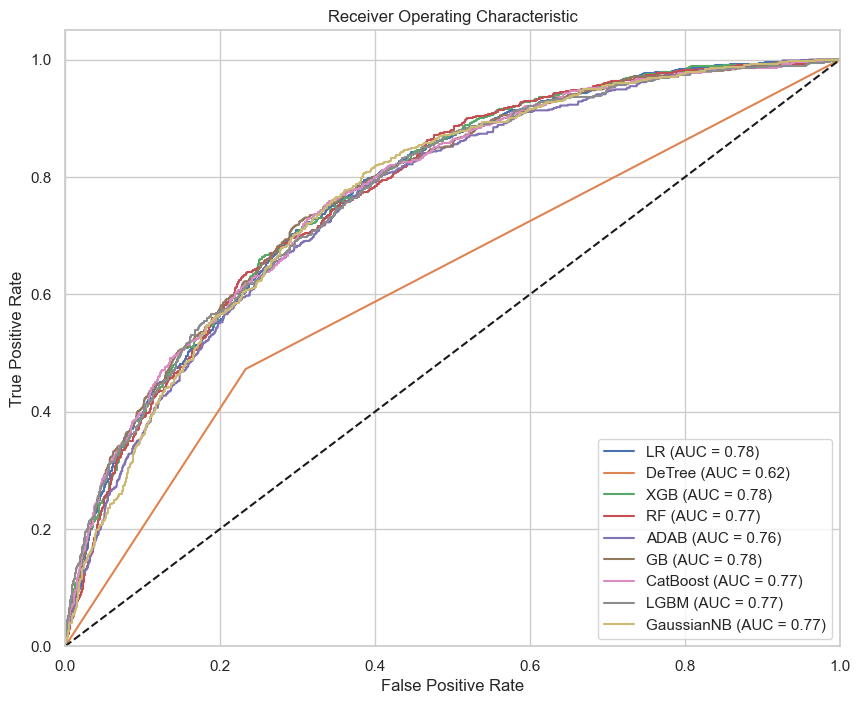

In [98]:
y_pred_proba_LR = model_LR.predict_proba(x_test_scaled)[:, 1]
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_pred_proba_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

y_pred_proba_DT = model_DT.predict_proba(x_test_scaled)[:, 1]
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred_proba_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

y_pred_proba_XGB = model_XGB.predict_proba(x_test_scaled)[:, 1]
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_pred_proba_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

y_pred_proba_RF = model_RF.predict_proba(x_test_scaled)[:, 1]
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_proba_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

y_pred_proba_AdaBoost = model_AdaBoost.predict_proba(x_test_scaled)[:, 1]
fpr_AdaBoost, tpr_AdaBoost, _ = roc_curve(y_test, y_pred_proba_AdaBoost)
roc_auc_AdaBoost = auc(fpr_AdaBoost, tpr_AdaBoost)

y_pred_proba_GB = model_GB.predict_proba(x_test_scaled)[:, 1]
fpr_GB, tpr_GB, _ = roc_curve(y_test, y_pred_proba_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)

y_pred_proba_CatBoost = model_CatBoost.predict_proba(x_test_scaled)[:, 1]
fpr_CatBoost, tpr_CatBoost, _ = roc_curve(y_test, y_pred_proba_CatBoost)
roc_auc_CatBoost = auc(fpr_CatBoost, tpr_CatBoost)

y_pred_proba_LGBM = model_LGBM.predict_proba(x_test_scaled)[:, 1]
fpr_LGBM, tpr_LGBM, _ = roc_curve(y_test, y_pred_proba_LGBM)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)

y_pred_proba_GaussianNB = model_GaussianNB.predict_proba(x_test_scaled)[:, 1]
fpr_GaussianNB, tpr_GaussianNB, _ = roc_curve(y_test, y_pred_proba_GaussianNB)
roc_auc_GaussianNB = auc(fpr_GaussianNB, tpr_GaussianNB)


plt.figure(figsize=(10, 8))
plt.plot(fpr_LR, tpr_LR, label='LR (AUC = %0.2f)' % roc_auc_LR)
plt.plot(fpr_DT, tpr_DT, label='DeTree (AUC = %0.2f)' % roc_auc_DT)
plt.plot(fpr_XGB, tpr_XGB, label='XGB (AUC = %0.2f)' % roc_auc_XGB)
plt.plot(fpr_RF, tpr_RF, label='RF (AUC = %0.2f)' % roc_auc_RF)
plt.plot(fpr_AdaBoost, tpr_AdaBoost, label='ADAB (AUC = %0.2f)' % roc_auc_AdaBoost)
plt.plot(fpr_GB, tpr_GB, label='GB (AUC = %0.2f)' % roc_auc_GB)
plt.plot(fpr_CatBoost, tpr_CatBoost, label='CatBoost (AUC = %0.2f)' % roc_auc_CatBoost)
plt.plot(fpr_LGBM, tpr_LGBM, label='LGBM (AUC = %0.2f)' % roc_auc_LGBM)
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='GaussianNB (AUC = %0.2f)' % roc_auc_GaussianNB)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## feature Importance

### GB


Model Report
Accuracy : 0.8007
AUC Score (Train): 0.833801
CV Score : Mean - 0.7967571 | Std - 0.01373629 | Min - 0.7825665 | Max - 0.8209406


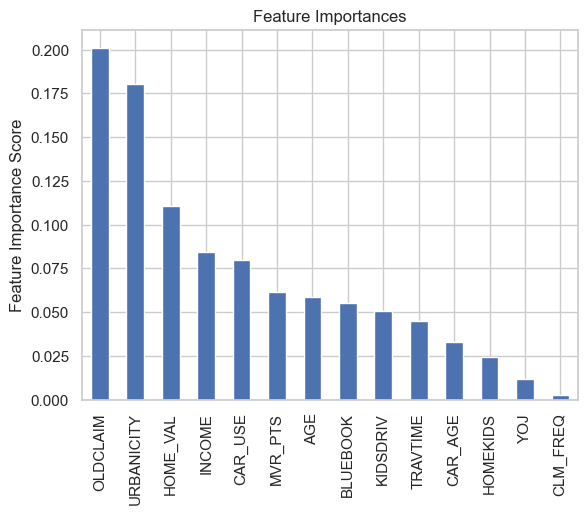

In [99]:
predictors = ['CAR_AGE', 'HOMEKIDS', 'URBANICITY', 'OLDCLAIM', 'CLM_FREQ', 'CAR_USE', 'BLUEBOOK',
              'TRAVTIME', 'AGE', 'KIDSDRIV', 'INCOME', 'MVR_PTS', 'YOJ', 'HOME_VAL']
gbm_model = GradientBoostingClassifier(random_state=23330378)
print_model_report_and_feature_importance(gbm_model, df1, predictors)

### LR

In [100]:
lr_model = LogisticRegression(random_state=23330378)
print_model_report_and_coefficients(lr_model, df1, predictors)


Model Report
Accuracy : 0.7393
AUC Score (Train): 0.692973
CV Score : Mean - 0.6838586 | Std - 0.004786686 | Min - 0.6768089 | Max - 0.6916761

Coefficients:
       Feature  Coefficient
0      CAR_AGE    -0.024615
1     HOMEKIDS     0.009459
2   URBANICITY     0.012516
3     OLDCLAIM     0.000062
4     CLM_FREQ     0.016841
5      CAR_USE    -0.008985
6     BLUEBOOK    -0.000010
7     TRAVTIME     0.001960
8          AGE    -0.016005
9     KIDSDRIV     0.005960
10      INCOME    -0.000002
11     MVR_PTS     0.041153
12         YOJ     0.001046
13    HOME_VAL    -0.000003


### XGB


Model Report
Accuracy : 0.9351
AUC Score (Train): 0.980318
CV Score : Mean - 0.7691943 | Std - 0.01430635 | Min - 0.7515643 | Max - 0.7924818


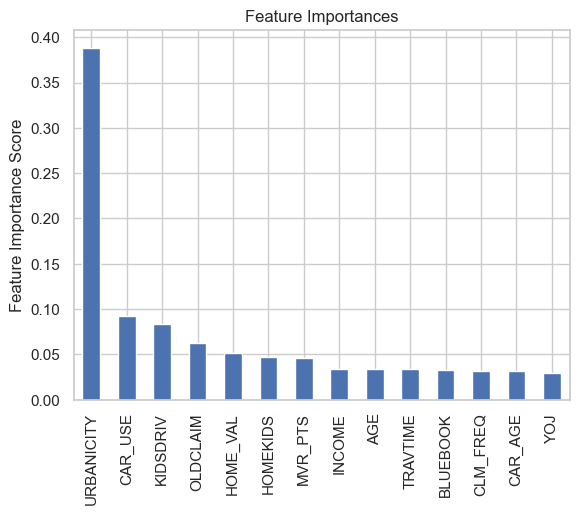

In [101]:
xgb_model = xgb.XGBClassifier(random_state=23330378)
print_model_report_and_feature_importance(xgb_model, df1, predictors)

### RF


Model Report
Accuracy : 0.9998
AUC Score (Train): 1.000000
CV Score : Mean - 0.7852265 | Std - 0.01400572 | Min - 0.7666115 | Max - 0.8076329


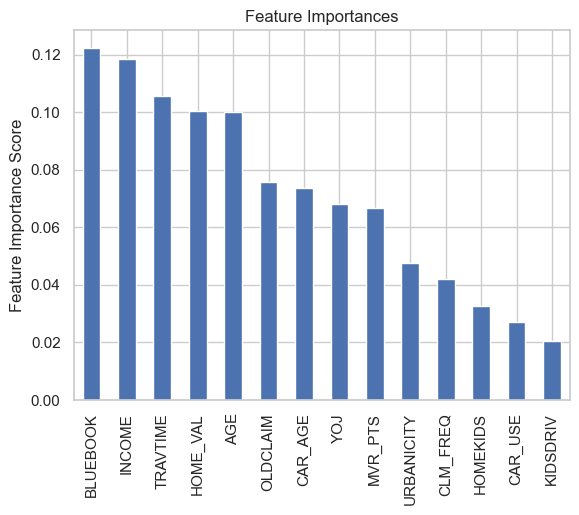

In [102]:
rf_model = RandomForestClassifier(random_state=23330378)
print_model_report_and_feature_importance(rf_model, df1, predictors)

### ADAB


Model Report
Accuracy : 0.782
AUC Score (Train): 0.806571
CV Score : Mean - 0.7931075 | Std - 0.01235086 | Min - 0.7795861 | Max - 0.8148199


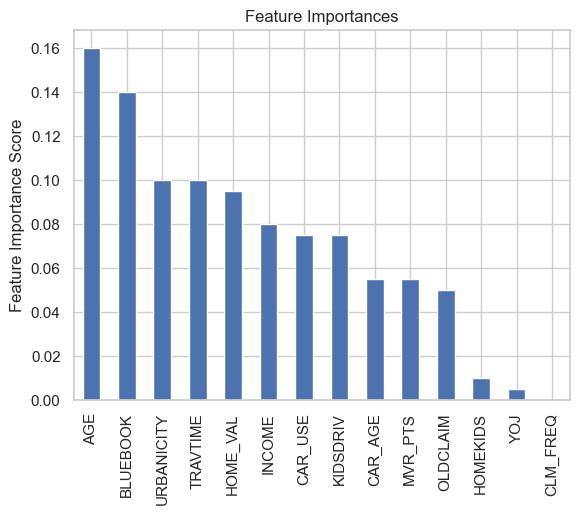

In [103]:
ada_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=23330378)
print_model_report_and_feature_importance(ada_model, df1, predictors)

### CatBoost


Model Report
Accuracy : 0.8713
AUC Score (Train): 0.918967
CV Score : Mean - 0.7963525 | Std - 0.01362574 | Min - 0.7818124 | Max - 0.8182621


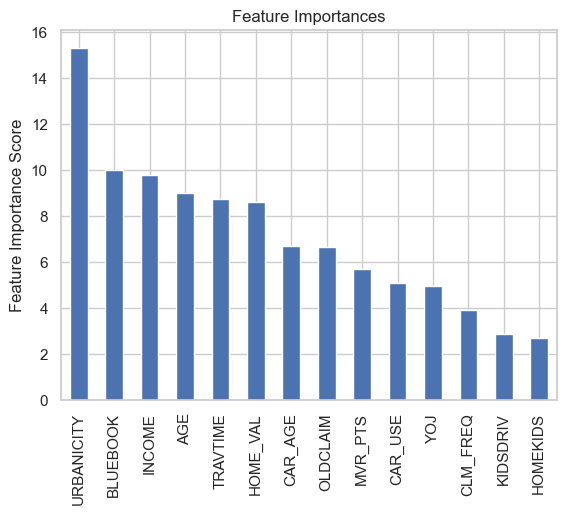

In [104]:
catboost_model = CatBoostClassifier(random_state=23330378, verbose=False)
print_model_report_and_feature_importance(catboost_model, df1, predictors)

### LGBM

[LightGBM] [Info] Number of positive: 2531, number of negative: 7135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1366
[LightGBM] [Info] Number of data points in the train set: 9666, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261846 -> initscore=-1.036398
[LightGBM] [Info] Start training from score -1.036398

Model Report
Accuracy : 0.867
AUC Score (Train): 0.924440
[LightGBM] [Info] Number of positive: 2024, number of negative: 5708
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 7732, number of used features: 14
[LightGBM] [Info] [binary:Boo

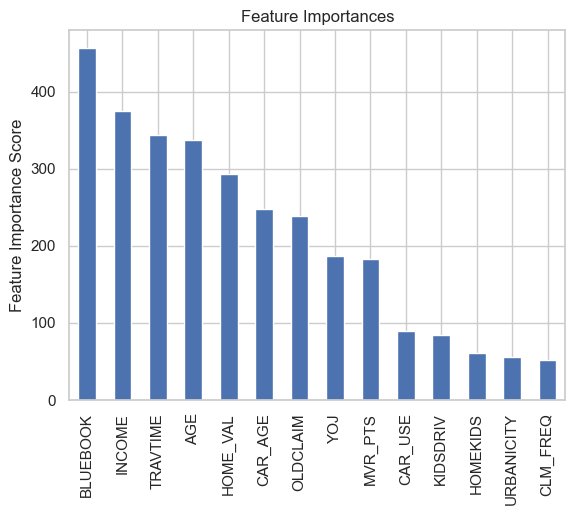

In [105]:
lgbm_model = LGBMClassifier(random_state=23330378)
print_model_report_and_feature_importance(lgbm_model, df1, predictors)

### model auc barchart

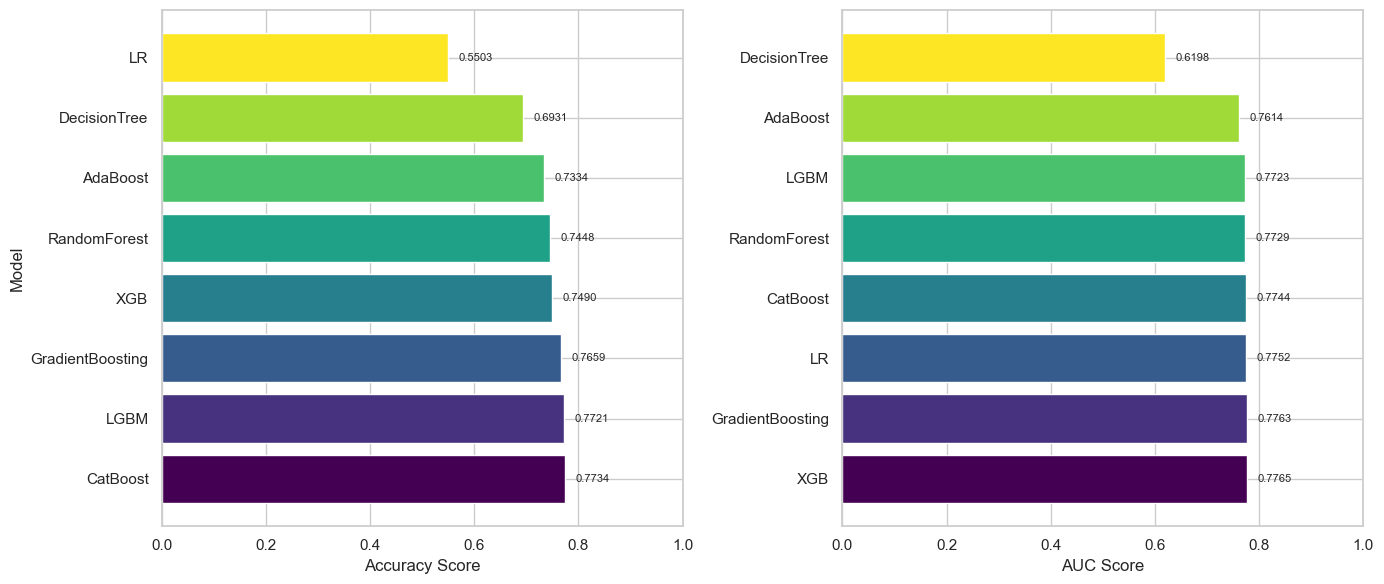

In [106]:
models = ['LR', 'DecisionTree', 'XGB', 'RandomForest', 'AdaBoost', 'GradientBoosting', 'CatBoost', 'LGBM']

acc_scores = []
for model in [model_LR, model_DT, model_XGB, model_RF, model_AdaBoost, model_GB, model_CatBoost, model_LGBM]:
    y_pred = model.predict(x_test_scaled)  
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)

sorted_indices_acc = np.argsort(acc_scores)[::-1]
sorted_models_acc = [models[i] for i in sorted_indices_acc]
sorted_scores_acc = [acc_scores[i] for i in sorted_indices_acc]

auc_scores = []
for model in [model_LR, model_DT, model_XGB, model_RF, model_AdaBoost, model_GB, model_CatBoost, model_LGBM]:
    y_pred = model.predict_proba(x_test_scaled)[:, 1]  
    auc = roc_auc_score(y_test, y_pred)
    auc_scores.append(auc)

sorted_indices_auc = np.argsort(auc_scores)[::-1]
sorted_models_auc = [models[i] for i in sorted_indices_auc]
sorted_scores_auc = [auc_scores[i] for i in sorted_indices_auc]

colors_acc = plt.cm.viridis(np.linspace(0, 1, len(models)))
colors_auc = plt.cm.viridis(np.linspace(0, 1, len(models)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

bars_acc = ax1.barh(np.arange(len(sorted_models_acc)), sorted_scores_acc, color=colors_acc, label='Accuracy')
ax1.set_xlabel('Accuracy Score')
ax1.set_ylabel('Model')
ax1.set_yticks(np.arange(len(sorted_models_acc)))
ax1.set_yticklabels(sorted_models_acc)
ax1.set_xlim(0, 1)

for bar, score in zip(bars_acc, sorted_scores_acc):
    ax1.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, '{:.4f}'.format(score), 
             va='center', ha='left', fontsize=8)

bars_auc = ax2.barh(np.arange(len(sorted_models_auc)), sorted_scores_auc, color=colors_auc, label='AUC')
ax2.set_xlabel('AUC Score')
ax2.set_yticks(np.arange(len(sorted_models_auc)))
ax2.set_yticklabels(sorted_models_auc)
ax2.set_xlim(0, 1)

for bar, score in zip(bars_auc, sorted_scores_auc):
    ax2.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, '{:.4f}'.format(score), 
             va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()


### KFold

In [107]:
dataset = df1
x = df1[[ 'CAR_AGE', 'HOMEKIDS', 'URBANICITY', 'OLDCLAIM', 'CLM_FREQ', 'CAR_USE', 'BLUEBOOK',
          'TRAVTIME', 'AGE', 'KIDSDRIV', 'INCOME', 'MVR_PTS', 'YOJ', 'HOME_VAL']]
y = df1['CLAIM_FLAG']
kf = KFold(n_splits=10, random_state=23330378, shuffle=True)
kf.get_n_splits(x)

10

In [108]:
for train_index, test_index in kf.split(x):    
    x_train1, x_test1 = x.iloc[train_index], x.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    

In [109]:
def evaluate_classification_model_with_data(classifier):
    classifier.fit(x_train1, y_train1)  # Fit the classifier on the training data
    
    y_pred_test = classifier.predict(x_test1)
    y_pred_train = classifier.predict(x_train1)
    y_pred_proba_test = classifier.predict_proba(x_test1)
    y_pred_proba_train = classifier.predict_proba(x_train1)
    
    print("Accuracy: ", round(accuracy_score(y_test1, y_pred_test), 3))
    print("Precision:", round(precision_score(y_test1, y_pred_test), 3))
    print("Recall: ", round(recall_score(y_test1, y_pred_test), 3))
    print("F1-Score: ", round(f1_score(y_test1, y_pred_test), 3))  
    score = cross_validate(classifier, x_train1, y_train1, cv=5, scoring='roc_auc', return_train_score=True)

    return classifier, y_pred_train, y_pred_test, y_pred_proba_train, y_pred_proba_test, score


#### LR

In [110]:
model_LRkf = LogisticRegression(C=0.1, penalty='l2', max_iter=100,random_state=23330378, solver='newton-cg', class_weight={0:0.285,1:0.715})
model_LRkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_LRkf)

Accuracy:  0.741
Precision: 0.5
Recall:  0.716
F1-Score:  0.589


(LogisticRegression(C=0.1, class_weight={0: 0.285, 1: 0.715},
                    random_state=23330378, solver='newton-cg'),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,

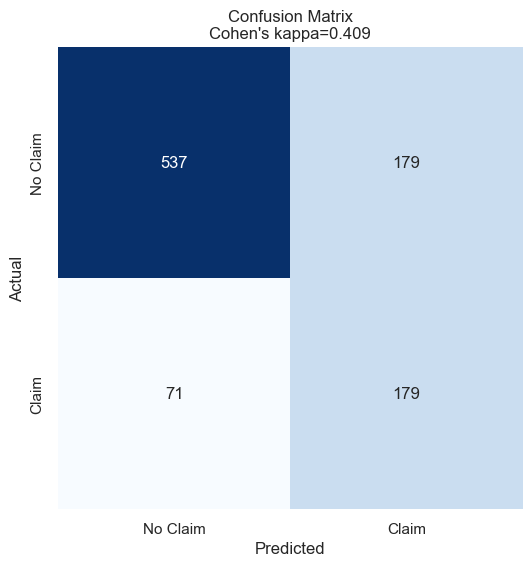

In [111]:
y_pred_LR = model_LRkf.predict(x_test1)

cm_LRkf = confusion_matrix(y_test1, y_pred_LR)
kappa_LRkf = cohen_kappa_score(y_test1, y_pred_LR)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_LRkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_LRkf))
plt.show()


#### DT

In [112]:
model_DTkf = DecisionTreeClassifier(random_state=23330378)
model_DTkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_DTkf)

Accuracy:  0.712
Precision: 0.445
Recall:  0.452
F1-Score:  0.448


(DecisionTreeClassifier(random_state=23330378),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
 

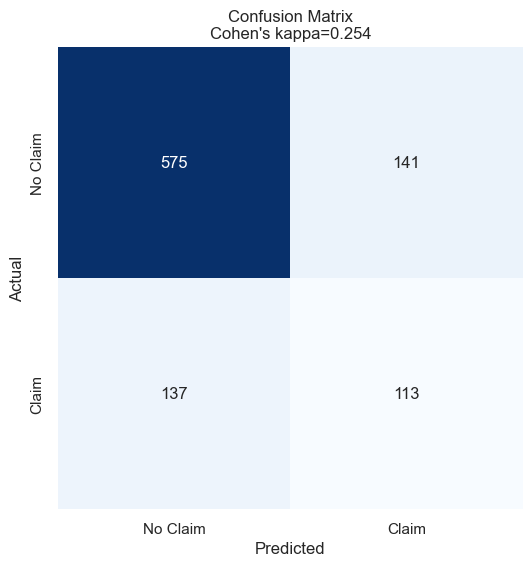

In [113]:
y_pred_DTkf = model_DTkf.predict(x_test1)

cm_DTkf = confusion_matrix(y_test1, y_pred_DTkf)
kappa_DTkf = cohen_kappa_score(y_test1, y_pred_DTkf)

fig_DTkf, ax_DTkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_DTkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_DTkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_DTkf))
plt.show()

#### XGBOOST

In [114]:
model_XGBkf = xgb.XGBClassifier(random_state=23330378, n_estimators=150, nthread=-1, max_depth=6, learning_rate=0.015, subsample=0.9, min_child_weight=3, objective='binary:logistic')
model_XGBkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_XGBkf)

Accuracy:  0.785
Precision: 0.688
Recall:  0.308
F1-Score:  0.425


(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.015, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=150, n_jobs=None, nthread=-1,
               num_parallel_tree=None, ...),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.316")

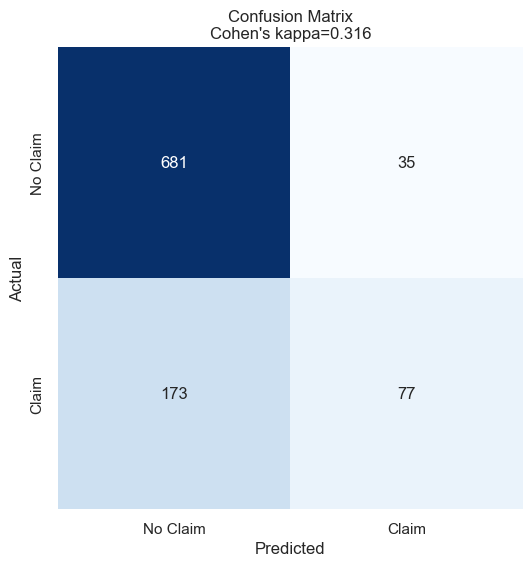

In [115]:
y_pred_XGBkf = model_XGBkf.predict(x_test1)

cm_XGBkf = confusion_matrix(y_test1, y_pred_XGBkf)

kappa_XGBkf = cohen_kappa_score(y_test1, y_pred_XGBkf)
fig_XGBkf, ax_XGBkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_XGBkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_XGBkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_XGBkf))

#### RF

In [116]:
model_RFkf = RandomForestClassifier(random_state=23330378, criterion='entropy', n_estimators=100, max_features=None, max_depth=10)
model_RFkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_RFkf)

Accuracy:  0.784
Precision: 0.65
Recall:  0.356
F1-Score:  0.46


(RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                        random_state=23330378),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,

Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.339")

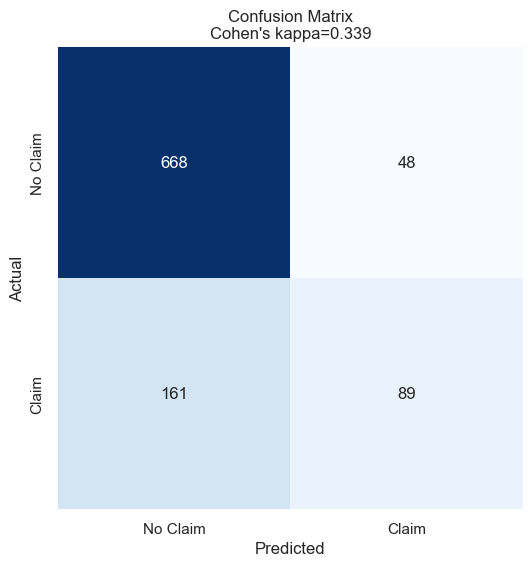

In [117]:
y_pred_RFkf = model_RFkf.predict(x_test1)

cm_RFkf = confusion_matrix(y_test1, y_pred_RFkf)

kappa_RFkf = cohen_kappa_score(y_test1, y_pred_RFkf)
fig_RFkf, ax_RFkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_RFkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_RFkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_RFkf))

####  GB

In [118]:
model_GBkf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=21, min_samples_split=50, min_samples_leaf=30,
                                        random_state=10, max_features=11, subsample=0.9)
model_GBkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_GBkf)

Accuracy:  0.795
Precision: 0.659
Recall:  0.432
F1-Score:  0.522


(GradientBoostingClassifier(max_depth=21, max_features=11, min_samples_leaf=30,
                            min_samples_split=50, n_estimators=80,
                            random_state=10, subsample=0.9),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0

Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.398")

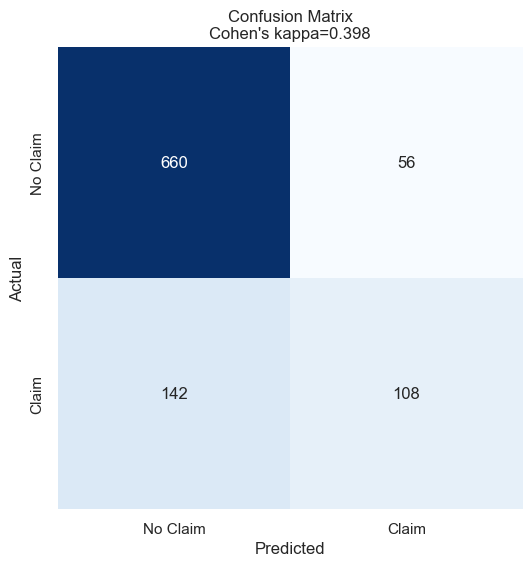

In [119]:
y_pred_GBkf = model_GBkf.predict(x_test1)

cm_GBkf = confusion_matrix(y_test1, y_pred_GBkf)

kappa_GBkf = cohen_kappa_score(y_test1, y_pred_GBkf)
fig_GBkf, ax_GBkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_GBkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_GBkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_GBkf))

In [120]:
model_CBkf = CatBoostClassifier(random_state=23330378)
model_CBkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_CBkf)

Learning rate set to 0.025948
0:	learn: 0.6804710	total: 6.12ms	remaining: 6.12s
1:	learn: 0.6672891	total: 12.7ms	remaining: 6.33s
2:	learn: 0.6557628	total: 18.4ms	remaining: 6.13s
3:	learn: 0.6470146	total: 21.8ms	remaining: 5.43s
4:	learn: 0.6370112	total: 27.8ms	remaining: 5.54s
5:	learn: 0.6279920	total: 32.9ms	remaining: 5.44s
6:	learn: 0.6187976	total: 38.7ms	remaining: 5.49s
7:	learn: 0.6101577	total: 44ms	remaining: 5.45s
8:	learn: 0.6027070	total: 49.6ms	remaining: 5.47s
9:	learn: 0.5969927	total: 54.2ms	remaining: 5.36s
10:	learn: 0.5899202	total: 59.6ms	remaining: 5.35s
11:	learn: 0.5832896	total: 65.6ms	remaining: 5.4s
12:	learn: 0.5769768	total: 70.8ms	remaining: 5.38s
13:	learn: 0.5710418	total: 75.5ms	remaining: 5.32s
14:	learn: 0.5653035	total: 80.7ms	remaining: 5.3s
15:	learn: 0.5613260	total: 85.9ms	remaining: 5.28s
16:	learn: 0.5557978	total: 91.7ms	remaining: 5.3s
17:	learn: 0.5519874	total: 101ms	remaining: 5.5s
18:	learn: 0.5484640	total: 110ms	remaining: 5.68s


(<catboost.core.CatBoostClassifier at 0x17ddc1c9190>,
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,

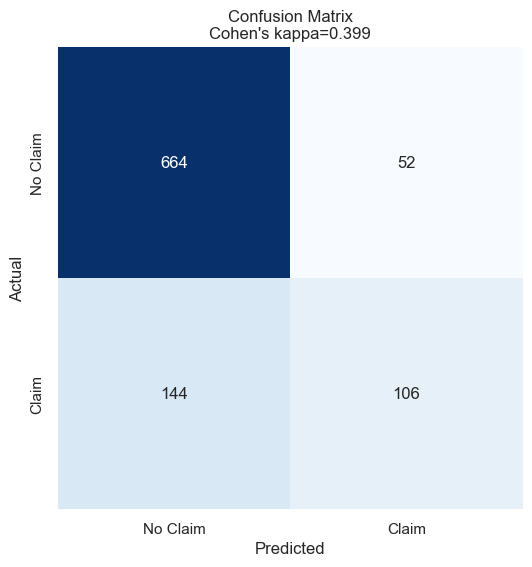

In [121]:
y_pred_CBkf = model_CBkf.predict(x_test1)
cm_CBkf = confusion_matrix(y_test1, y_pred_CBkf)

kappa_CBkf = cohen_kappa_score(y_test1, y_pred_CBkf)

fig_CBkf, ax_CBkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_CBkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_CBkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_CBkf))
plt.show()

#### LGBM

In [122]:
model_LGBMkf = LGBMClassifier(random_state=23330378)
model_LGBMkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_LGBMkf)

[LightGBM] [Info] Number of positive: 2281, number of negative: 6419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1362
[LightGBM] [Info] Number of data points in the train set: 8700, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262184 -> initscore=-1.034648
[LightGBM] [Info] Start training from score -1.034648
[LightGBM] [Info] Number of positive: 2281, number of negative: 6419
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1362
[LightGBM] [Info] Number of data points in the train set: 8700, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262184 -> initscore=-1.034648
[LightGB

(LGBMClassifier(random_state=23330378),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0

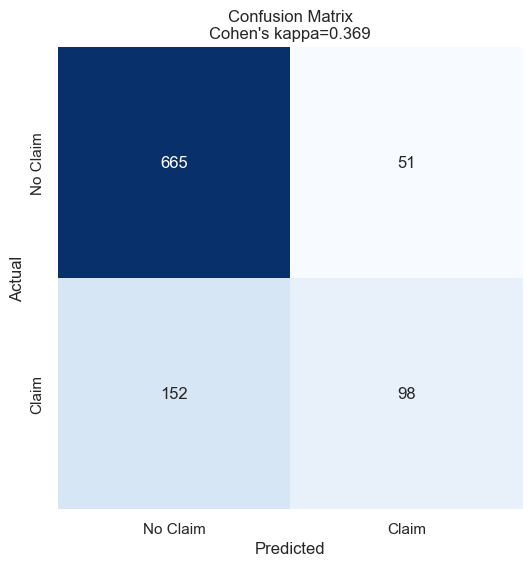

In [123]:
y_pred_LGBMkf = model_LGBMkf.predict(x_test1)

cm_LGBMkf = confusion_matrix(y_test1, y_pred_LGBMkf)
kappa_LGBMkf = cohen_kappa_score(y_test1, y_pred_LGBMkf)

fig_LGBMkf, ax_LGBMkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_LGBMkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_LGBMkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_LGBMkf))
plt.show()


#### GaussianNB

In [124]:
model_NBkf = GaussianNB()
model_NBkf.fit(x_train1, y_train1)
evaluate_classification_model_with_data(model_NBkf)

Accuracy:  0.751
Precision: 0.549
Recall:  0.2
F1-Score:  0.293


(GaussianNB(),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0.

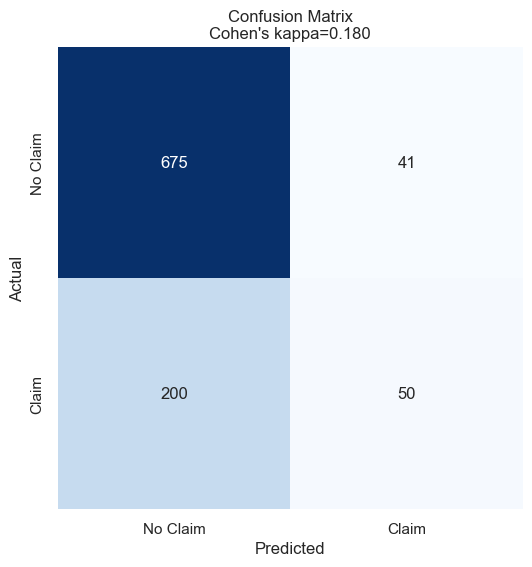

In [125]:
y_pred_NBkf = model_NBkf.predict(x_test1)

cm_NBkf = confusion_matrix(y_test1, y_pred_NBkf)

kappa_NBkf = cohen_kappa_score(y_test1, y_pred_NBkf)

fig_NBkf, ax_NBkf = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_NBkf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax_NBkf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa_NBkf))
plt.show()


#### Cohen's Kappa

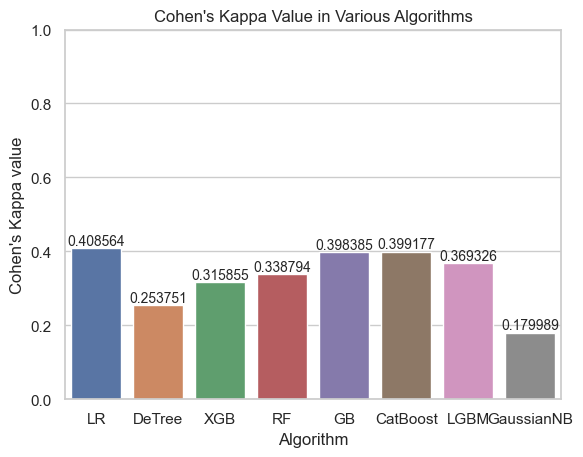

In [126]:
kappa_values = [kappa_LRkf, kappa_DTkf, kappa_XGBkf, kappa_RFkf, kappa_GBkf, kappa_CBkf, kappa_LGBMkf, kappa_NBkf]
algorithm_names = ['LR', 'DeTree', 'XGB', 'RF', 'GB', 'CatBoost', 'LGBM', 'GaussianNB']

fig, ax = plt.subplots()
ax = sns.barplot(x=algorithm_names, y=kappa_values, ax=ax)

plt.xlabel('Algorithm')
plt.ylabel("Cohen's Kappa value")
plt.title("Cohen's Kappa Value in Various Algorithms")

plt.ylim(0, 1)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()


#### AUC

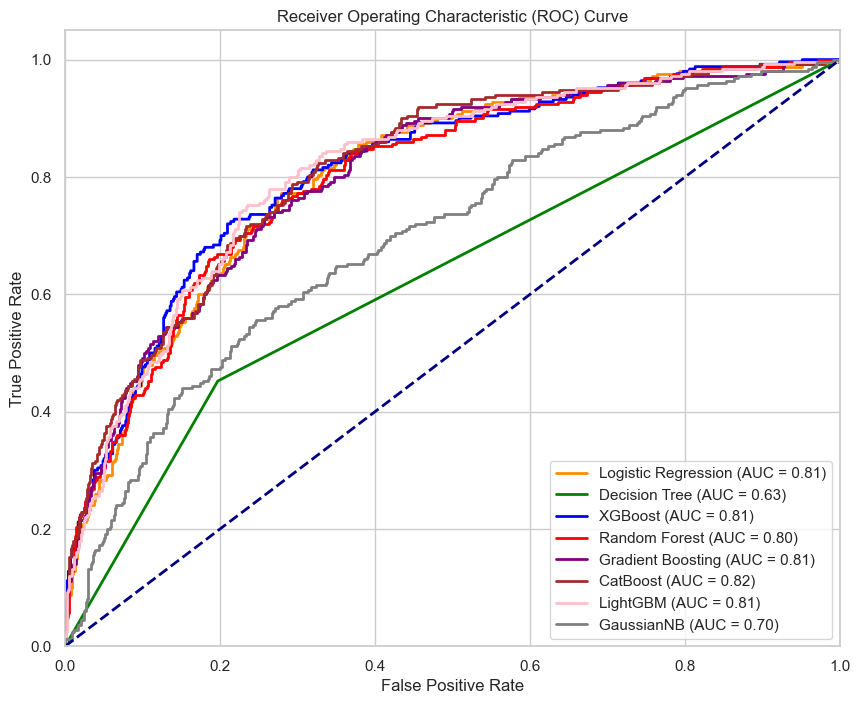

In [132]:
fpr_LR, tpr_LR, _ = roc_curve(y_test1, model_LRkf.predict_proba(x_test1)[:,1])
roc_auc_LR = auc(fpr_LR, tpr_LR)

fpr_DT, tpr_DT, _ = roc_curve(y_test1, model_DTkf.predict_proba(x_test1)[:,1])
roc_auc_DT = auc(fpr_DT, tpr_DT)

fpr_XGB, tpr_XGB, _ = roc_curve(y_test1, model_XGBkf.predict_proba(x_test1)[:,1])
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

fpr_RF, tpr_RF, _ = roc_curve(y_test1, model_RFkf.predict_proba(x_test1)[:,1])
roc_auc_RF = auc(fpr_RF, tpr_RF)

fpr_GB, tpr_GB, _ = roc_curve(y_test1, model_GBkf.predict_proba(x_test1)[:,1])
roc_auc_GB = auc(fpr_GB, tpr_GB)

fpr_CB, tpr_CB, _ = roc_curve(y_test1, model_CBkf.predict_proba(x_test1)[:,1])
roc_auc_CB = auc(fpr_CB, tpr_CB)

fpr_LGBM, tpr_LGBM, _ = roc_curve(y_test1, model_LGBMkf.predict_proba(x_test1)[:,1])
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)

fpr_NB, tpr_NB, _ = roc_curve(y_test1, model_NBkf.predict_proba(x_test1)[:,1])
roc_auc_NB = auc(fpr_NB, tpr_NB)

plt.figure(figsize=(10, 8))

plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_LR)
plt.plot(fpr_DT, tpr_DT, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_DT)
plt.plot(fpr_XGB, tpr_XGB, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_XGB)
plt.plot(fpr_RF, tpr_RF, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_RF)
plt.plot(fpr_GB, tpr_GB, color='purple', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_GB)
plt.plot(fpr_CB, tpr_CB, color='brown', lw=2, label='CatBoost (AUC = %0.2f)' % roc_auc_CB)
plt.plot(fpr_LGBM, tpr_LGBM, color='pink', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_LGBM)
plt.plot(fpr_NB, tpr_NB, color='gray', lw=2, label='GaussianNB (AUC = %0.2f)' % roc_auc_NB)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()


Model Select:Catboost,Gradient Boosting

## Model Optimisation--hyperparameterisation

### GB

#### n_estimators

In [128]:
import os
num_cpus = os.cpu_count()
num_cpus

16

In [129]:
predictors = ['CAR_AGE', 'HOMEKIDS', 'URBANICITY', 'OLDCLAIM', 'CLM_FREQ', 'CAR_USE', 'BLUEBOOK',
              'TRAVTIME', 'AGE', 'KIDSDRIV', 'INCOME', 'MVR_PTS', 'YOJ', 'HOME_VAL']
n_estimators = {'n_estimators':range(20,241,20)}
GridSearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=23330378), 
param_grid = n_estimators, scoring='roc_auc',n_jobs=16, cv=10)
GridSearch.fit(x_train_scaled, y_train_balanced)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=23330378,
                                                  subsample=0.8),
             n_jobs=16, param_grid={'n_estimators': range(20, 241, 20)},
             scoring='roc_auc')

In [130]:
GridSearch.best_params_, GridSearch.best_score_ 

({'n_estimators': 220}, 0.9218469718545403)

####  max_depth

In [151]:
max_depth = {'max_depth':range(5,27,2), 'min_samples_split':range(50,1001,200)}
gsearch_depth = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=220, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = max_depth, scoring='roc_auc',n_jobs=16, cv=10)
gsearch_depth.fit(x_train_scaled, y_train_balanced)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=220,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=16,
             param_grid={'max_depth': range(5, 27, 2),
                         'min_samples_split': range(50, 1001, 200)},
             scoring='roc_auc')

In [152]:
gsearch_depth.best_params_, gsearch_depth.best_score_ 

({'max_depth': 23, 'min_samples_split': 50}, 0.9297889926381913)

#### max_features

In [153]:
max_features = {'max_features':range(7,20,2)}
gsearch_features = GridSearchCV(estimator = GradientBoostingClassifier
                                (learning_rate=0.1, n_estimators=220,max_depth=23, min_samples_split=50,subsample=0.8, random_state=23330378),
param_grid = max_features, scoring='roc_auc',n_jobs=16, cv=5)
gsearch_features.fit(x_train_scaled, y_train_balanced)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=23,
                                                  min_samples_split=50,
                                                  n_estimators=220,
                                                  random_state=23330378,
                                                  subsample=0.8),
             n_jobs=16, param_grid={'max_features': range(7, 20, 2)},
             scoring='roc_auc')

In [154]:
gsearch_features.best_params_, gsearch_features.best_score_ 

({'max_features': 15}, 0.9274479507561605)

#### subsample

In [155]:
subsample = {'subsample':[0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]}
gsearch_subsample= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=220,max_depth=23,min_samples_split=50,random_state=23330378,max_features=15),
param_grid = subsample, scoring='roc_auc',n_jobs=16, cv=5)
gsearch_subsample.fit(x_train_scaled, y_train_balanced)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=23, max_features=15,
                                                  min_samples_split=50,
                                                  n_estimators=220,
                                                  random_state=23330378),
             n_jobs=16,
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]},
             scoring='roc_auc')

In [156]:
gsearch_subsample.best_params_, gsearch_subsample.best_score_

({'subsample': 0.8}, 0.9274479507561605)

#### OPGB

In [157]:
model_OPGB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=220,max_depth=23,min_samples_split=50,
                                    random_state=23330378,max_features=11, subsample=0.8)
model_OPGB.fit(x_train_scaled, y_train_balanced)

GradientBoostingClassifier(max_depth=23, max_features=11, min_samples_split=50,
                           n_estimators=220, random_state=23330378,
                           subsample=0.8)

In [158]:
evaluate_classification_model(model_OPGB)

Accuracy:  0.759
Precision: 0.524
Recall:  0.43
F1-Score:  0.472


### CatBoost

In [146]:
param_grid = {
    'n_estimators': range(20, 251, 20),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9]  
}



catboostOP = CatBoostClassifier(random_state=23330378, verbose=0)


grid_search = GridSearchCV(estimator=catboostOP, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=16)
grid_search.fit(x_train_scaled, y_train_balanced)

print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score found: ", grid_search.best_score_)


Best parameters found:  {'depth': 10, 'learning_rate': 0.1, 'n_estimators': 240, 'subsample': 0.6}
Best ROC AUC score found:  0.9284903767689382


In [147]:
model_OPCB = CatBoostClassifier(learning_rate=0.1, n_estimators=240, depth=8,
                                random_state=23330378, subsample=0.8)
model_OPCB.fit(x_train_scaled, y_train_balanced)

0:	learn: 0.6451712	total: 8.57ms	remaining: 2.05s
1:	learn: 0.5965980	total: 17.1ms	remaining: 2.03s
2:	learn: 0.5621328	total: 25.6ms	remaining: 2.03s
3:	learn: 0.5418402	total: 34.7ms	remaining: 2.05s
4:	learn: 0.5227204	total: 43.9ms	remaining: 2.06s
5:	learn: 0.5057108	total: 52.1ms	remaining: 2.03s
6:	learn: 0.4904177	total: 61.2ms	remaining: 2.04s
7:	learn: 0.4758825	total: 70.7ms	remaining: 2.05s
8:	learn: 0.4643957	total: 80.4ms	remaining: 2.06s
9:	learn: 0.4509323	total: 90.7ms	remaining: 2.08s
10:	learn: 0.4422476	total: 101ms	remaining: 2.1s
11:	learn: 0.4334587	total: 110ms	remaining: 2.08s
12:	learn: 0.4281698	total: 118ms	remaining: 2.07s
13:	learn: 0.4216270	total: 129ms	remaining: 2.08s
14:	learn: 0.4165041	total: 139ms	remaining: 2.09s
15:	learn: 0.4123488	total: 149ms	remaining: 2.09s
16:	learn: 0.4079446	total: 160ms	remaining: 2.1s
17:	learn: 0.4038151	total: 168ms	remaining: 2.08s


18:	learn: 0.4008230	total: 178ms	remaining: 2.08s
19:	learn: 0.3965209	total: 188ms	remaining: 2.07s
20:	learn: 0.3924516	total: 198ms	remaining: 2.06s
21:	learn: 0.3891113	total: 208ms	remaining: 2.06s
22:	learn: 0.3859290	total: 216ms	remaining: 2.04s
23:	learn: 0.3825008	total: 224ms	remaining: 2.02s
24:	learn: 0.3782381	total: 232ms	remaining: 1.99s
25:	learn: 0.3755381	total: 241ms	remaining: 1.98s
26:	learn: 0.3739215	total: 249ms	remaining: 1.96s
27:	learn: 0.3717549	total: 257ms	remaining: 1.94s
28:	learn: 0.3693378	total: 265ms	remaining: 1.93s
29:	learn: 0.3665858	total: 274ms	remaining: 1.92s
30:	learn: 0.3639846	total: 282ms	remaining: 1.9s
31:	learn: 0.3612659	total: 290ms	remaining: 1.89s
32:	learn: 0.3594805	total: 299ms	remaining: 1.87s
33:	learn: 0.3581575	total: 307ms	remaining: 1.86s
34:	learn: 0.3531348	total: 317ms	remaining: 1.85s
35:	learn: 0.3501779	total: 325ms	remaining: 1.84s
36:	learn: 0.3476763	total: 334ms	remaining: 1.83s
37:	learn: 0.3463488	total: 343m

In [148]:
evaluate_classification_model(model_OPCB)

Accuracy:  0.771
Precision: 0.556
Recall:  0.44
F1-Score:  0.491


0:	learn: 0.6409660	total: 6.29ms	remaining: 1.5s
1:	learn: 0.6004935	total: 11.7ms	remaining: 1.39s
2:	learn: 0.5701324	total: 17.8ms	remaining: 1.41s
3:	learn: 0.5475248	total: 23.8ms	remaining: 1.4s
4:	learn: 0.5288249	total: 30.5ms	remaining: 1.43s
5:	learn: 0.5139601	total: 36.4ms	remaining: 1.42s
6:	learn: 0.4998125	total: 42.8ms	remaining: 1.42s
7:	learn: 0.4891942	total: 49.4ms	remaining: 1.43s
8:	learn: 0.4784913	total: 55.3ms	remaining: 1.42s
9:	learn: 0.4721456	total: 61.3ms	remaining: 1.41s
10:	learn: 0.4667851	total: 69.6ms	remaining: 1.45s
11:	learn: 0.4598874	total: 80.6ms	remaining: 1.53s
12:	learn: 0.4549983	total: 88.1ms	remaining: 1.54s
13:	learn: 0.4508853	total: 95.1ms	remaining: 1.53s
14:	learn: 0.4468367	total: 103ms	remaining: 1.54s
15:	learn: 0.4416569	total: 112ms	remaining: 1.56s
16:	learn: 0.4361898	total: 117ms	remaining: 1.54s
17:	learn: 0.4329589	total: 124ms	remaining: 1.53s
18:	learn: 0.4298909	total: 131ms	remaining: 1.52s
19:	learn: 0.4274960	total: 1